In [37]:
import ndlib
import networkx as nx
import ndlib.models.ModelConfig as mc
import ndlib.models.epidemics as ep
import matplotlib.pyplot as plt
from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend
from ndlib.viz.mpl.DiffusionPrevalence import DiffusionPrevalence
from ndlib.viz.mpl.TrendComparison import DiffusionTrendComparison

In [3]:
# directed graph of our network

g = nx.read_edgelist("../data/dati_ripuliti_edgelist.csv", delimiter=",", nodetype=str, create_using=nx.DiGraph())

n_nodes = g.number_of_nodes()
n_edges = g.number_of_edges()

print(n_nodes, ",", n_edges)

24819 , 107094


In [4]:
# ER
prob = n_edges/(n_nodes*(n_nodes-1))
er = nx.fast_gnp_random_graph(n_nodes, prob,directed=True)
er.number_of_edges()

106473

In [5]:
# BA
m = 8  # number of links each node establishes once joining the network
ba = nx.barabasi_albert_graph(n_nodes, m)
ba.number_of_edges()

198488

In [6]:
# WS (selecting the model that was closer to our network)
# undirected
ws = nx.watts_strogatz_graph(n_nodes, k=8, p=0.37)
ws.number_of_edges()

99276

# Threshold

We start by assuming that something, for example a meme or a trend, has already infected 1% of the network. We also assume it to be very easy to adopt, with a 0.2 threshold.

### Our graph

In [7]:
model_t = ep.ThresholdModel(g)
model_t.available_statuses

{'Susceptible': 0, 'Infected': 1}

In [8]:
# Model Configuration
config = mc.Configuration()

# Setting node parameters
threshold = 0.2
for i in g.nodes():
    config.add_node_configuration("threshold", i, threshold)

In [9]:
config.add_model_parameter('fraction_infected', 0.01)
model_t.set_initial_status(config)

In [11]:
iterations = model_t.iteration_bunch(100, node_status=True)
trends_t = model_t.build_trends(iterations)

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:20<00:00,  4.94it/s]


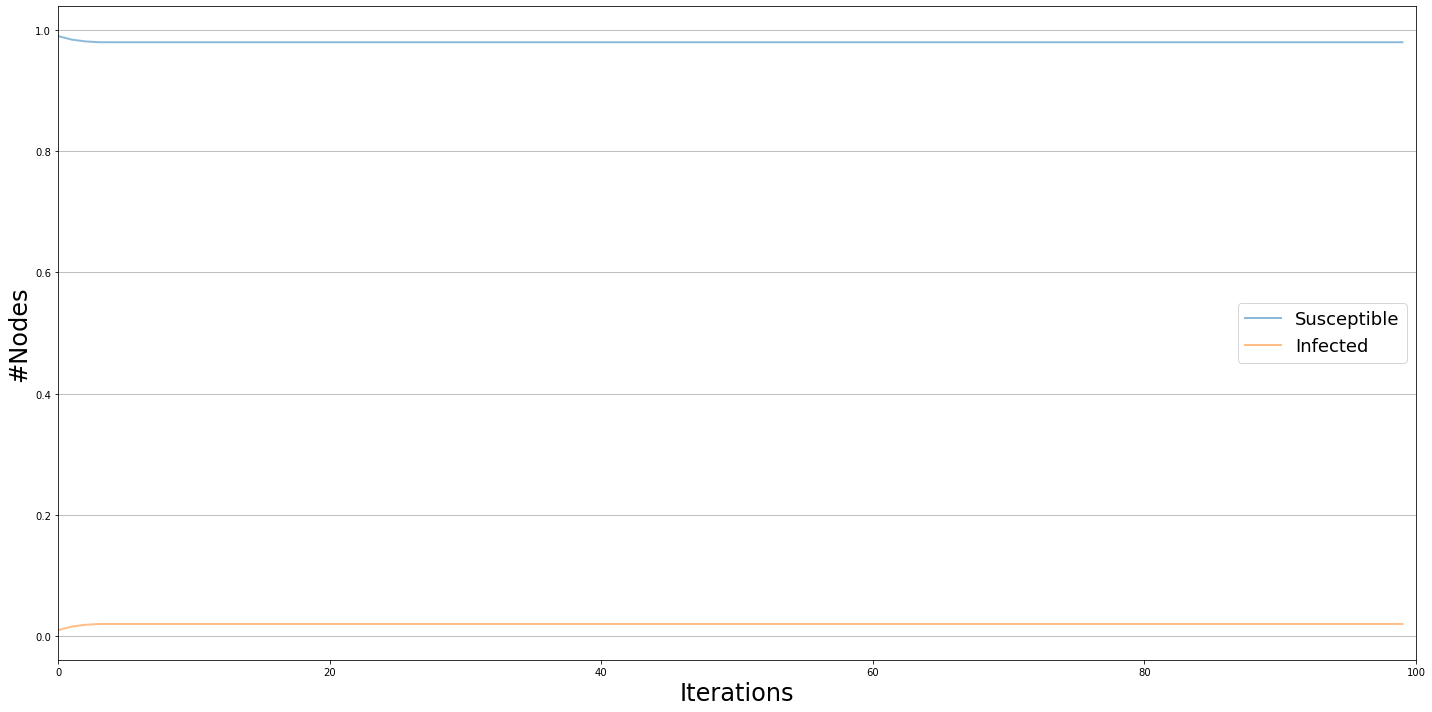

In [12]:
%matplotlib inline
viz = DiffusionTrend(model_t, trends_t)
viz.plot()

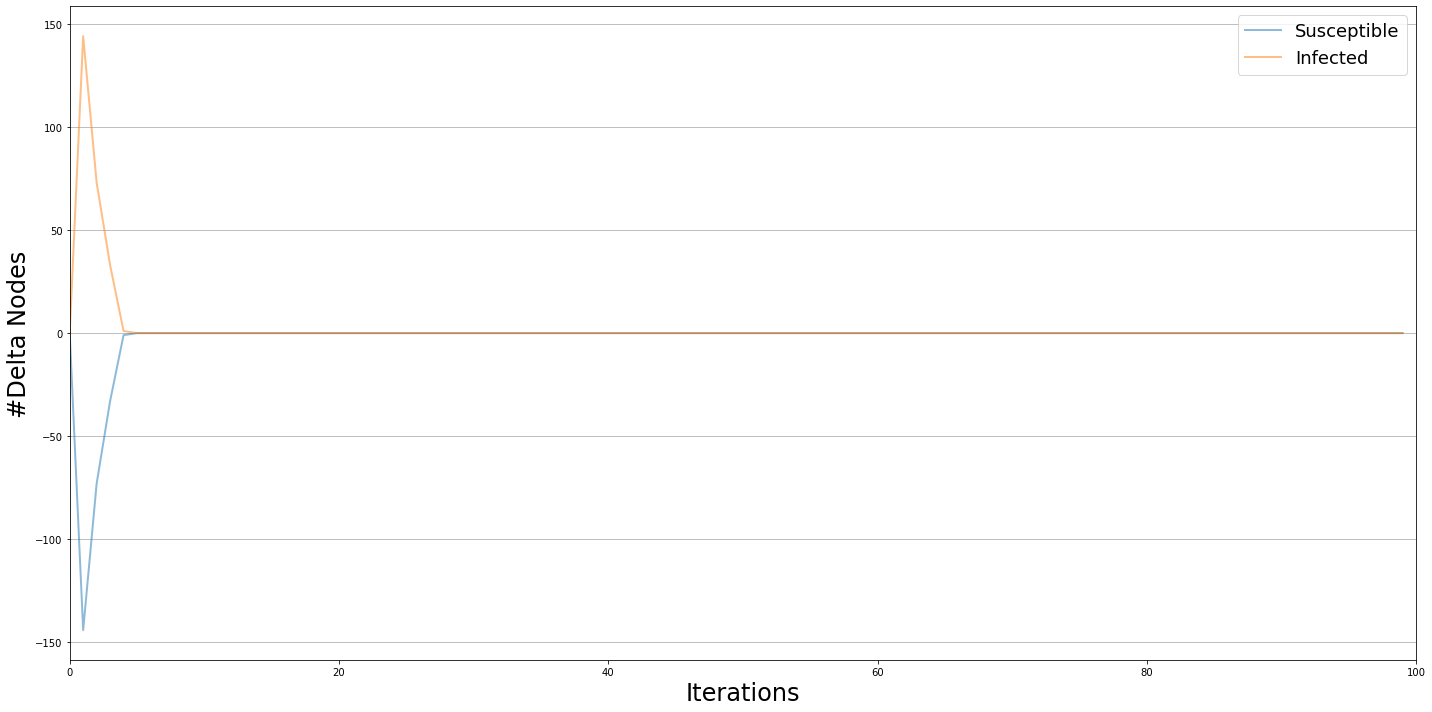

In [13]:
viz = DiffusionPrevalence(model_t, trends_t)
viz.plot()

### ER model

In [14]:
model_t_er = ep.ThresholdModel(er)
config.add_model_parameter('fraction_infected', 0.01)

for i in er.nodes():
    config.add_node_configuration("threshold", i, threshold)
model_t_er.set_initial_status(config)
iterations = model_t_er.iteration_bunch(100, node_status=True)
trends_t_er = model_t_er.build_trends(iterations)

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:04<00:00, 23.19it/s]


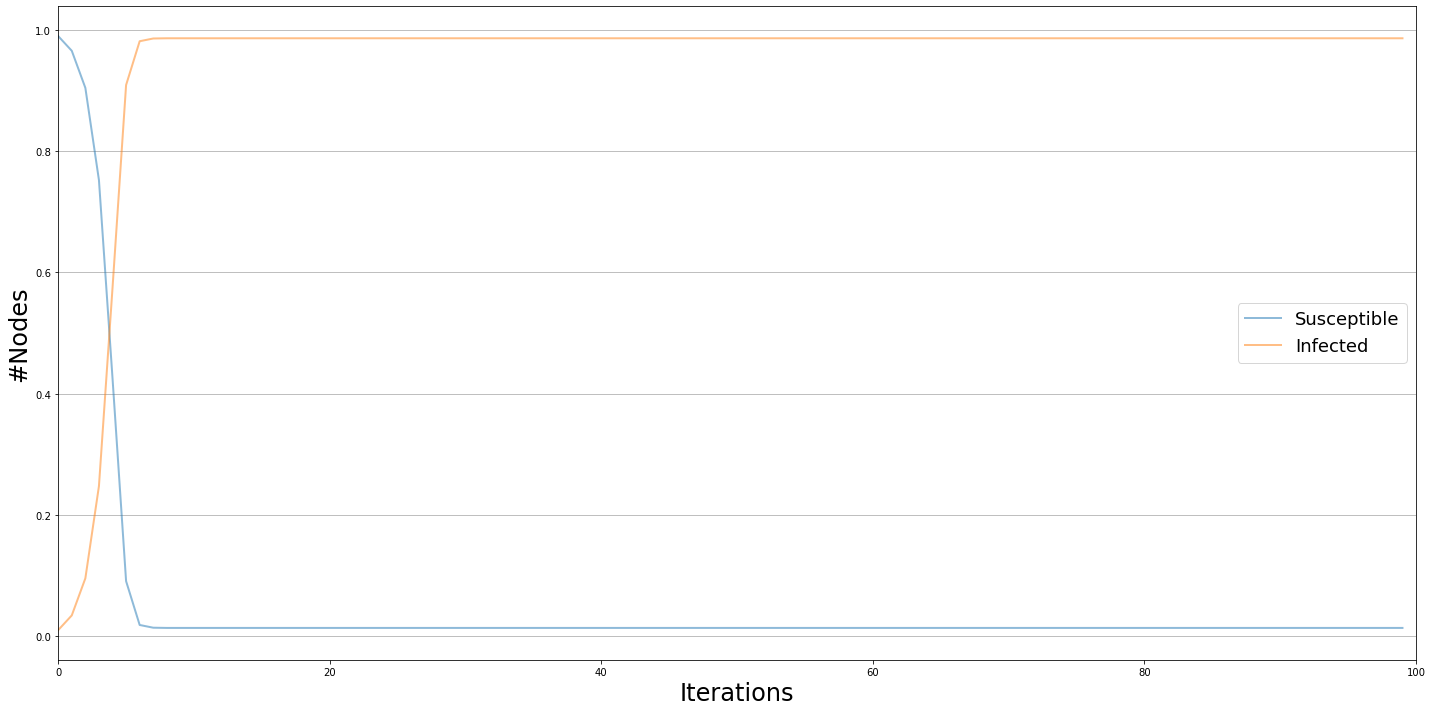

In [15]:
viz = DiffusionTrend(model_t_er, trends_t_er)
viz.plot()

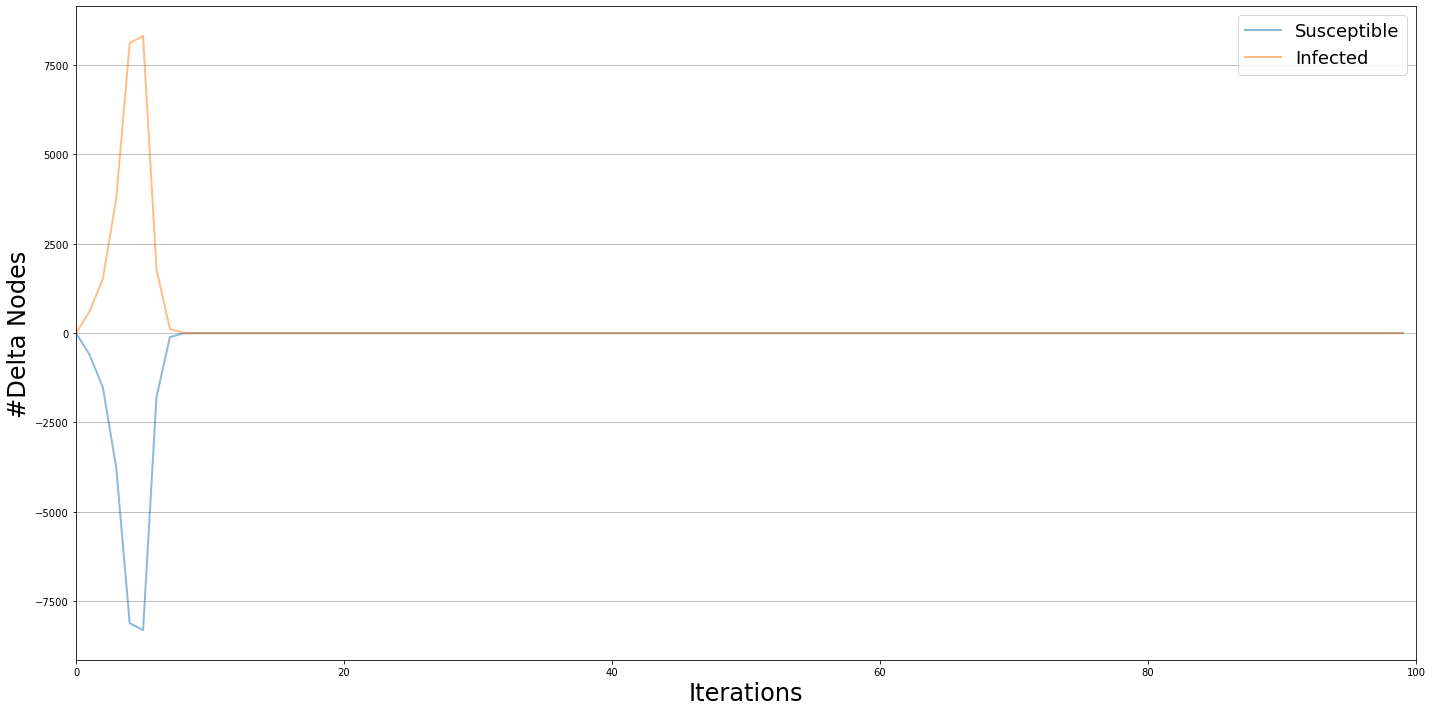

In [16]:
viz = DiffusionPrevalence(model_t_er, trends_t_er)
viz.plot()

### BA model

In [17]:
model_t_ba = ep.ThresholdModel(ba)
config.add_model_parameter('fraction_infected', 0.01)

for i in ba.nodes():
    config.add_node_configuration("threshold", i, threshold)
model_t_ba.set_initial_status(config)
iterations = model_t_ba.iteration_bunch(100, node_status=True)
trends_t_ba = model_t_ba.build_trends(iterations)

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:19<00:00,  5.05it/s]


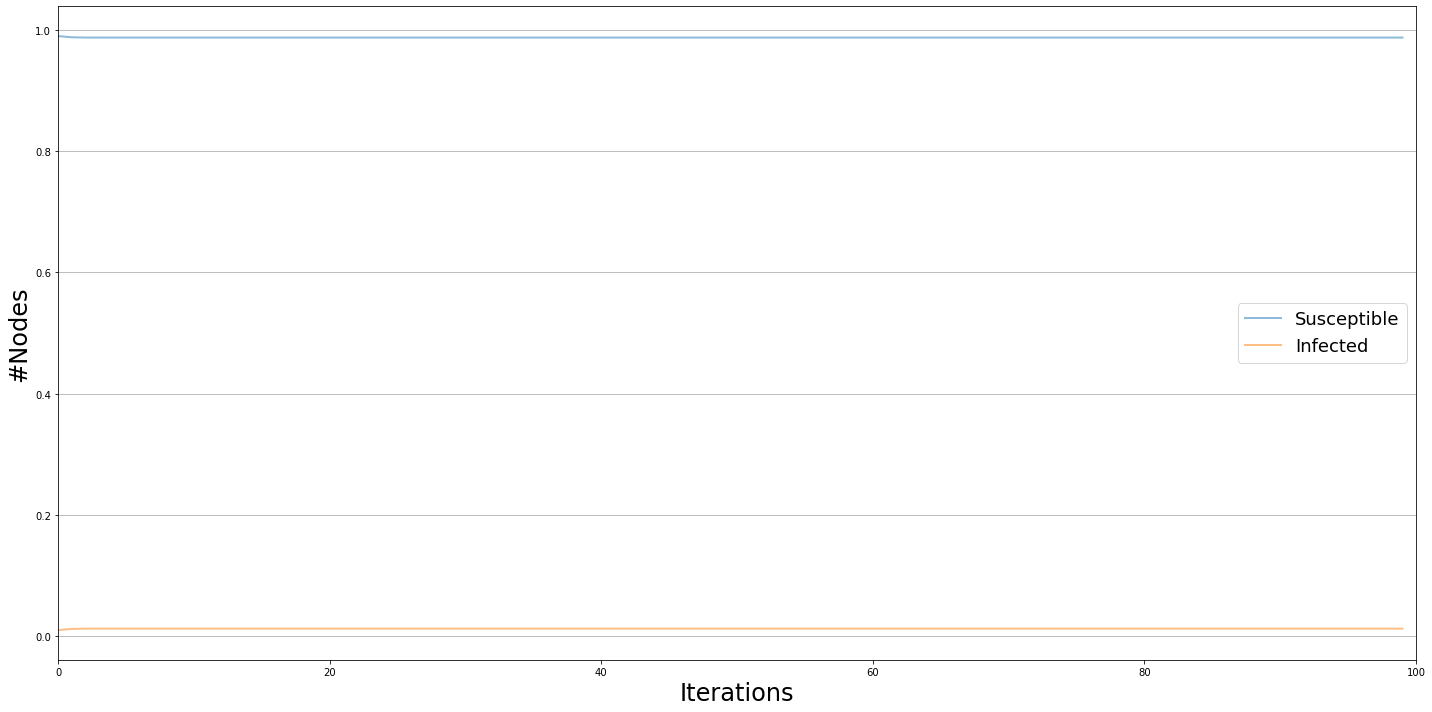

In [18]:
viz = DiffusionTrend(model_t_ba, trends_t_ba)
viz.plot()

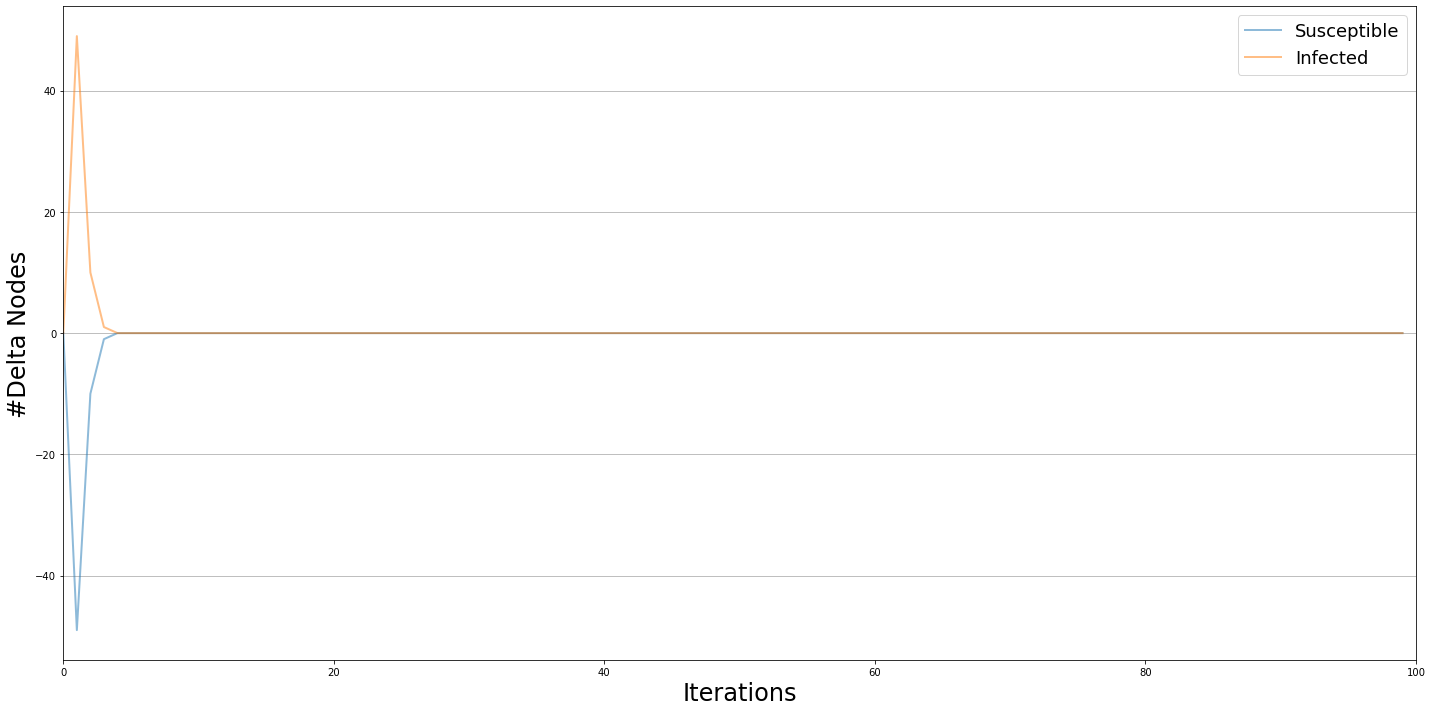

In [19]:
viz = DiffusionPrevalence(model_t_ba, trends_t_ba)
viz.plot()

### WS model

In [20]:
model_t_ws = ep.ThresholdModel(ws)
config.add_model_parameter('fraction_infected', 0.1)

for i in ws.nodes():
    config.add_node_configuration("threshold", i, threshold)
model_t_ws.set_initial_status(config)
iterations = model_t_ws.iteration_bunch(100, node_status=True)
trends_t_ws = model_t_ws.build_trends(iterations)

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:02<00:00, 42.46it/s]


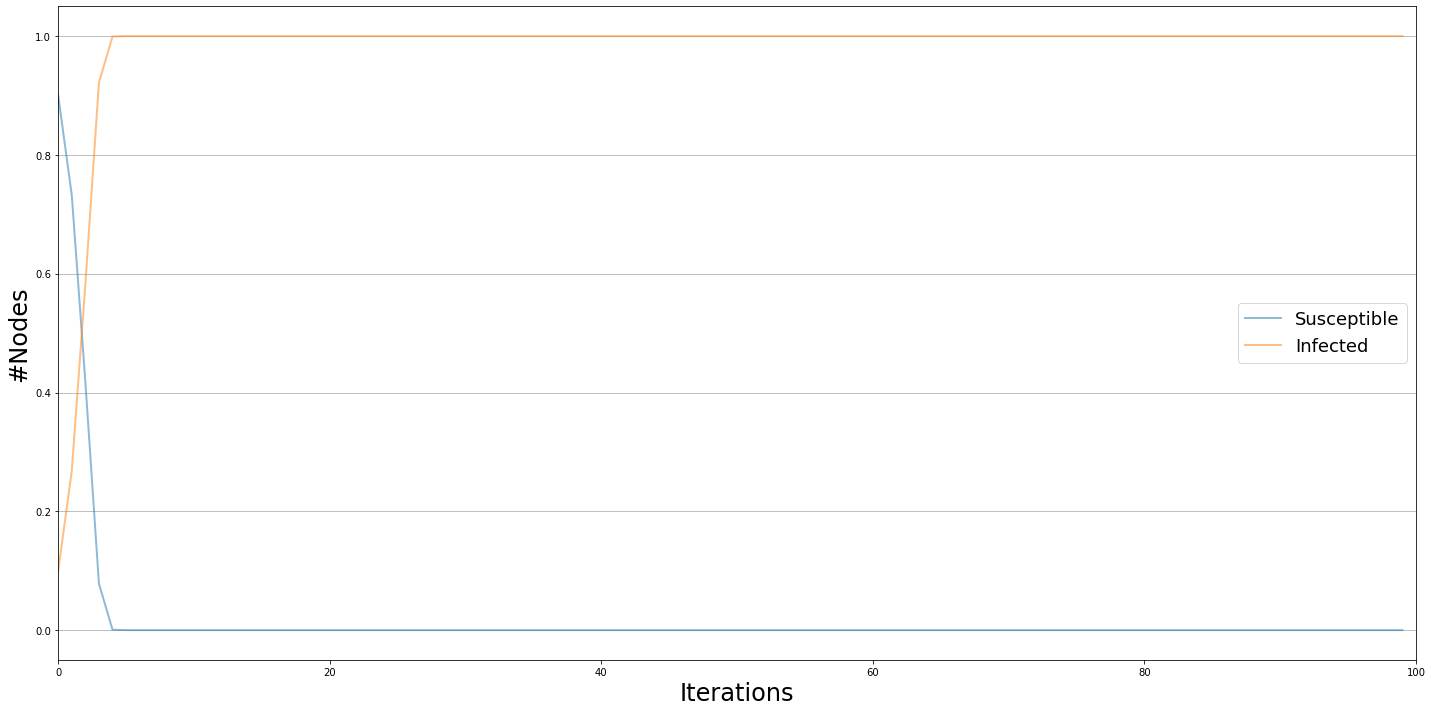

In [21]:
viz = DiffusionTrend(model_t_ws, trends_t_ws)
viz.plot()

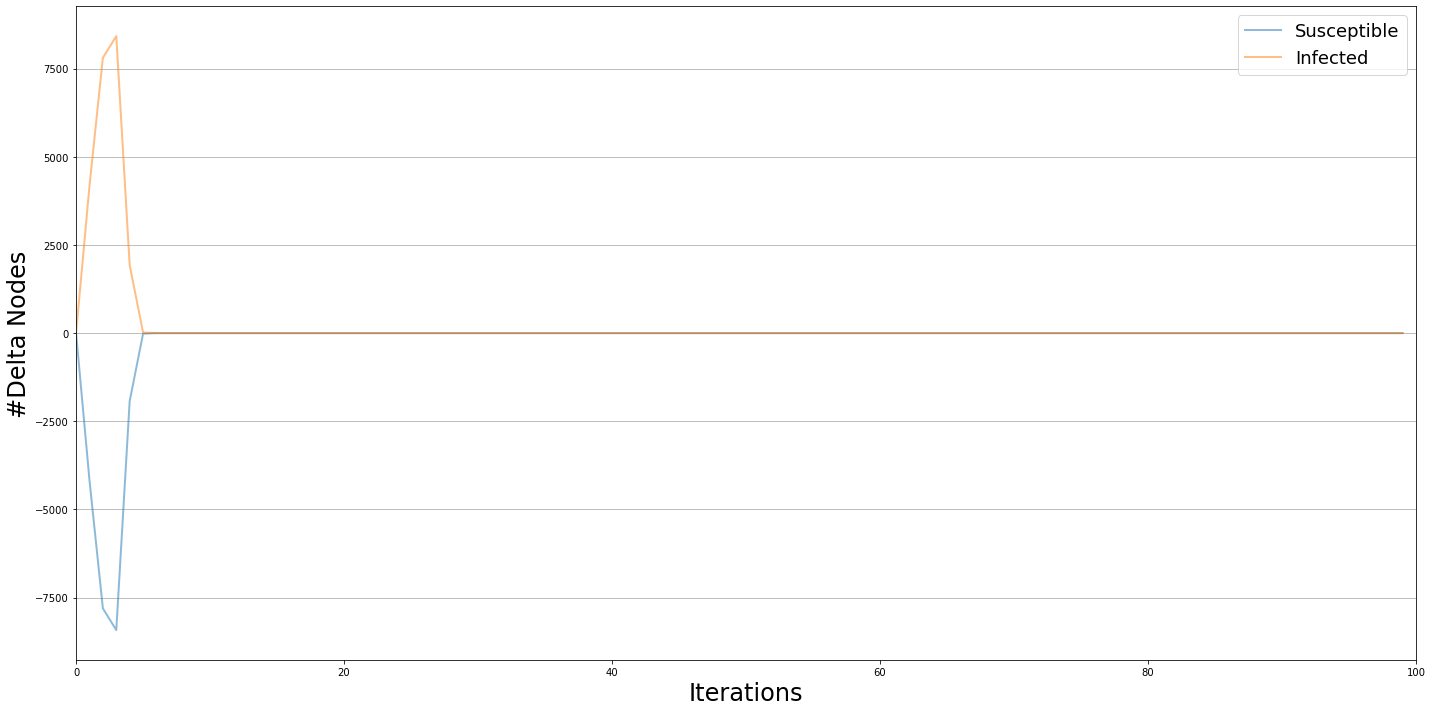

In [22]:
viz = DiffusionPrevalence(model_t_ws, trends_t_ws)
viz.plot()

With a 0.2 threshold and 1% already infected, the cascade is complete with the ER and WS models. In our network and in the BA model, however, it dies out immediately.

Supposing that the % of already infected is higher (a meme that is already very popular), at 10%, the situation changes:

### Our network

In [23]:
model_t_10 = ep.ThresholdModel(g)
# Model Configuration
config.add_model_parameter('fraction_infected', 0.1)

for i in er.nodes():
    config.add_node_configuration("threshold", i, threshold)
model_t_10.set_initial_status(config)
iterations = model_t_10.iteration_bunch(100, node_status=True)
trends_t_10 = model_t_10.build_trends(iterations)

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:07<00:00, 12.97it/s]


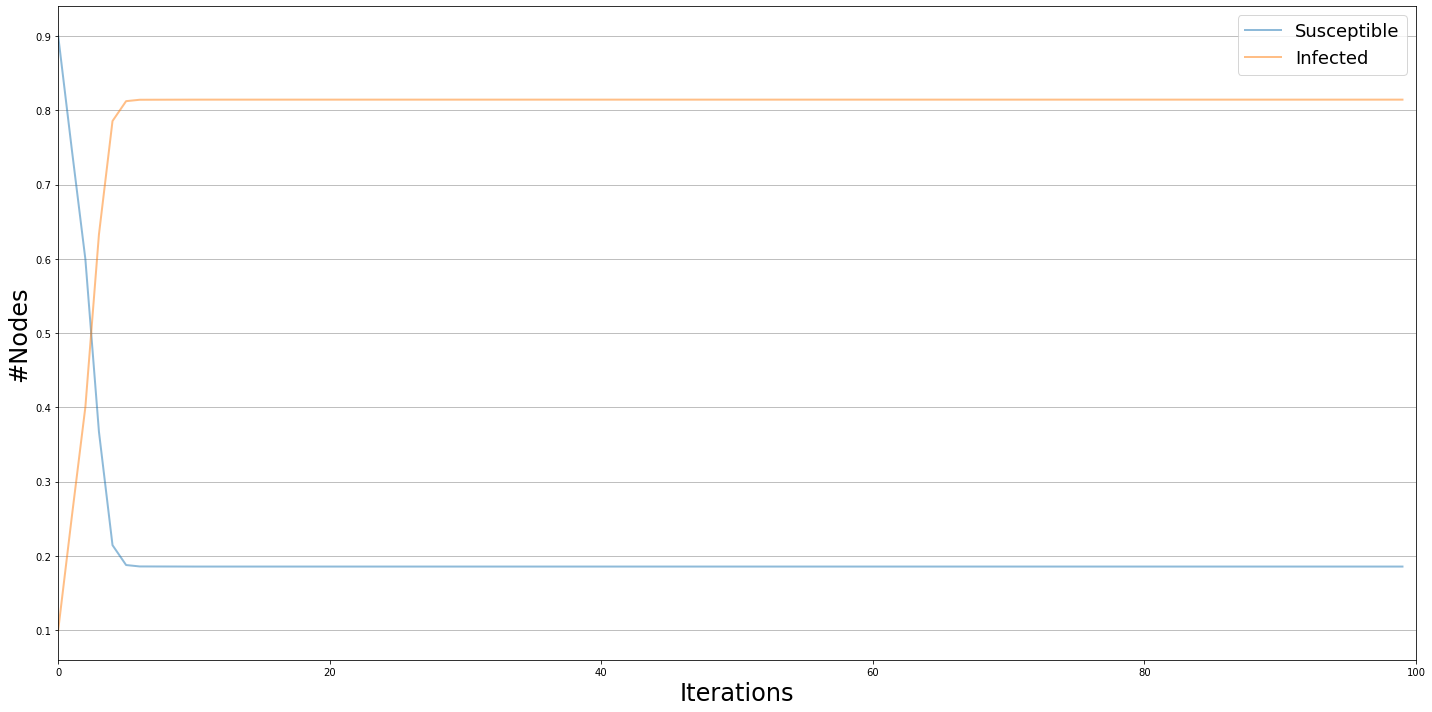

In [24]:
viz = DiffusionTrend(model_t_10, trends_t_10)
viz.plot()

### BA model

In [25]:
model_t_10_ba = ep.ThresholdModel(ba)
# Model Configuration
config.add_model_parameter('fraction_infected', 0.1)

for i in er.nodes():
    config.add_node_configuration("threshold", i, threshold)
model_t_10_ba.set_initial_status(config)
iterations = model_t_10_ba.iteration_bunch(100, node_status=True)
trends_t_10_ba = model_t_10_ba.build_trends(iterations)

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:04<00:00, 24.95it/s]


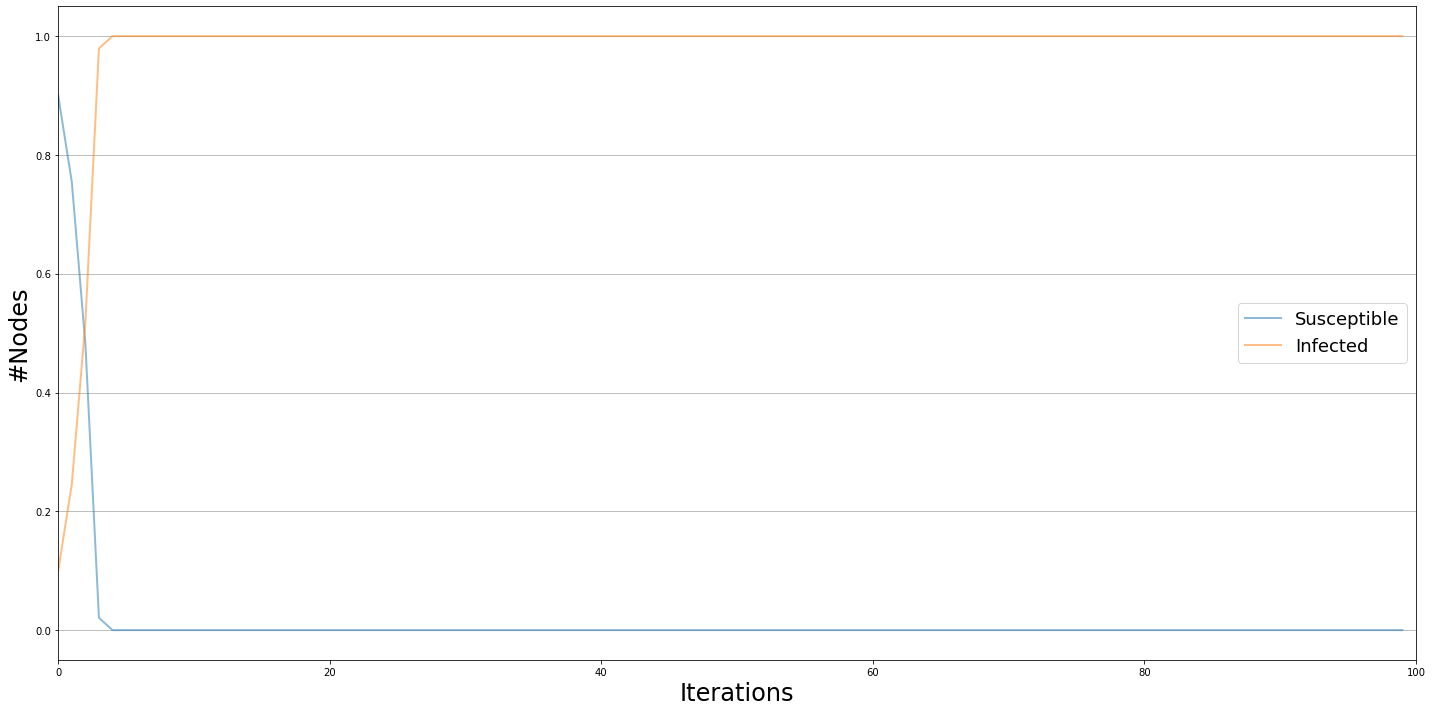

In [26]:
viz = DiffusionTrend(model_t_10_ba, trends_t_10_ba)
viz.plot()

The simulation shows that with a higher % of already infected notes from the start, the cascade happens with the BA models but fails to fully happen in our network, becoming stationary, and thus showing the presence of a cluster with density 1-0.2 in our network. 

To sum up the growth of the infections in all the models:

(note: the threshold with our network is not included here because there was an error with the labels going out of range?)
(it seems that using six models triggered that)

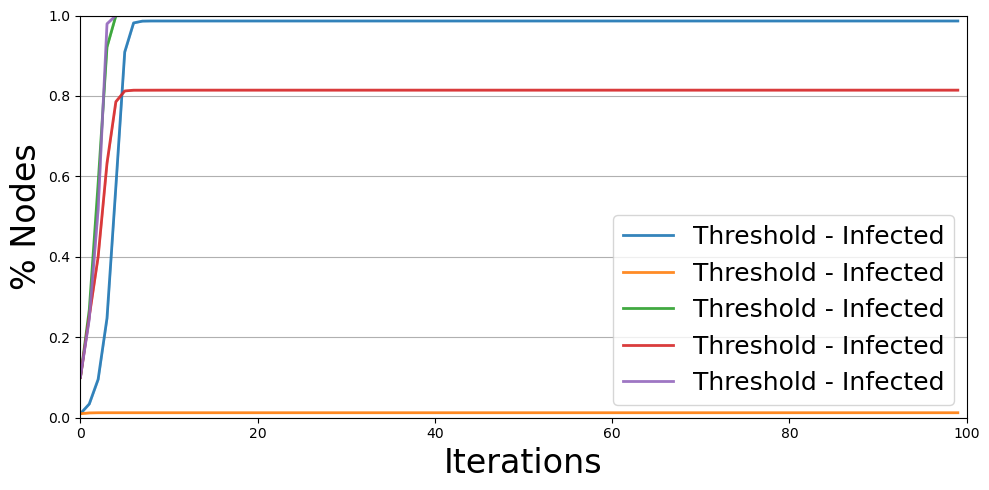

In [47]:
plt.rcParams.update({'figure.figsize':(10,5), 'figure.dpi':100})
viz = DiffusionTrendComparison([model_t_er, model_t_ba, model_t_ws, model_t_10, model_t_10_ba], [trends_t_er, trends_t_ba, trends_t_ws, trends_t_10, trends_t_10_ba], statuses=['Infected'])
viz.plot()

+ blue: threshold er
+ yellow: threshold ba (almost the same as our network)
+ green: threshold ws
+ red: threshold with our network and 10% already infected at time = 0
+ purple: threshold ba and 10% already infected at time = 0

# SI: Susceptible-Infected

### Our graph

In [48]:
model_si = ep.SIModel(g)

In [49]:
cfg = mc.Configuration()
cfg.add_model_parameter('beta', 0.001) # infection rate
cfg.add_model_parameter("percentage_infected", 0.01)
model_si.set_initial_status(cfg)

In [50]:
iterations = model_si.iteration_bunch(1500, node_status=True)
trends_si = model_si.build_trends(iterations)

100%|██████████████████████████████████████████████████████████████████████████████| 1500/1500 [05:46<00:00,  4.33it/s]


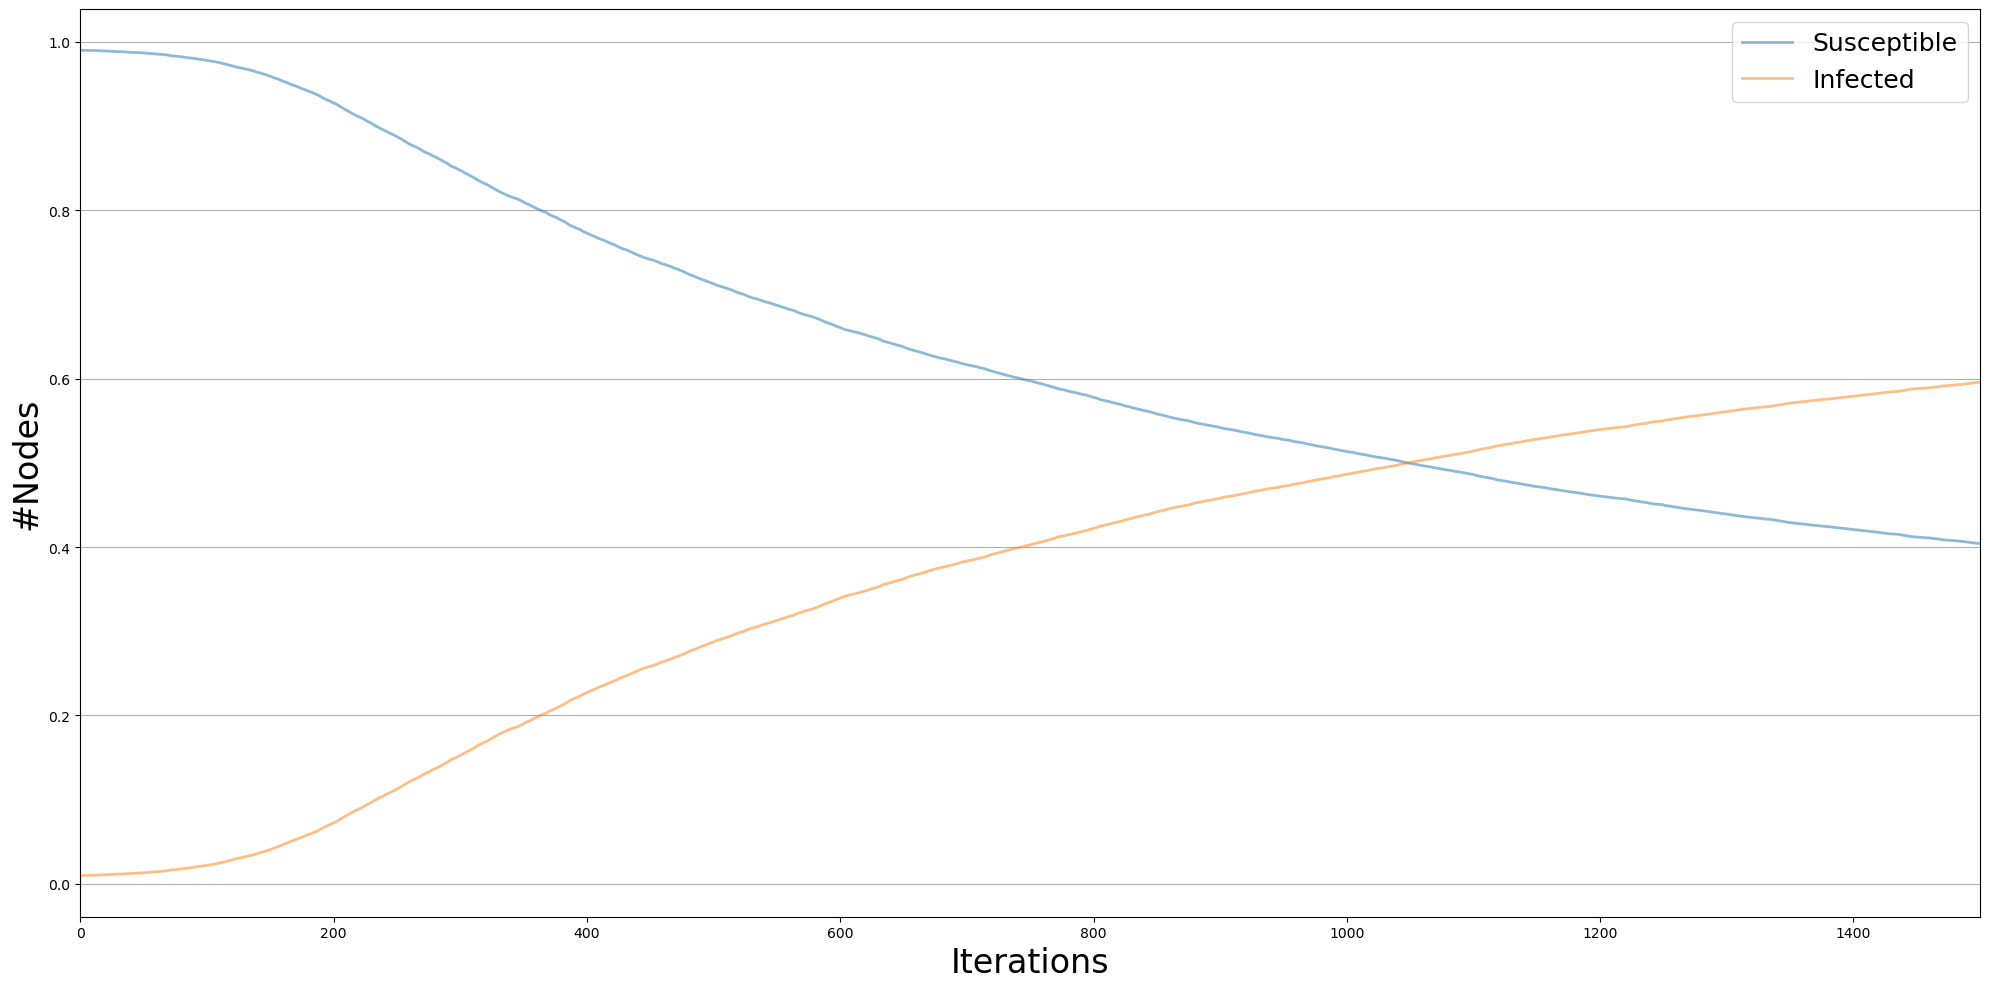

In [51]:
viz = DiffusionTrend(model_si, trends_si)
viz.plot()

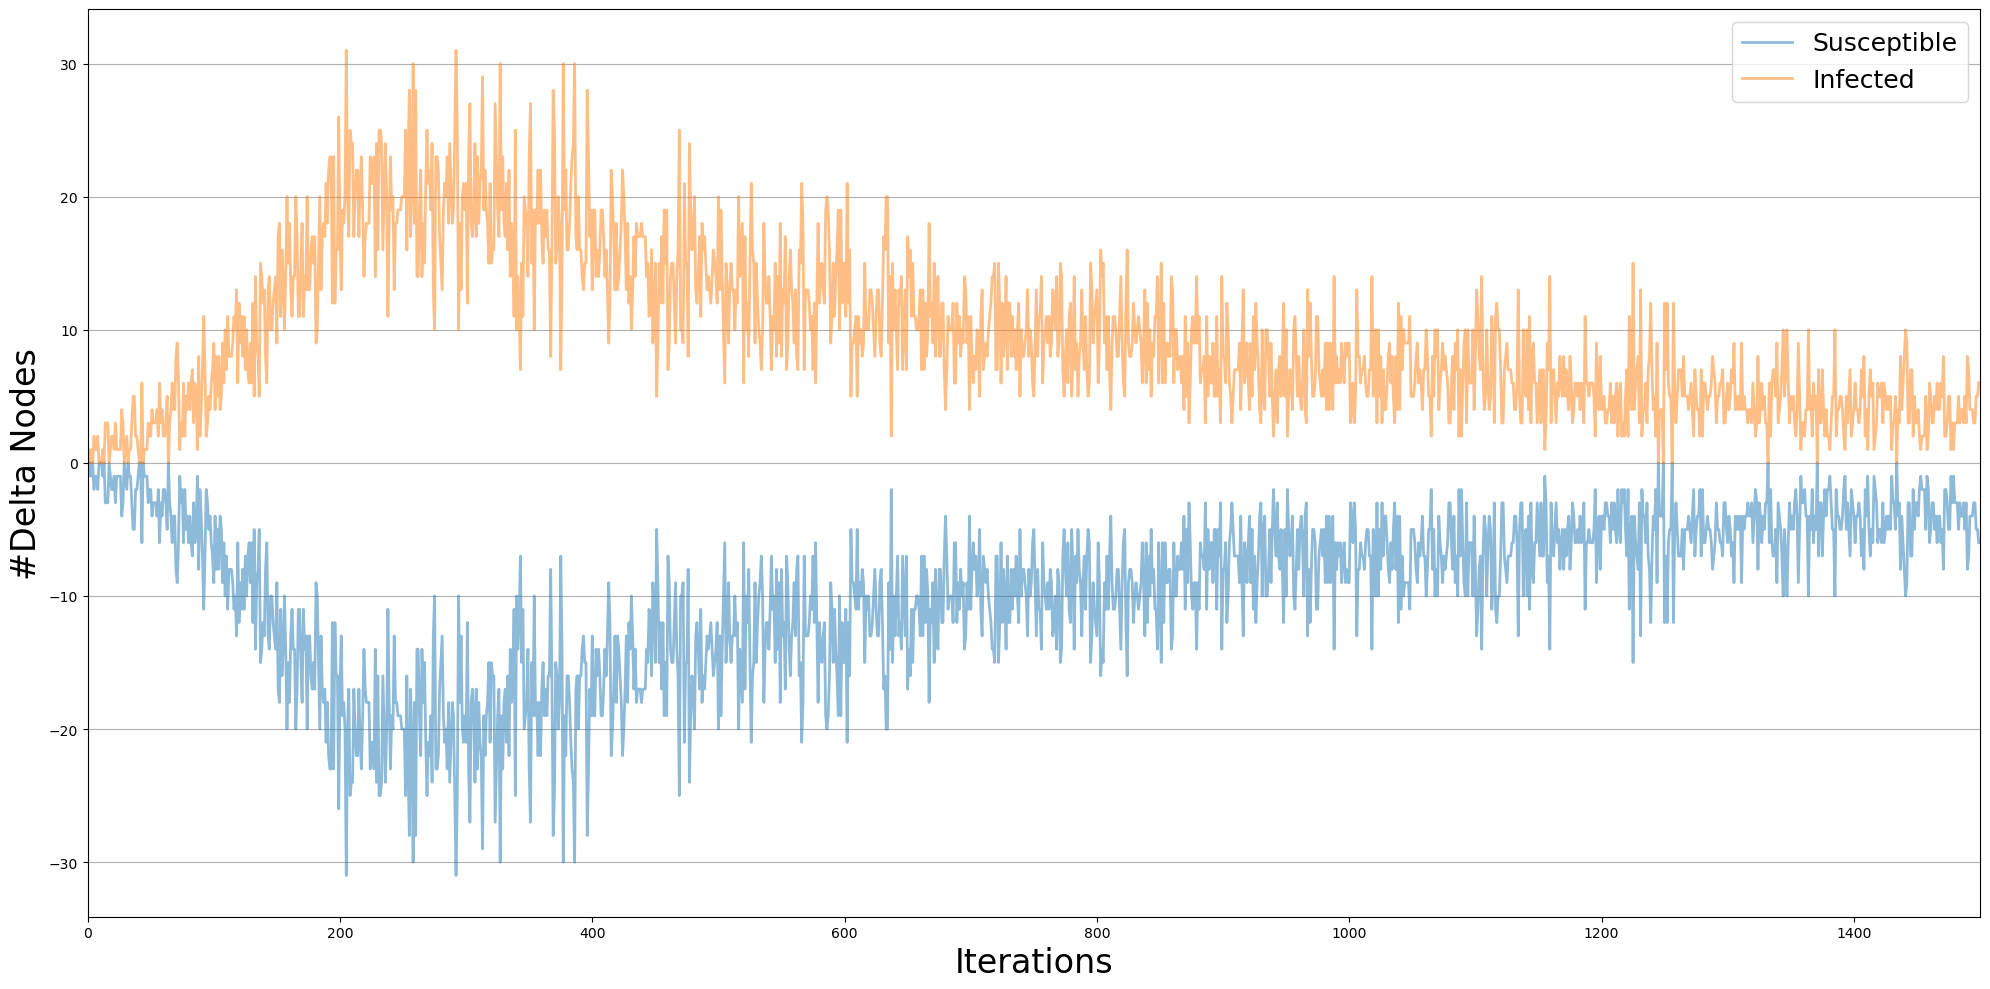

In [52]:
viz = DiffusionPrevalence(model_si, trends_si)
viz.plot()

### ER model

In [53]:
model_si_er = ep.SIModel(er)
model_si_er.set_initial_status(cfg)

In [54]:
iterations = model_si_er.iteration_bunch(1500, node_status=True)
trends_si_er = model_si_er.build_trends(iterations)

100%|██████████████████████████████████████████████████████████████████████████████| 1500/1500 [06:24<00:00,  3.90it/s]


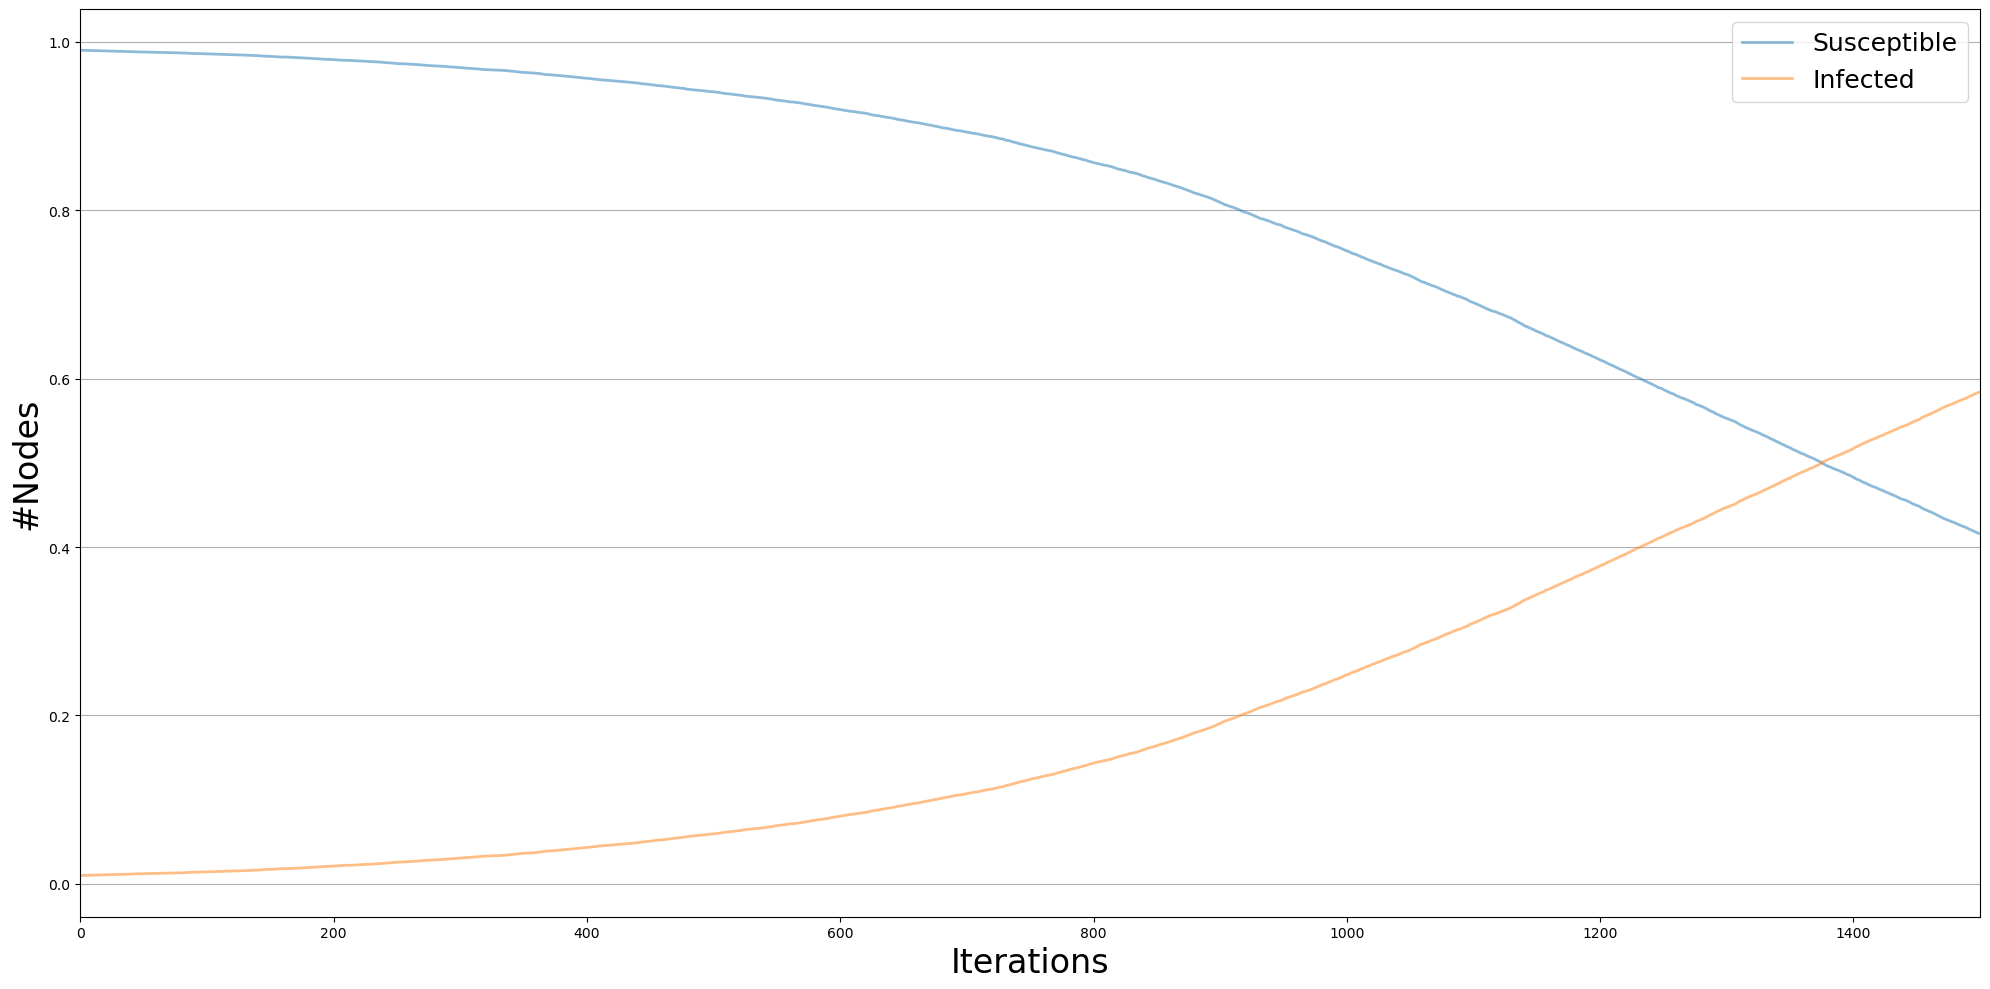

In [55]:
viz = DiffusionTrend(model_si_er, trends_si_er)
viz.plot()

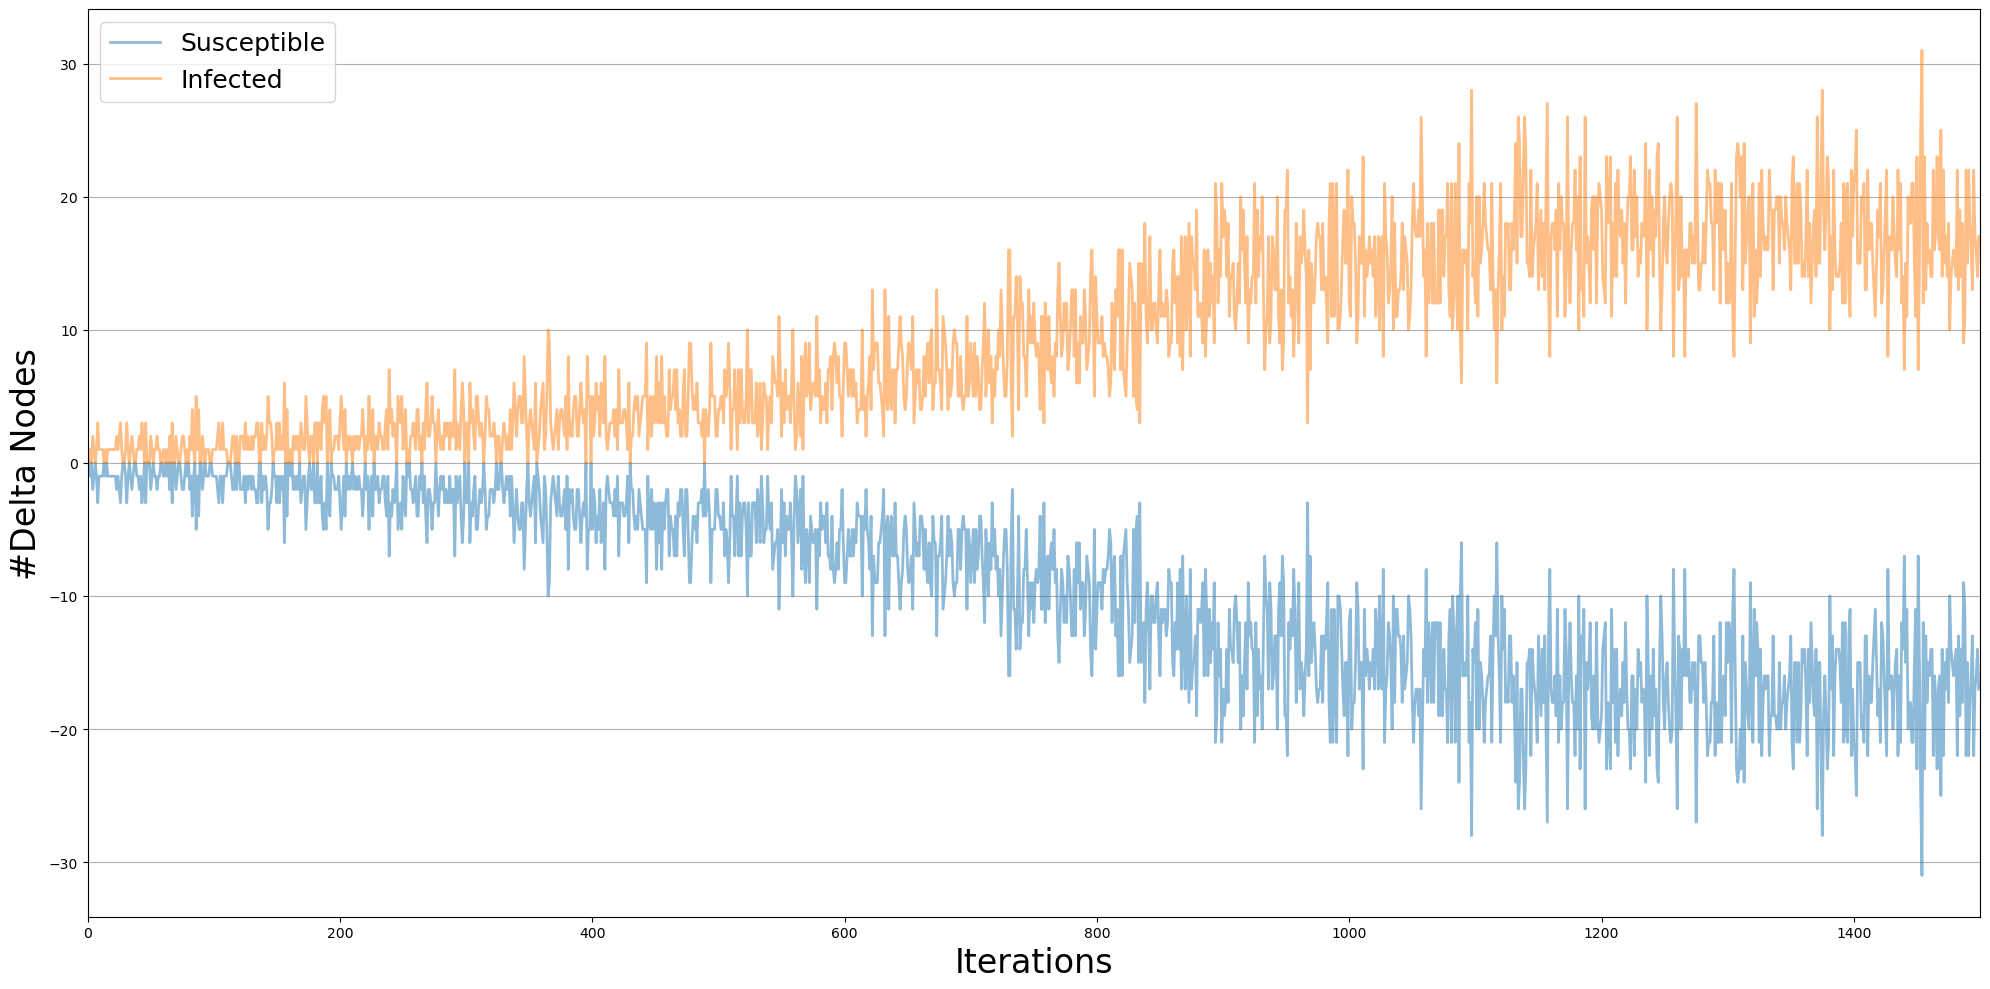

In [56]:
viz = DiffusionPrevalence(model_si_er, trends_si_er)
viz.plot()

### BA model

In [57]:
model_si_ba = ep.SIModel(ba)
model_si_ba.set_initial_status(cfg)

In [58]:
iterations = model_si_ba.iteration_bunch(1500, node_status=True)
trends_si_ba = model_si_ba.build_trends(iterations)

100%|██████████████████████████████████████████████████████████████████████████████| 1500/1500 [03:36<00:00,  6.91it/s]


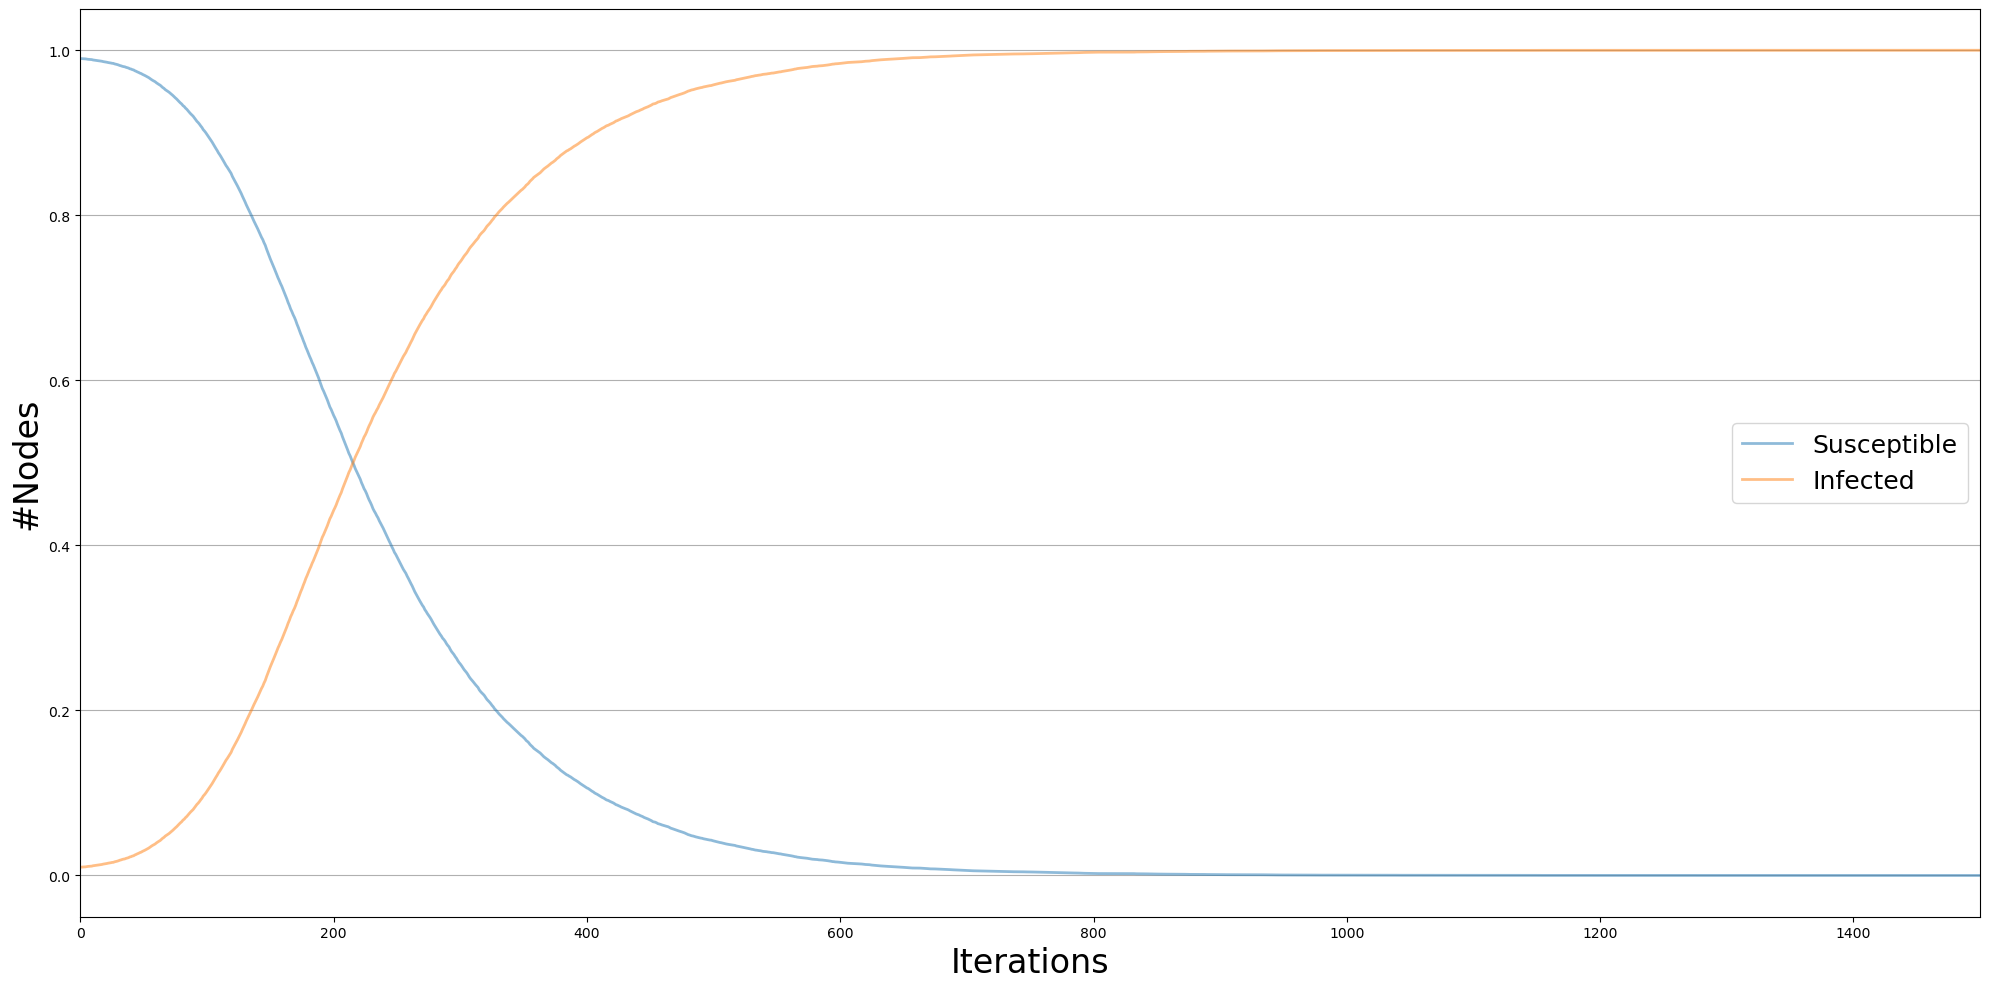

In [59]:
viz = DiffusionTrend(model_si_ba, trends_si_ba)
viz.plot()

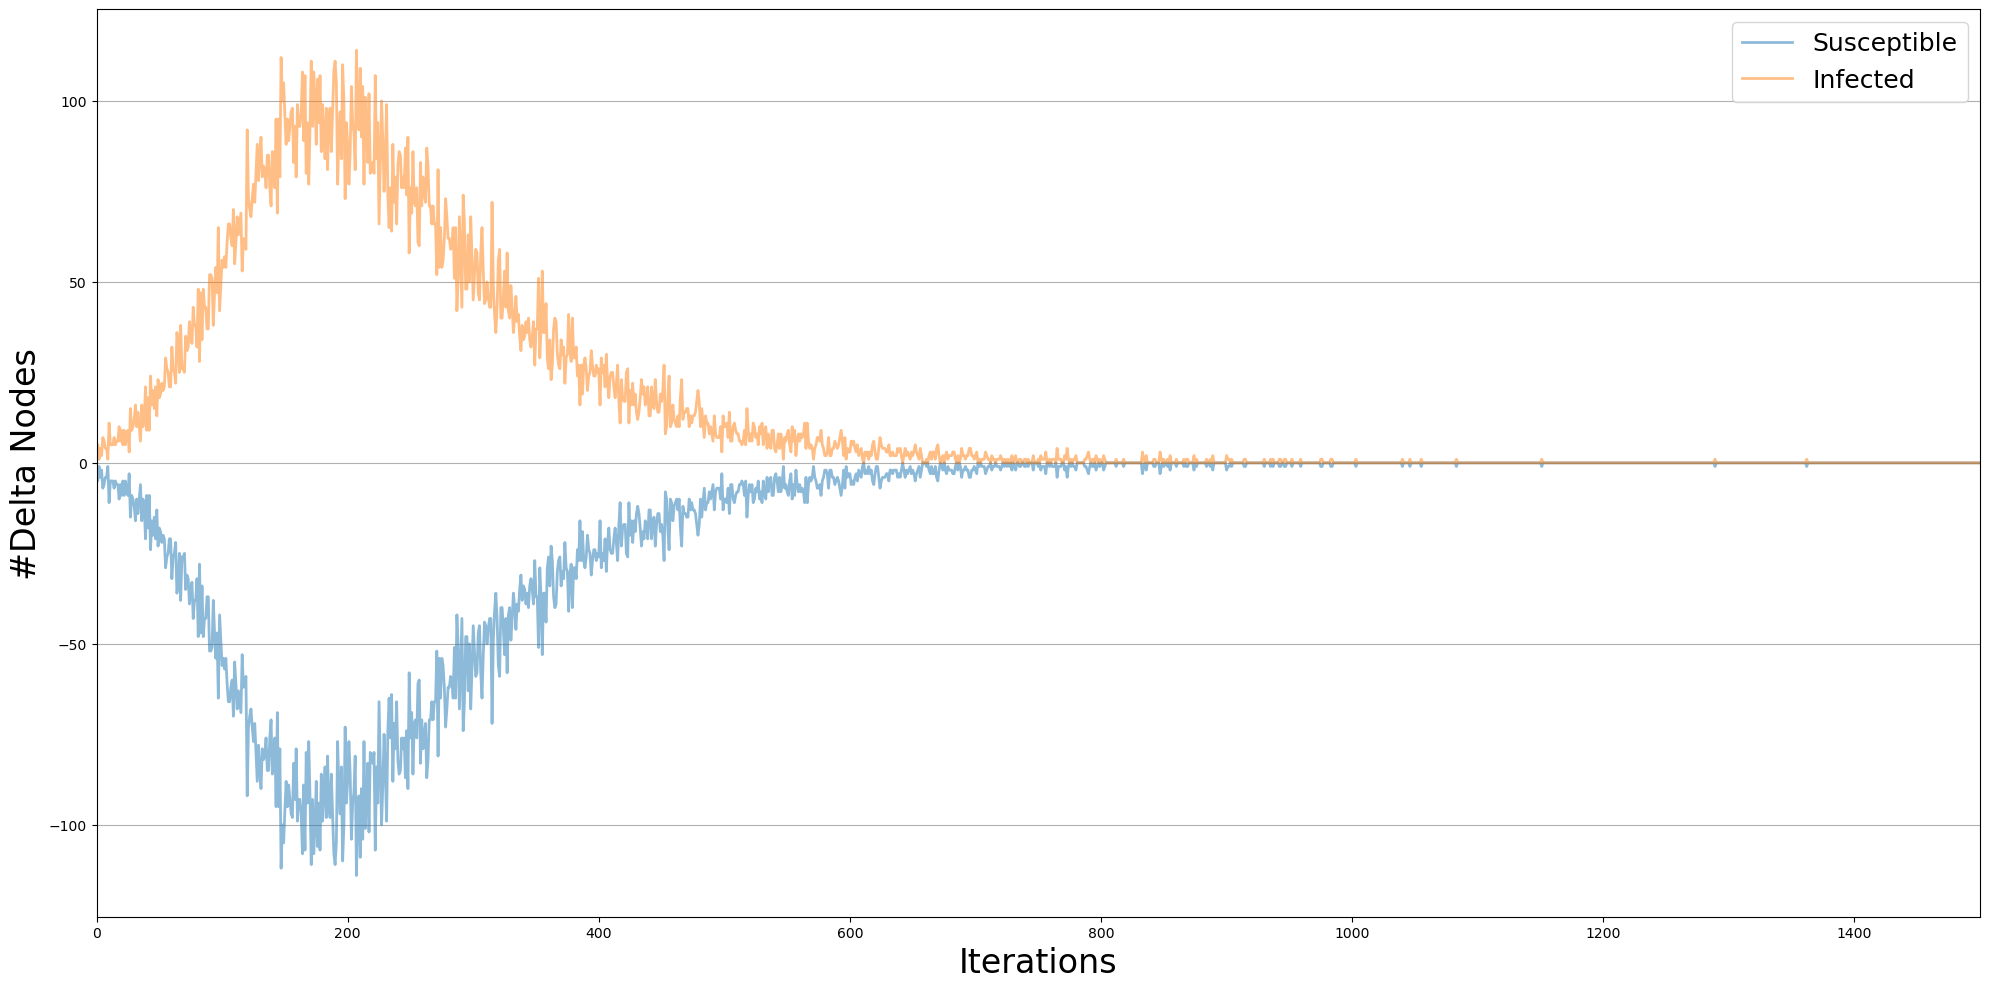

In [60]:
viz = DiffusionPrevalence(model_si_ba, trends_si_ba)
viz.plot()

### WS model

In [61]:
model_si_ws = ep.SIModel(ws)
model_si_ws.set_initial_status(cfg)

In [62]:
iterations = model_si_ws.iteration_bunch(1500, node_status=True)
trends_si_ws = model_si_ws.build_trends(iterations)

100%|██████████████████████████████████████████████████████████████████████████████| 1500/1500 [04:11<00:00,  5.95it/s]


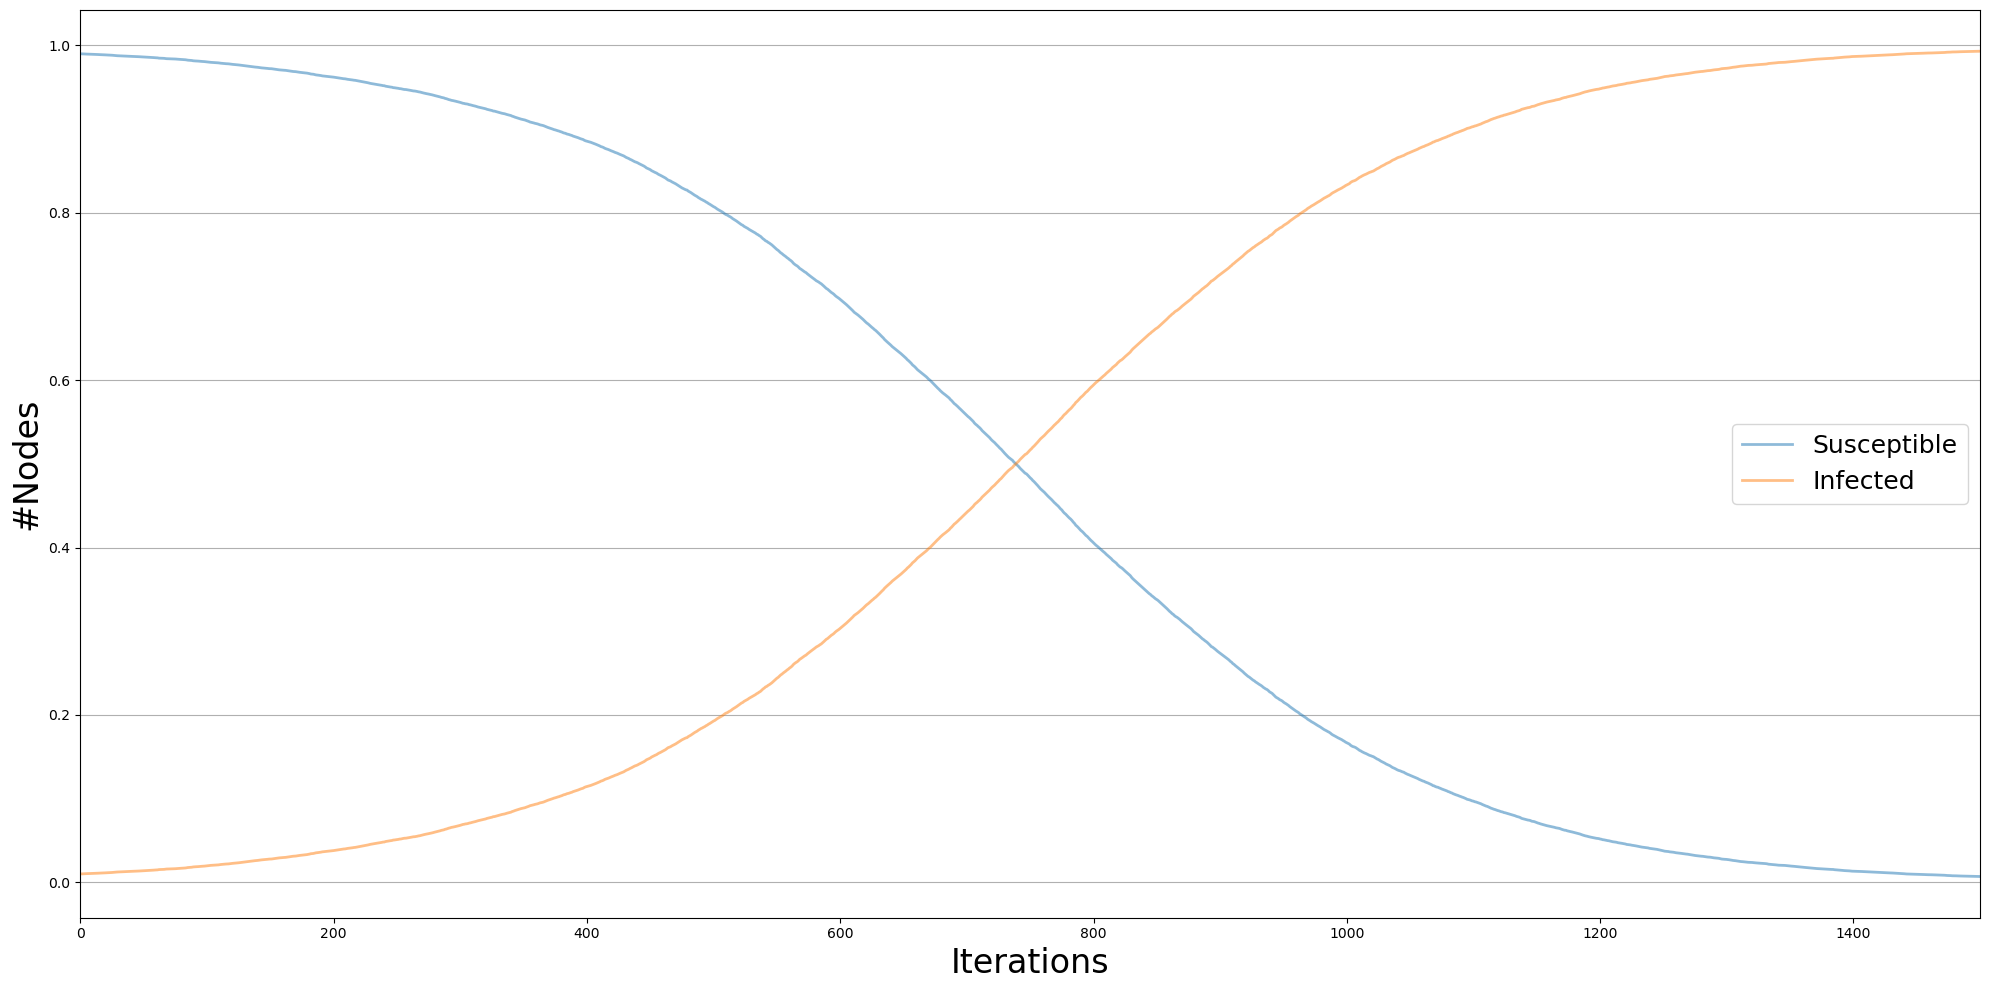

In [63]:
viz = DiffusionTrend(model_si_ws, trends_si_ws)
viz.plot()

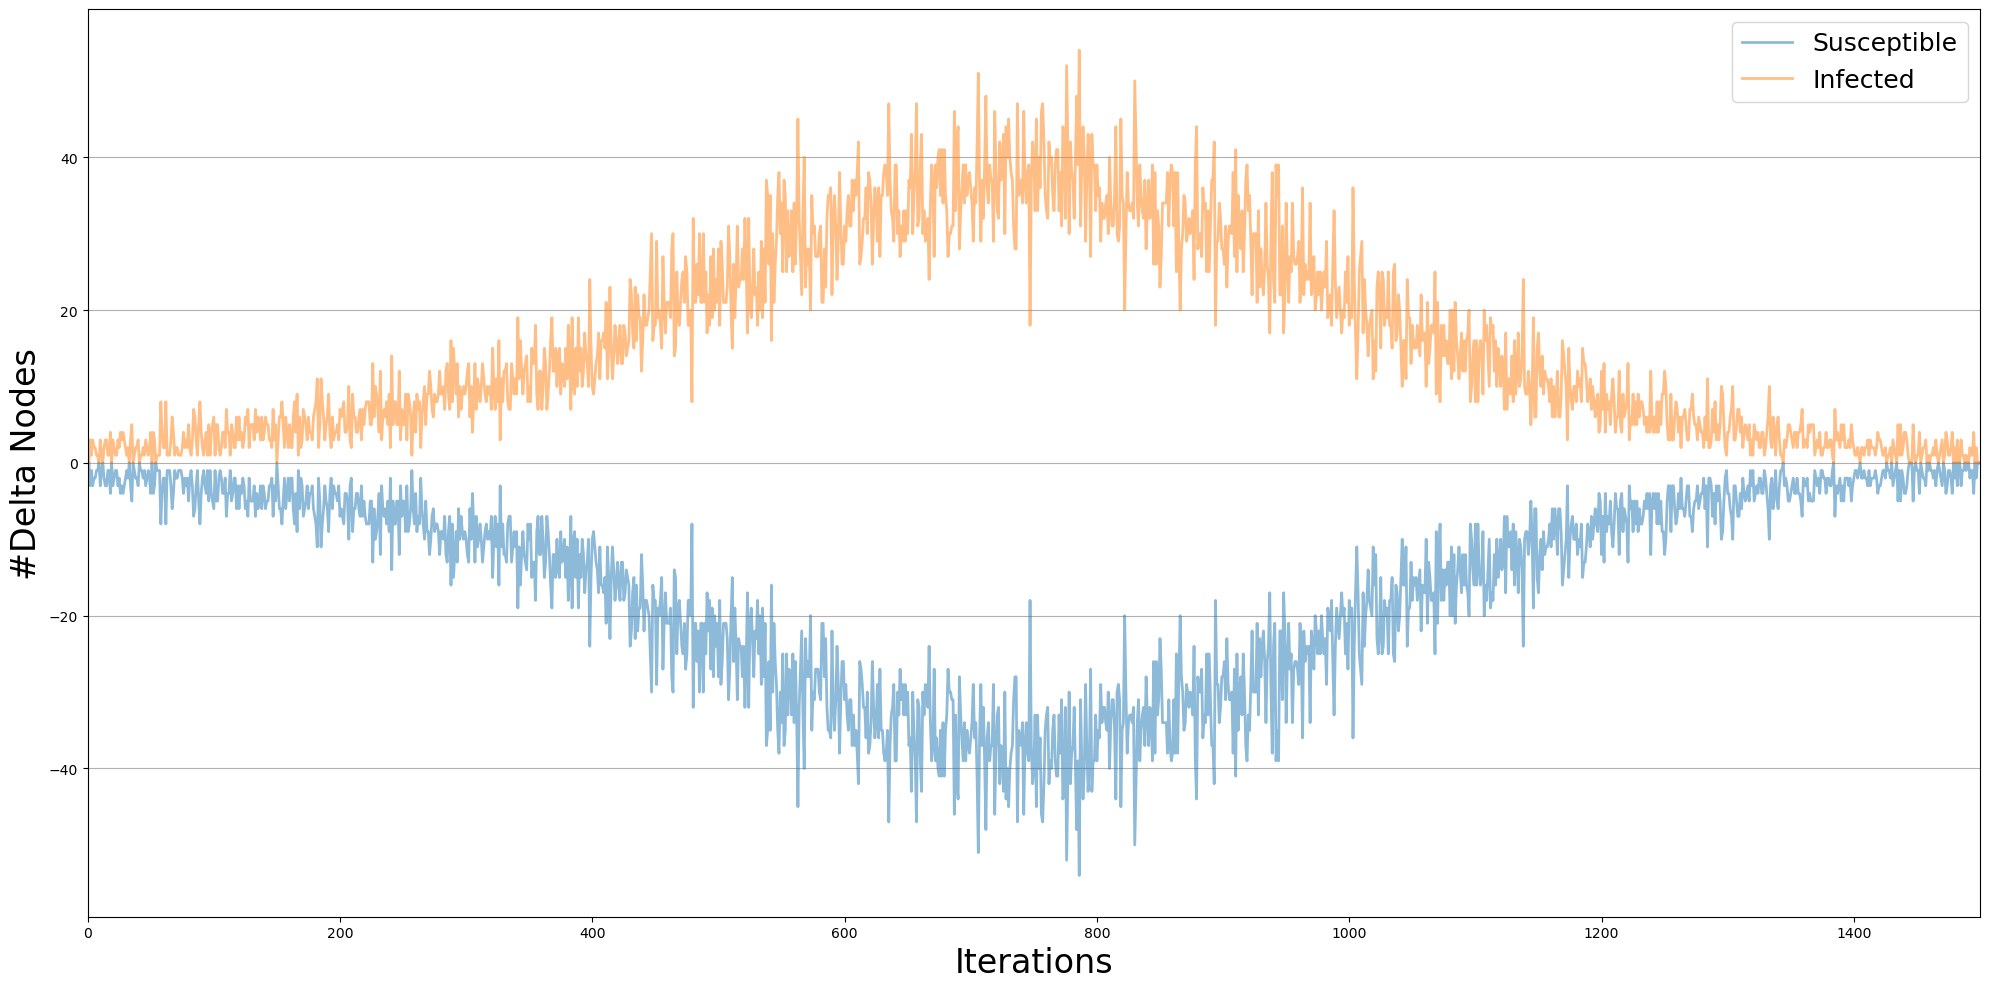

In [64]:
viz = DiffusionPrevalence(model_si_ws, trends_si_ws)
viz.plot()

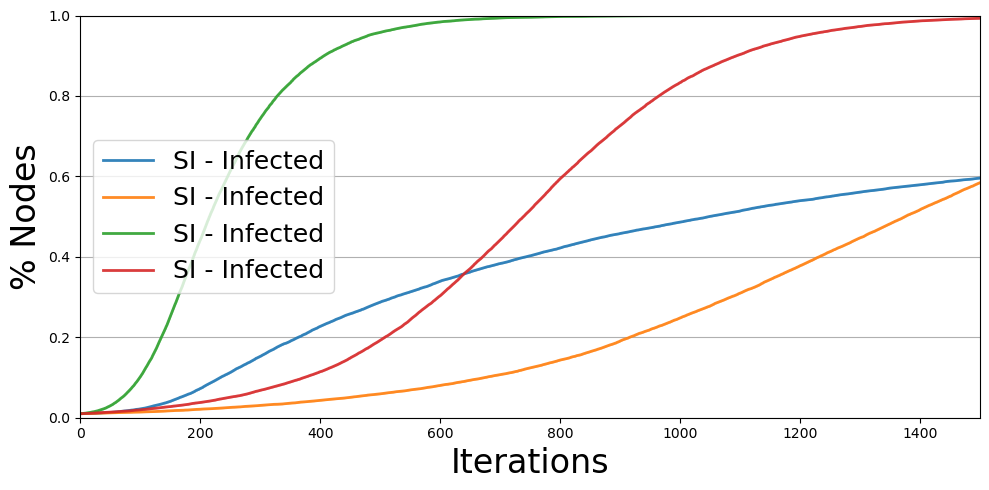

In [65]:
plt.rcParams.update({'figure.figsize':(10,5), 'figure.dpi':100})
viz = DiffusionTrendComparison([model_si, model_si_er, model_si_ba, model_si_ws], [trends_si, trends_si_er, trends_si_ba, trends_si_ws], statuses=['Infected'])
viz.plot()

In this case, ER (and WS for the first 600 iterations) had a slower initial growth of the infection.

(here and in all the other comparisons from now on:)
+ blue: our network
+ yellow: er
+ green: ba
+ red: ws

## SIS: Susceptible-Infected-Susceptible

For the first simulation, a situation with ƛ>1 i.e. a situation where an outbreak would happen:
+ % infected: 1% (0.01)
+ infection rate: 0.01
+ recovery rate: 0.005

Therefore, ƛ = 0.01/0.005 = 2.

### Our graph

In [66]:
model_sis_o = ep.SISModel(g)

In [67]:
model_sis_o.available_statuses

{'Susceptible': 0, 'Infected': 1}

In [68]:
cfg = mc.Configuration()
cfg.add_model_parameter('beta', 0.01) # infection rate
cfg.add_model_parameter('lambda', 0.005) # recovery rate
cfg.add_model_parameter("percentage_infected", 0.01)
model_sis_o.set_initial_status(cfg)

In [69]:
iterations = model_sis_o.iteration_bunch(600, node_status=True)
trends_sis_o = model_sis_o.build_trends(iterations)

100%|████████████████████████████████████████████████████████████████████████████████| 600/600 [02:24<00:00,  4.14it/s]


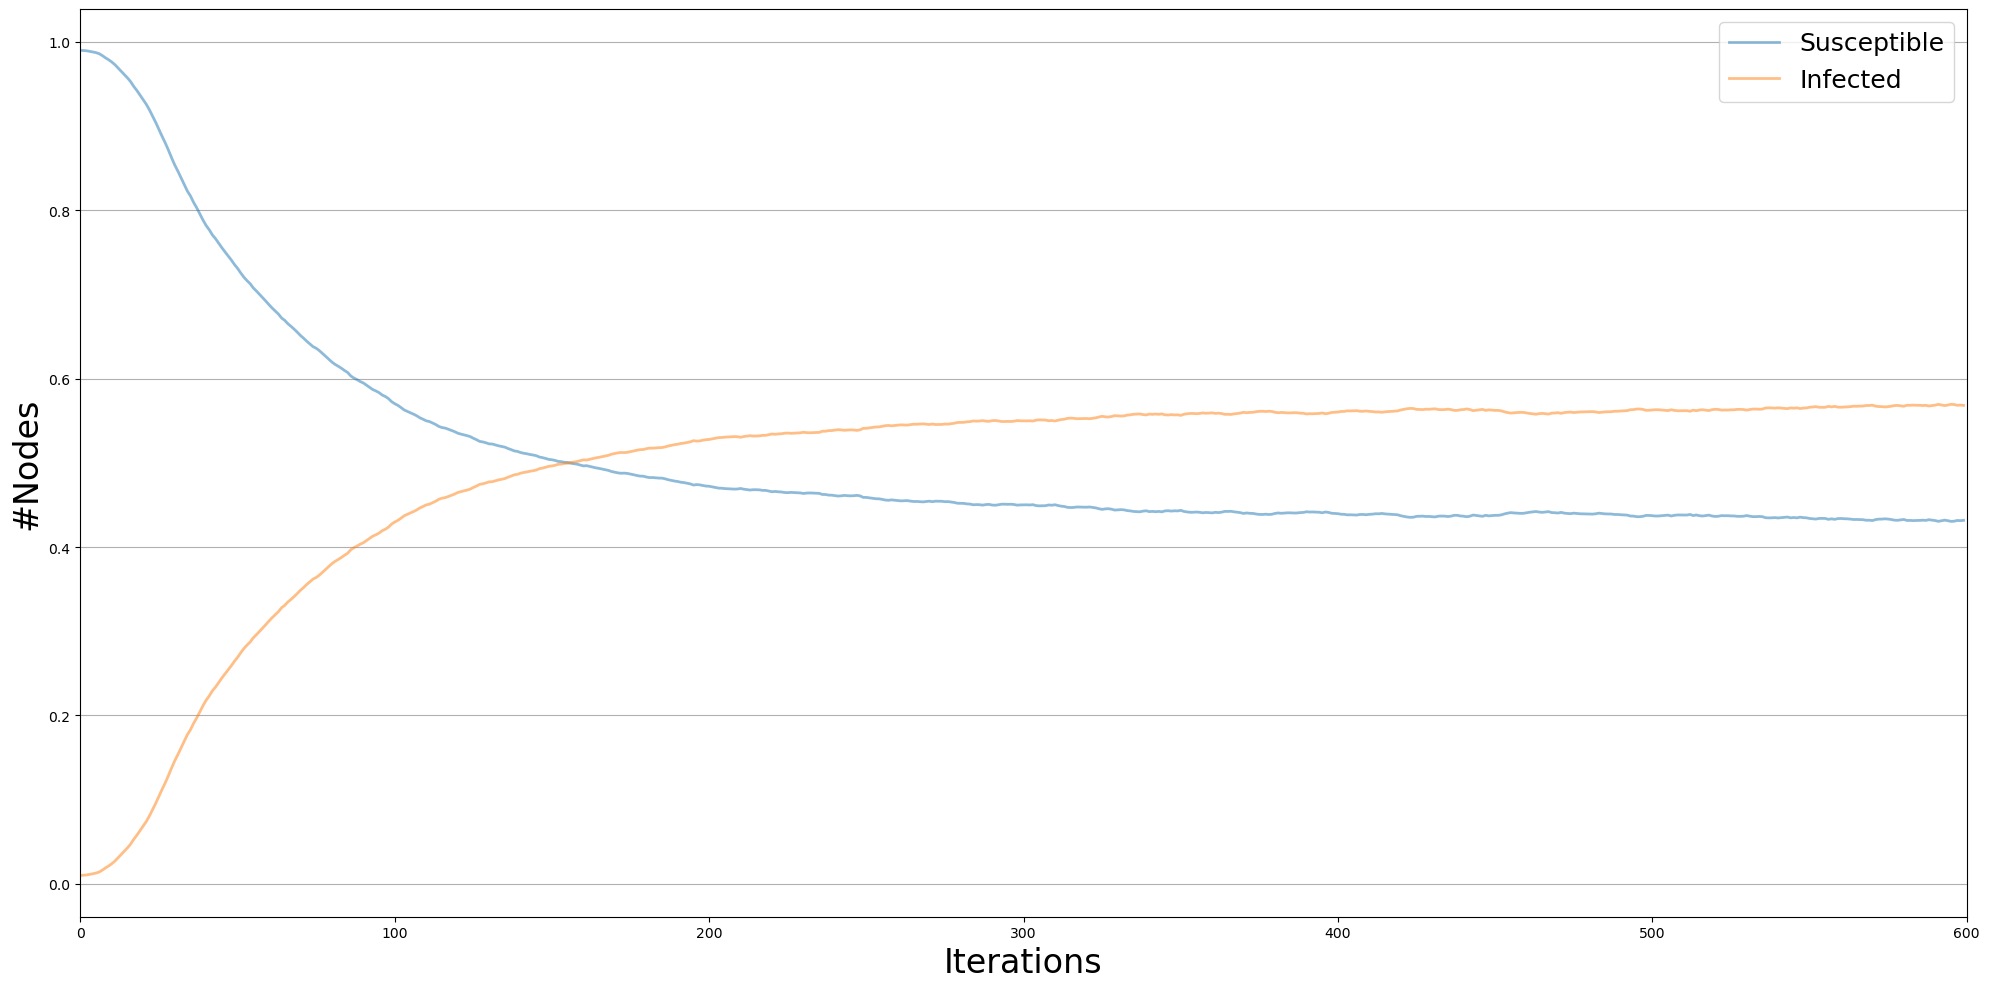

In [70]:
viz = DiffusionTrend(model_sis_o, trends_sis_o)
viz.plot()

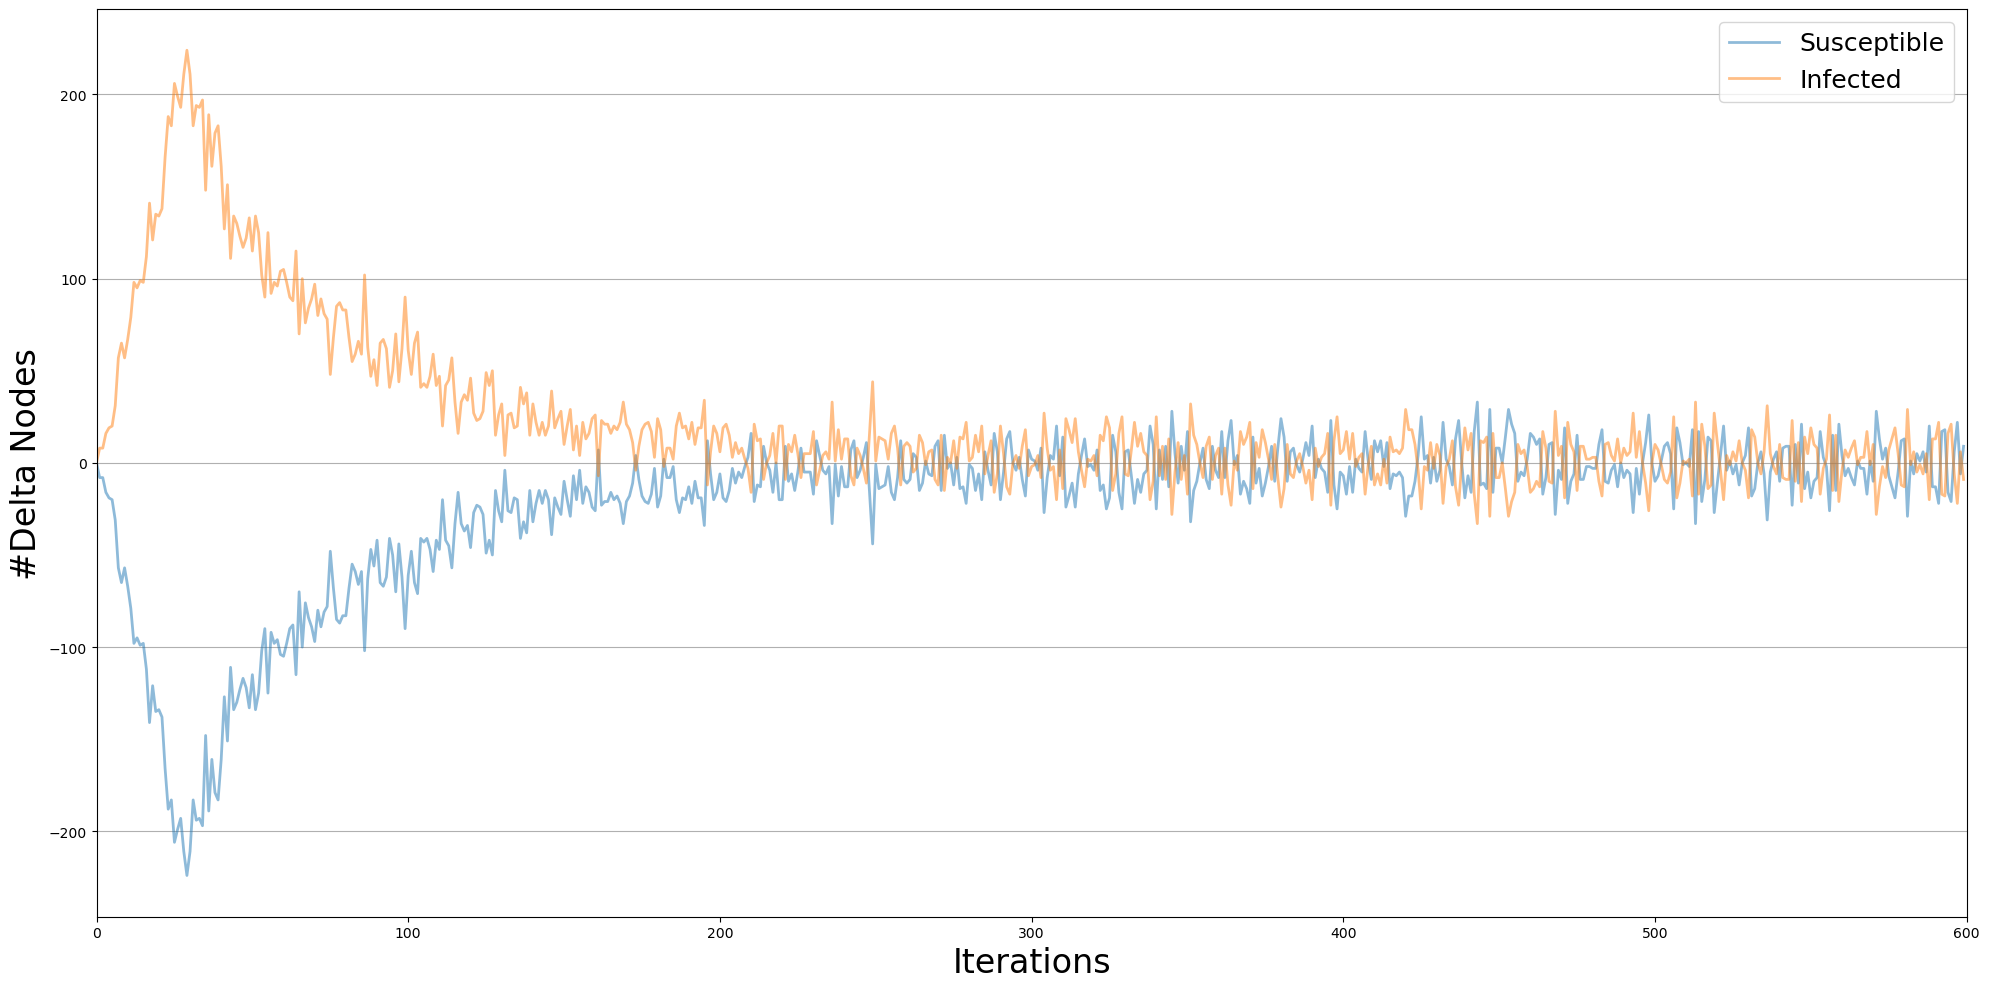

In [71]:
viz = DiffusionPrevalence(model_sis_o, trends_sis_o)
viz.plot()

### ER model

In [72]:
model_sis_o_er = ep.SISModel(er)
model_sis_o_er.set_initial_status(cfg)

In [73]:
iterations = model_sis_o_er.iteration_bunch(600, node_status=True)
trends_sis_o_er = model_sis_o_er.build_trends(iterations)

100%|████████████████████████████████████████████████████████████████████████████████| 600/600 [02:13<00:00,  4.48it/s]


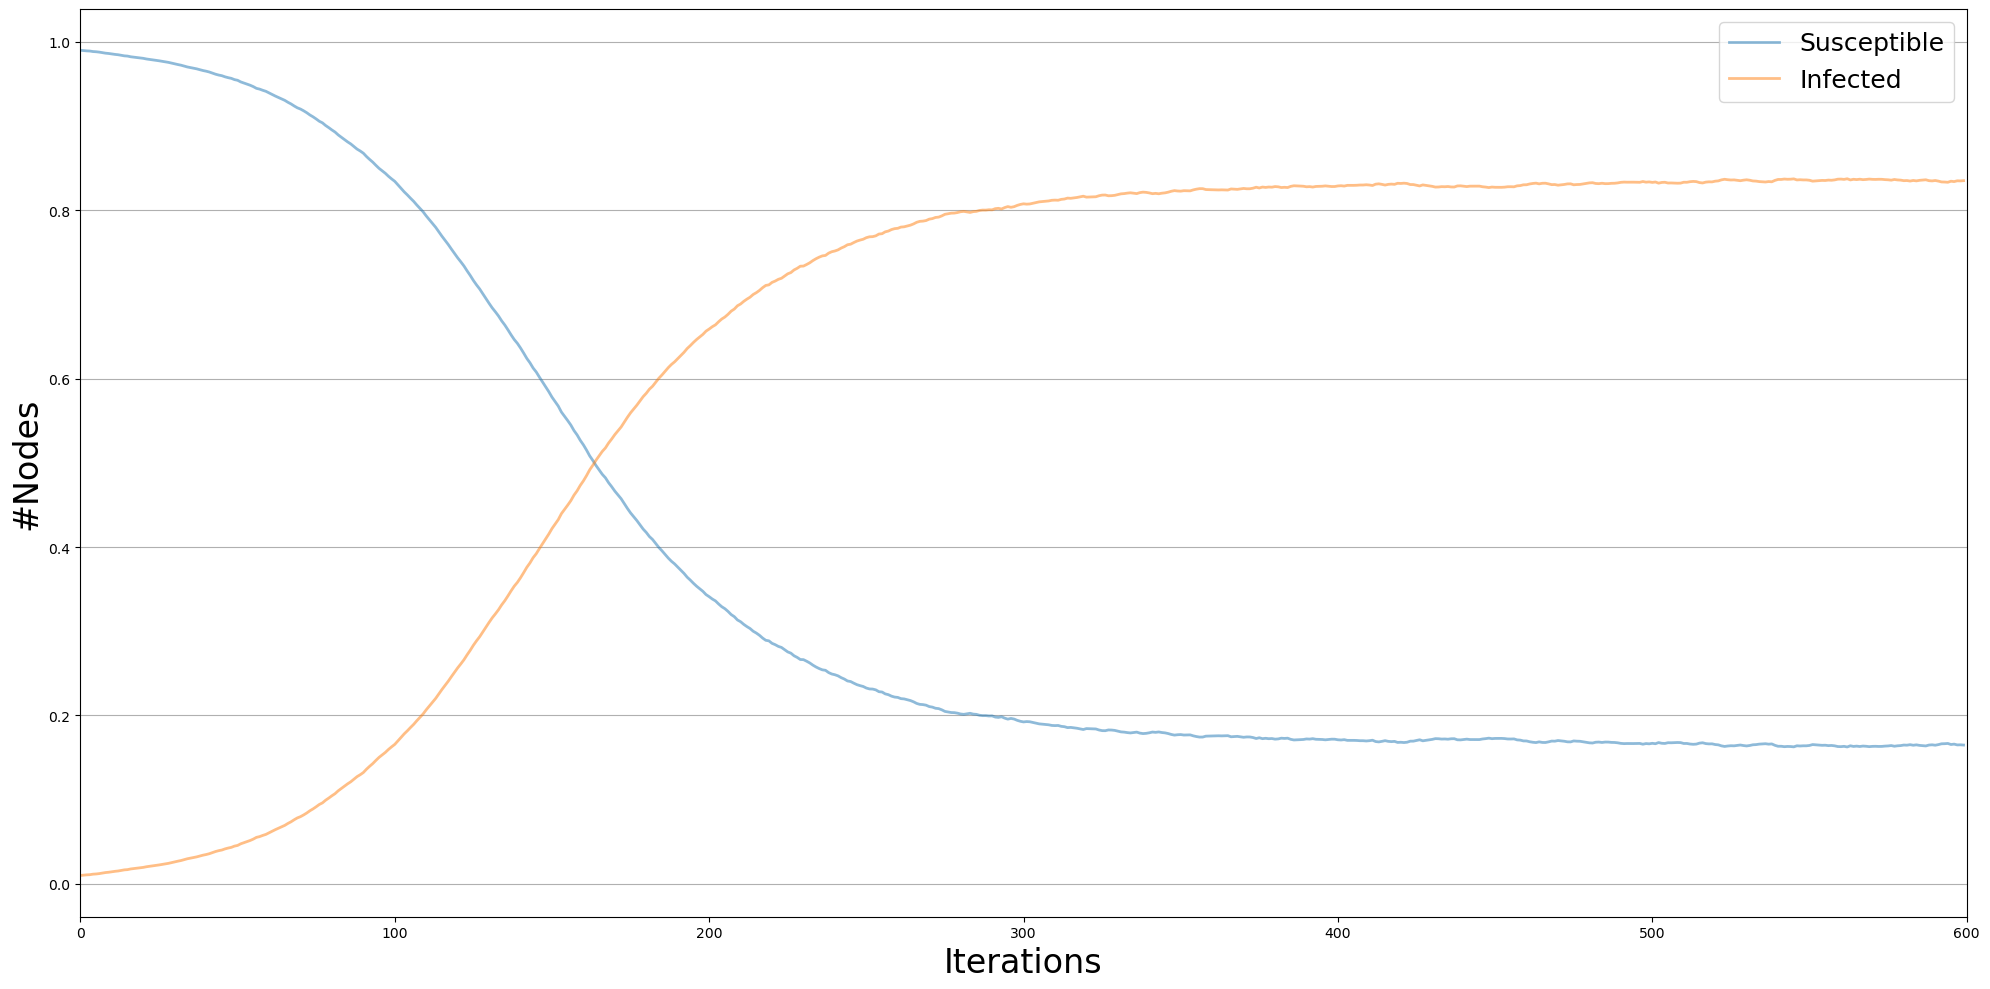

In [74]:
viz = DiffusionTrend(model_sis_o_er, trends_sis_o_er)
viz.plot()

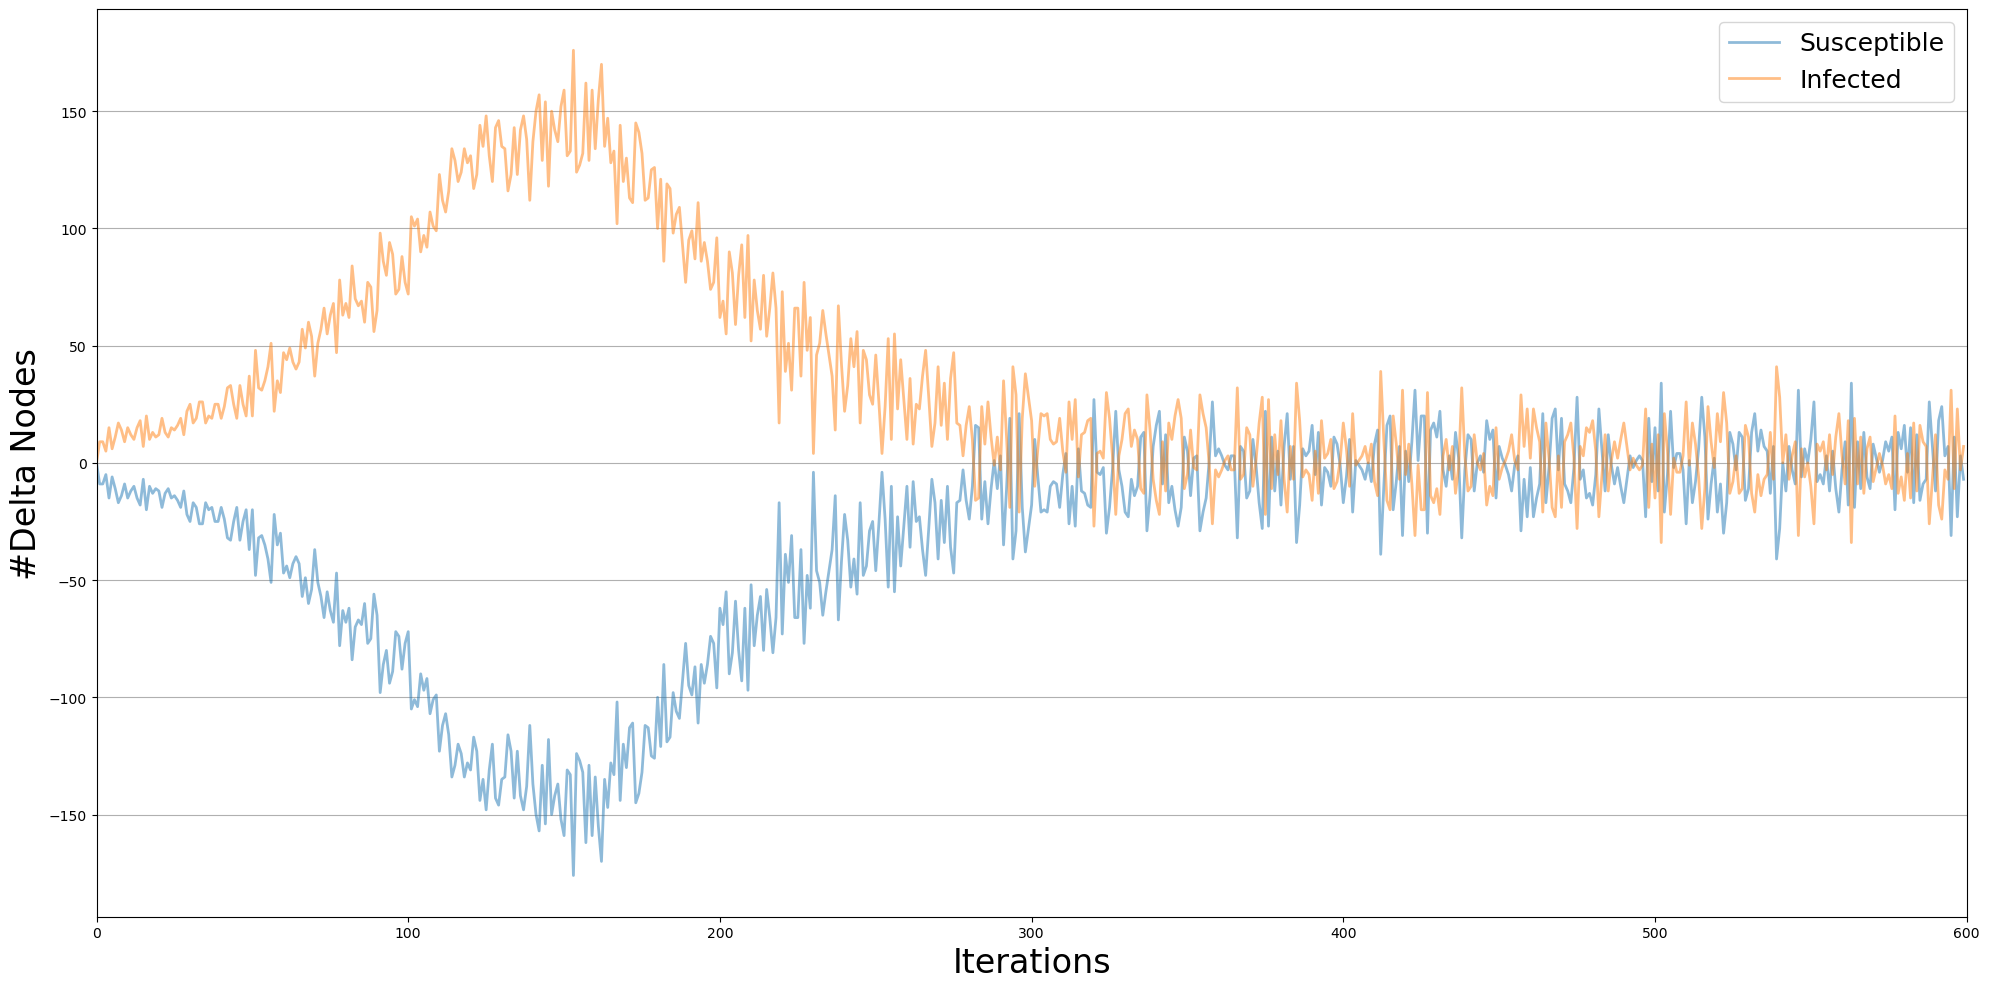

In [75]:
viz = DiffusionPrevalence(model_sis_o_er, trends_sis_o_er)
viz.plot()

### BA model

In [76]:
model_sis_o_ba = ep.SISModel(ba)
model_sis_o_ba.set_initial_status(cfg)

In [77]:
iterations = model_sis_o_ba.iteration_bunch(600, node_status=True)
trends_sis_o_ba = model_sis_o_ba.build_trends(iterations)

100%|████████████████████████████████████████████████████████████████████████████████| 600/600 [01:14<00:00,  8.02it/s]


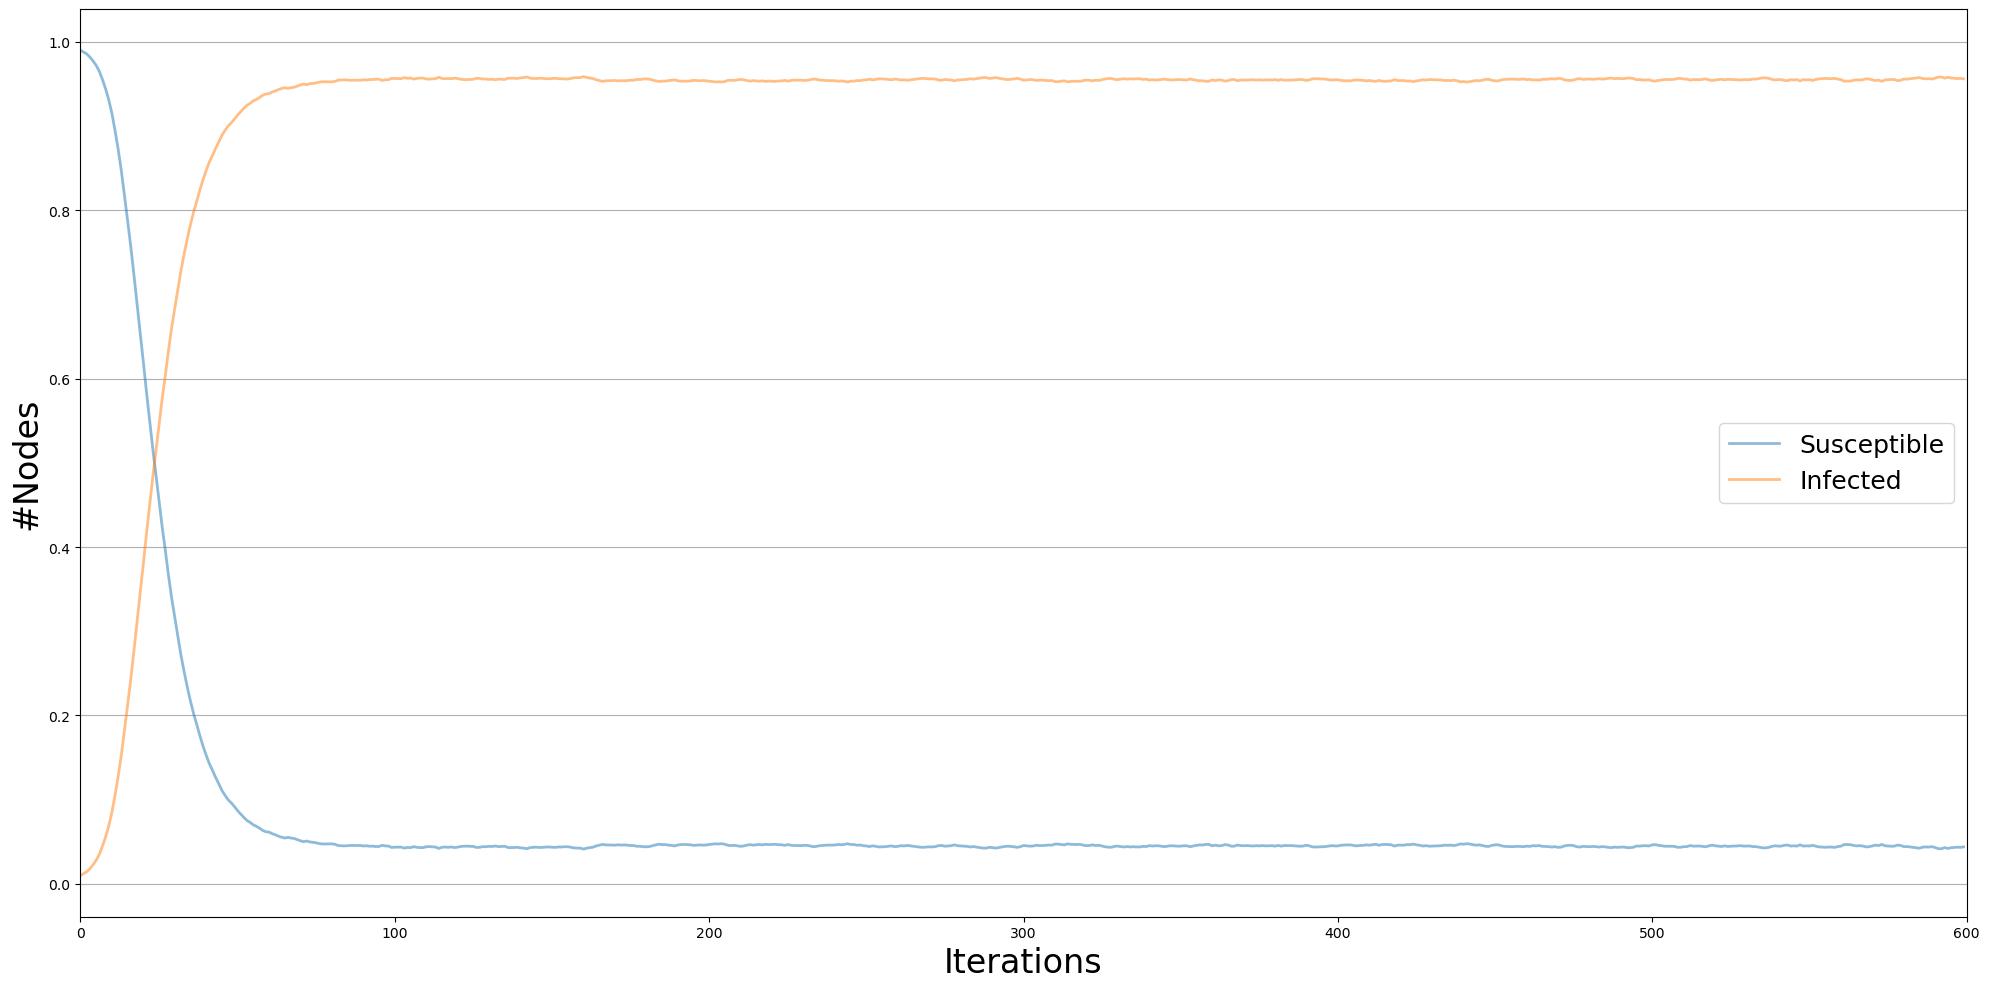

In [78]:
viz = DiffusionTrend(model_sis_o_ba, trends_sis_o_ba)
viz.plot()

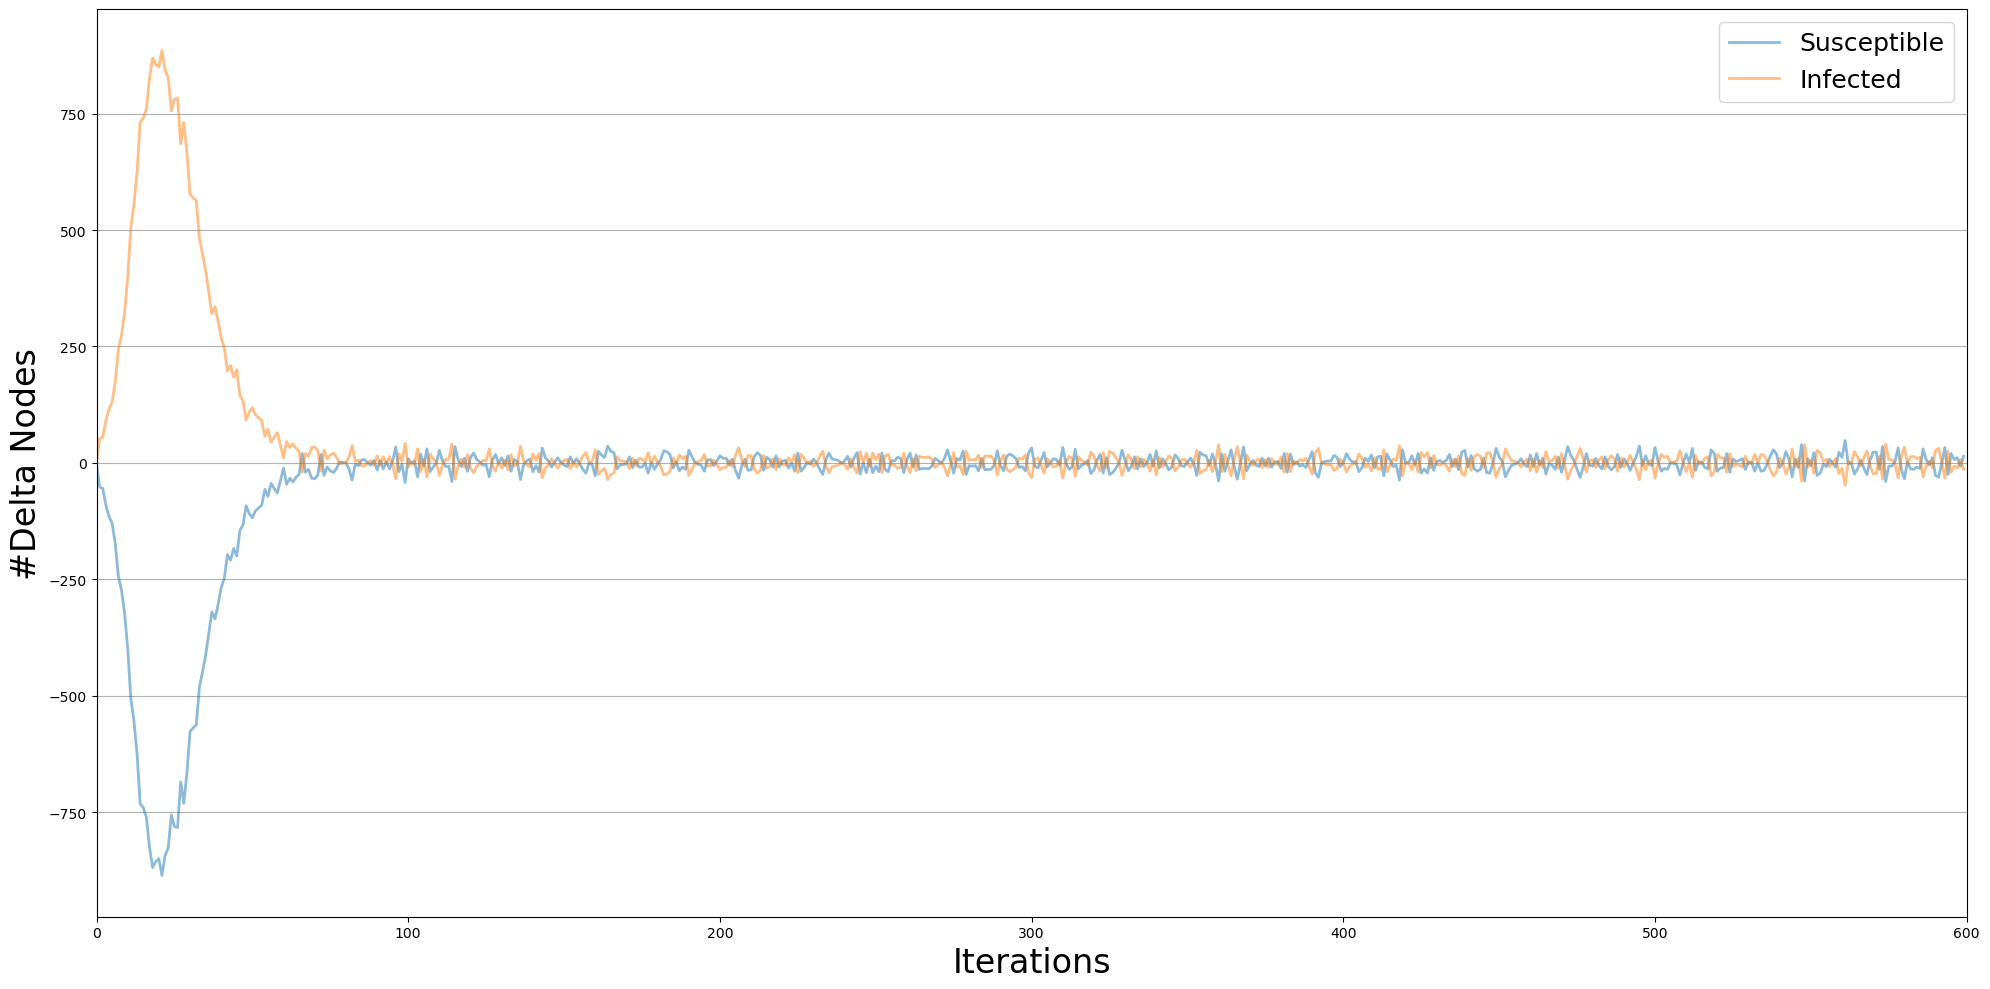

In [79]:
viz = DiffusionPrevalence(model_sis_o_ba, trends_sis_o_ba)
viz.plot()

### WS model

In [80]:
model_sis_o_ws = ep.SISModel(ws)
model_sis_o_ws.set_initial_status(cfg)

In [81]:
iterations = model_sis_o_ws.iteration_bunch(600, node_status=True)
trends_sis_o_ws = model_sis_o_ws.build_trends(iterations)

100%|████████████████████████████████████████████████████████████████████████████████| 600/600 [01:23<00:00,  7.18it/s]


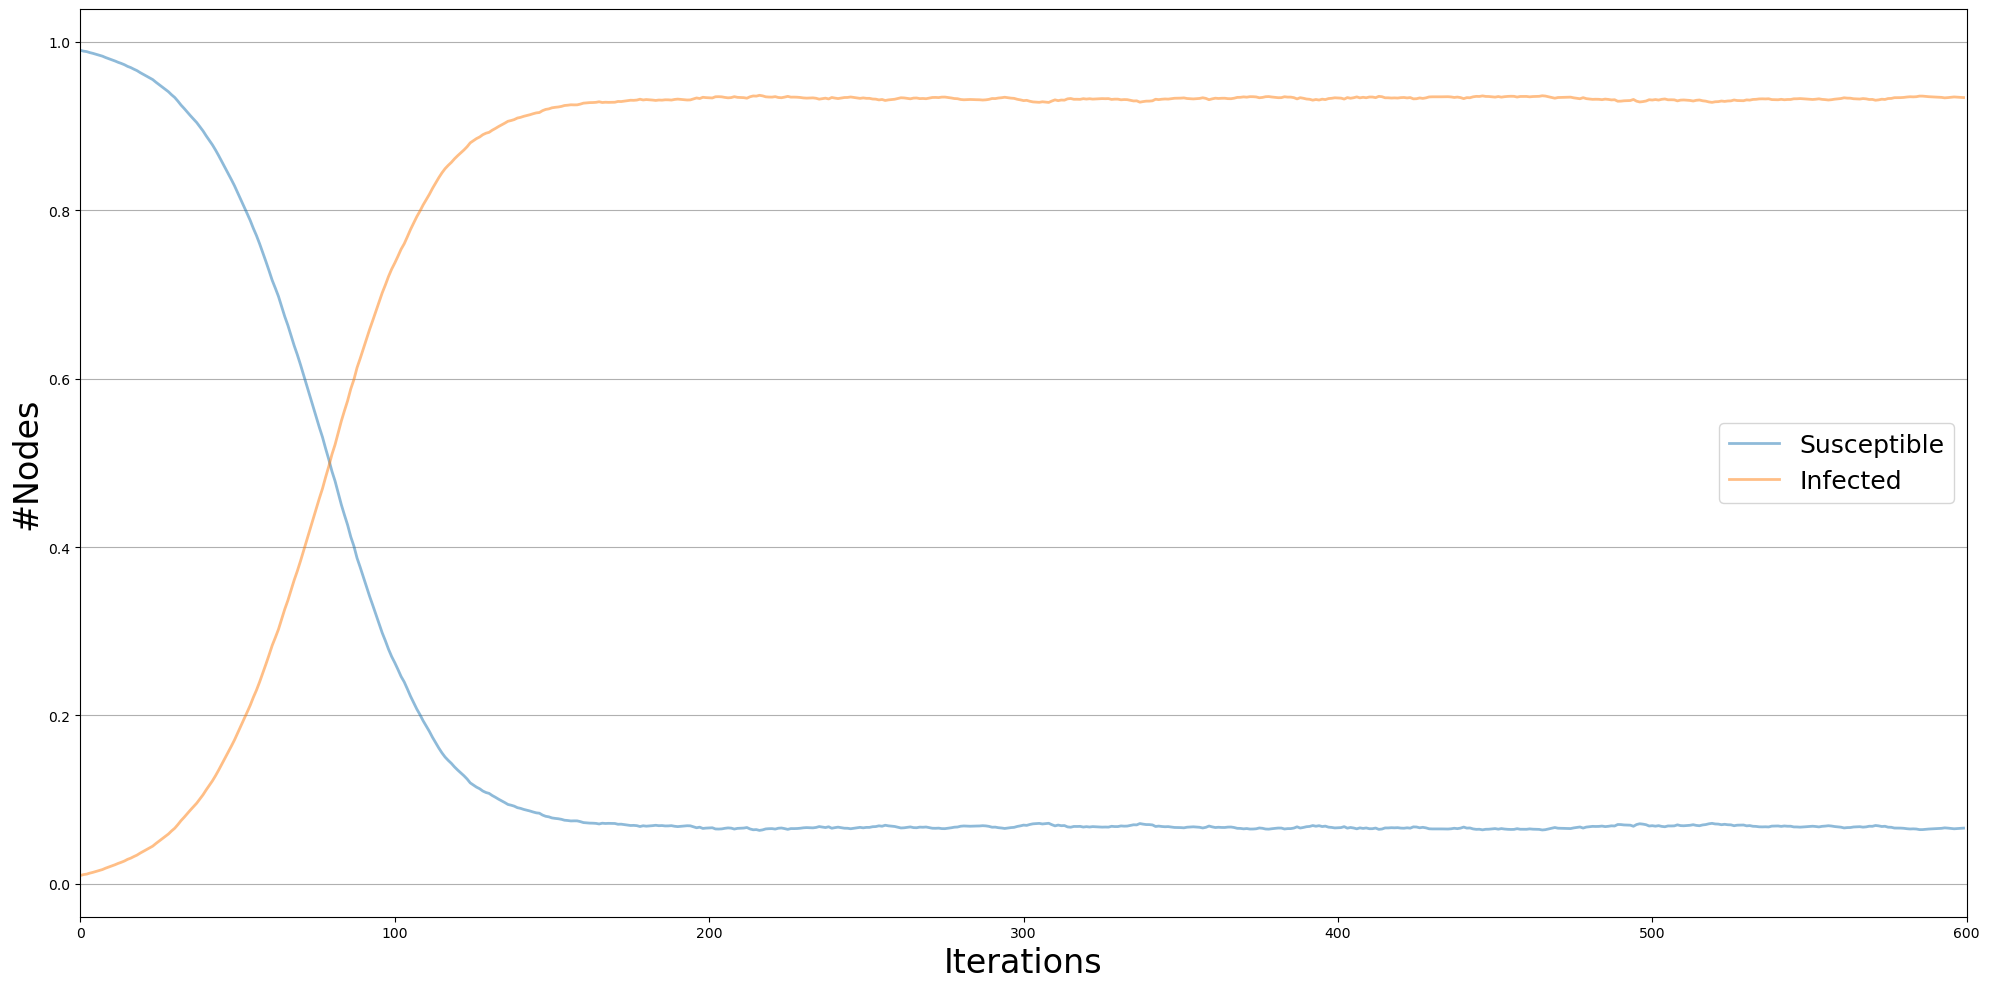

In [82]:
viz = DiffusionTrend(model_sis_o_ws, trends_sis_o_ws)
viz.plot()

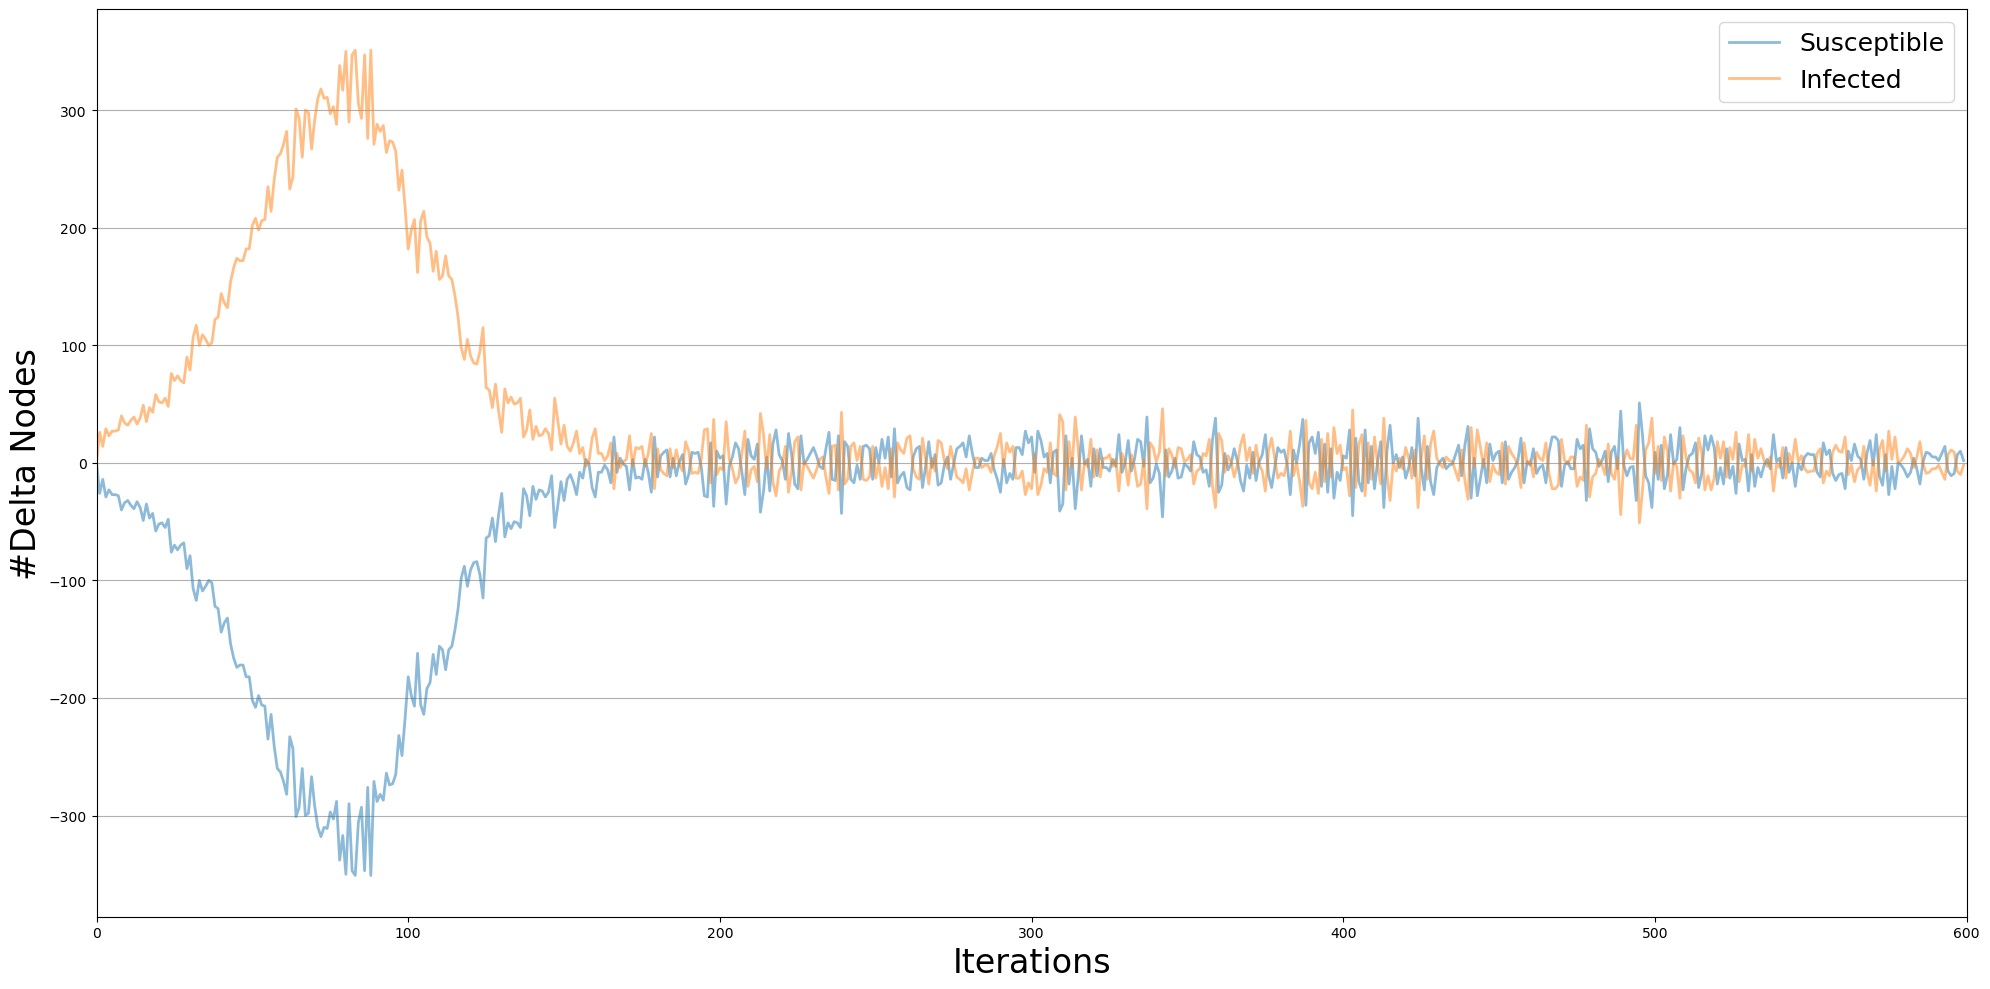

In [83]:
viz = DiffusionPrevalence(model_sis_o_ws, trends_sis_o_ws)
viz.plot()

Comparing all the models:

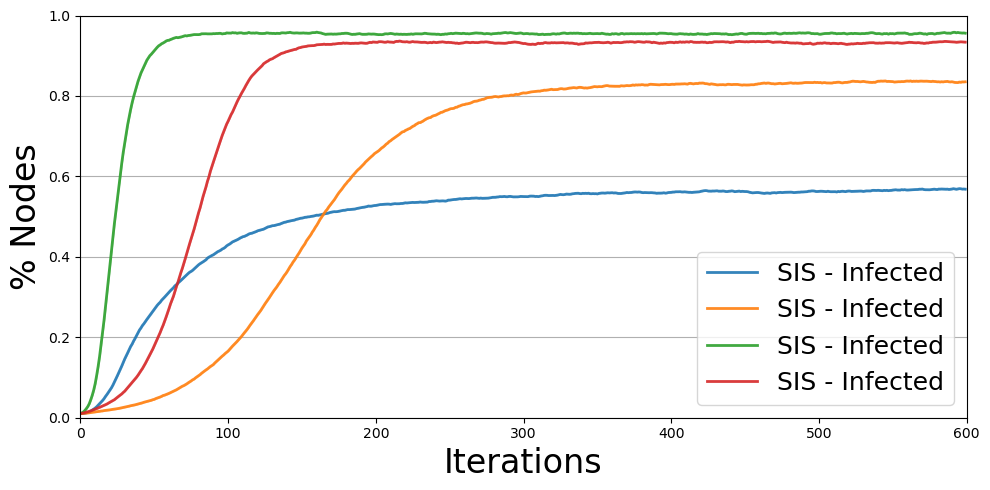

In [84]:
plt.rcParams.update({'figure.figsize':(10,5), 'figure.dpi':100})
viz = DiffusionTrendComparison([model_sis_o, model_sis_o_er, model_sis_o_ba, model_sis_o_ws], [trends_sis_o, trends_sis_o_er, trends_sis_o_ba, trends_sis_o_ws], statuses=['Infected'])
viz.plot()

For a second simulation, a situation where ƛ<1 and an endemic state is reached (μ < β〈k〉; 〈k〉 is 8.63 for our network):
+ % infected: 1%
+ infection rate: 0.005
+ recovery rate: 0.01

Therefore, ƛ = 0.005/0.01 = 0.5, and 0.01 < 0.005*8.63.

### Our network

In [85]:
cfg = mc.Configuration()
cfg.add_model_parameter('beta', 0.005) # infection rate
cfg.add_model_parameter('lambda', 0.01) # recovery rate
cfg.add_model_parameter("percentage_infected", 0.01)

In [86]:
model_sis_e = ep.SISModel(g)
model_sis_e.set_initial_status(cfg)
iterations = model_sis_e.iteration_bunch(600, node_status=True)
trends_sis_e = model_sis_e.build_trends(iterations)

100%|████████████████████████████████████████████████████████████████████████████████| 600/600 [02:12<00:00,  4.51it/s]


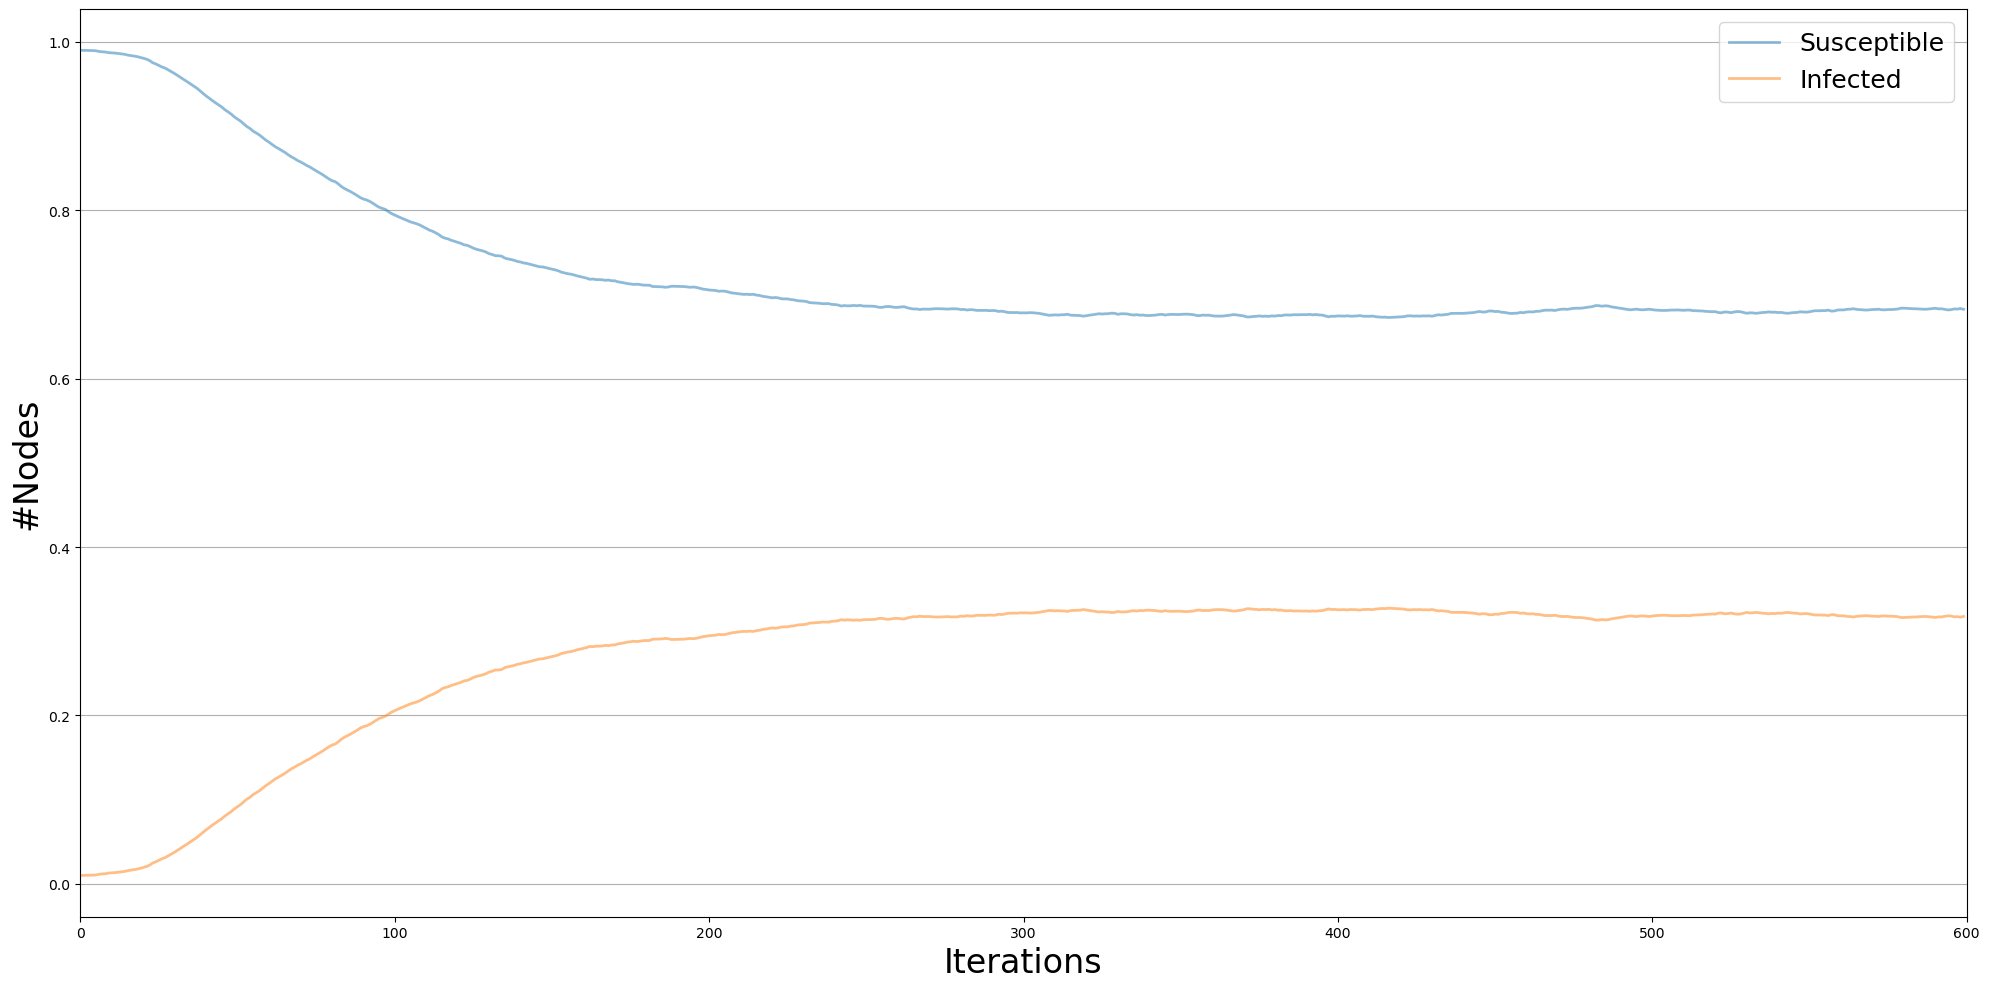

In [87]:
viz = DiffusionTrend(model_sis_e, trends_sis_e)
viz.plot()

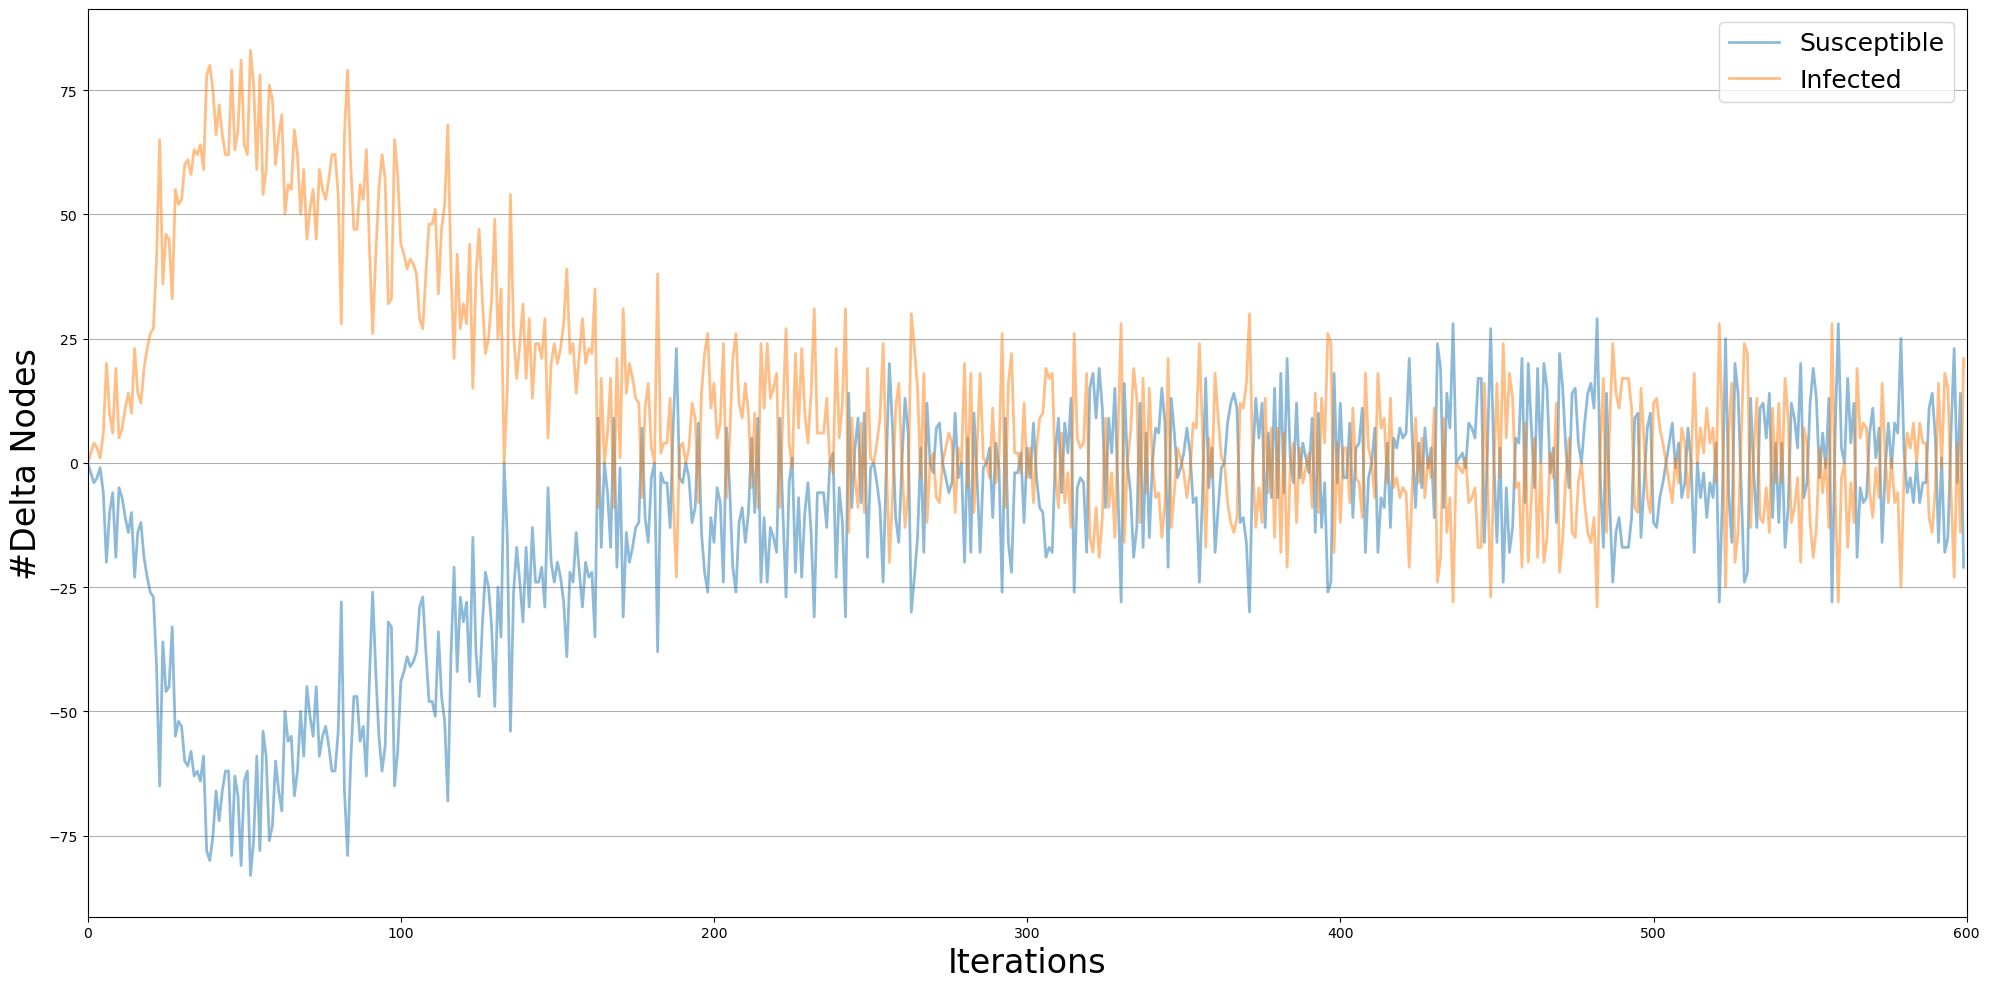

In [88]:
viz = DiffusionPrevalence(model_sis_e, trends_sis_e)
viz.plot()

### ER model

In [89]:
model_sis_e_er = ep.SISModel(er)
model_sis_e_er.set_initial_status(cfg)
iterations = model_sis_e_er.iteration_bunch(600, node_status=True)
trends_sis_e_er = model_sis_e_er.build_trends(iterations)

100%|████████████████████████████████████████████████████████████████████████████████| 600/600 [02:22<00:00,  4.20it/s]


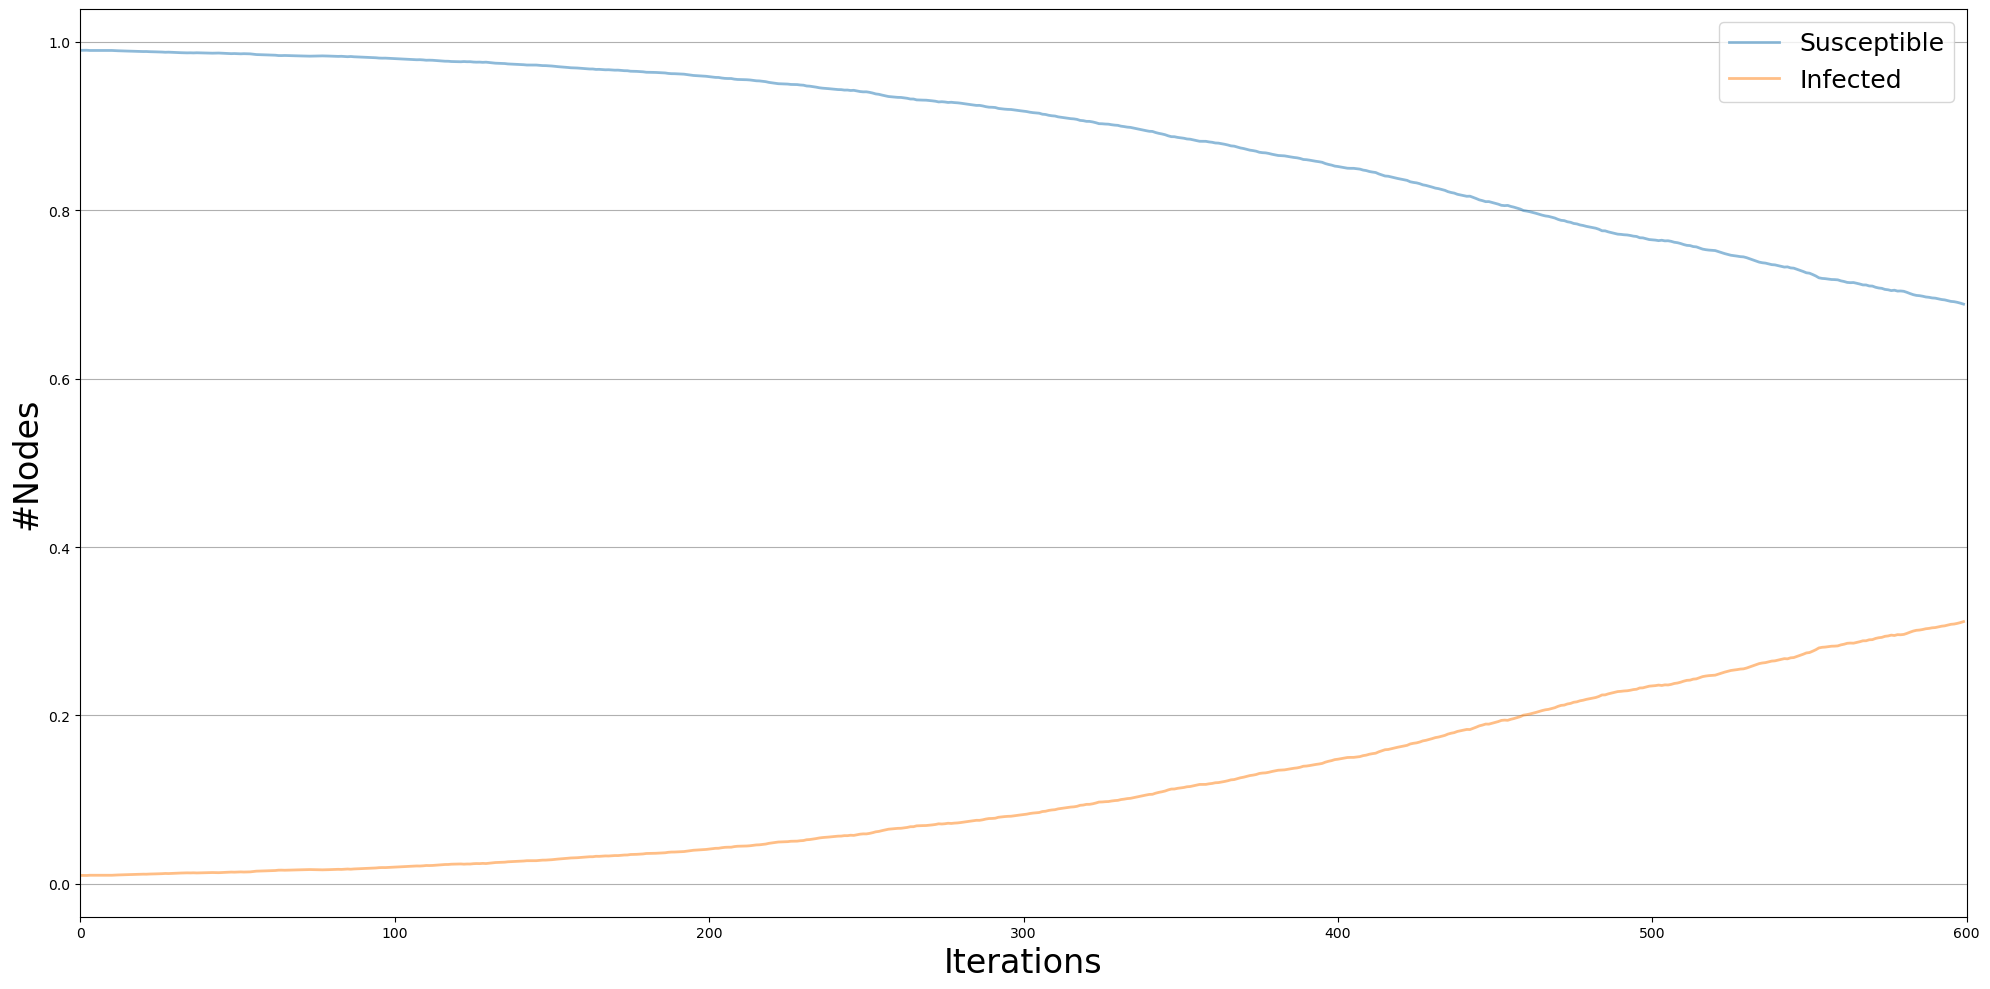

In [90]:
viz = DiffusionTrend(model_sis_e_er, trends_sis_e_er)
viz.plot()

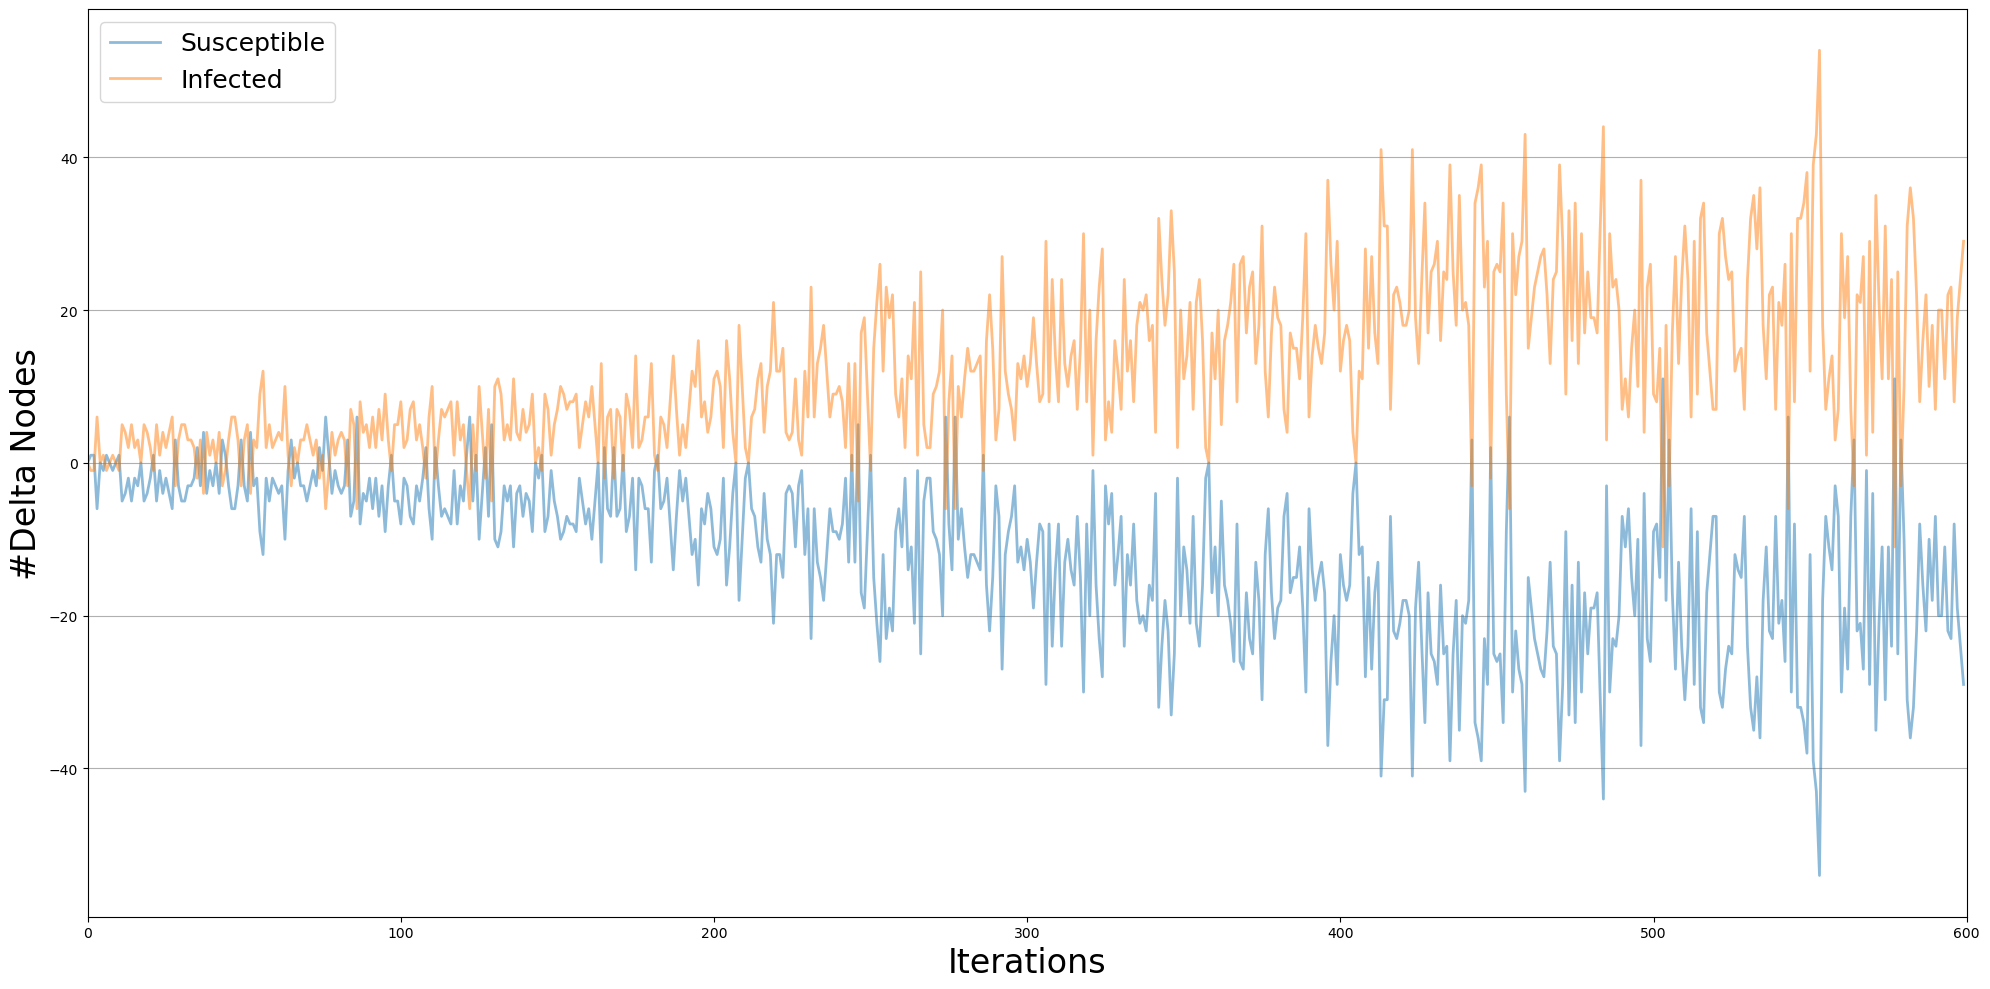

In [91]:
viz = DiffusionPrevalence(model_sis_e_er, trends_sis_e_er)
viz.plot()

### BA model

In [99]:
model_sis_e_ba = ep.SISModel(ba)
model_sis_e_ba.set_initial_status(cfg)
iterations = model_sis_e_ba.iteration_bunch(600, node_status=True)
trends_sis_e_ba = model_sis_e_ba.build_trends(iterations)

100%|████████████████████████████████████████████████████████████████████████████████| 600/600 [01:37<00:00,  6.13it/s]


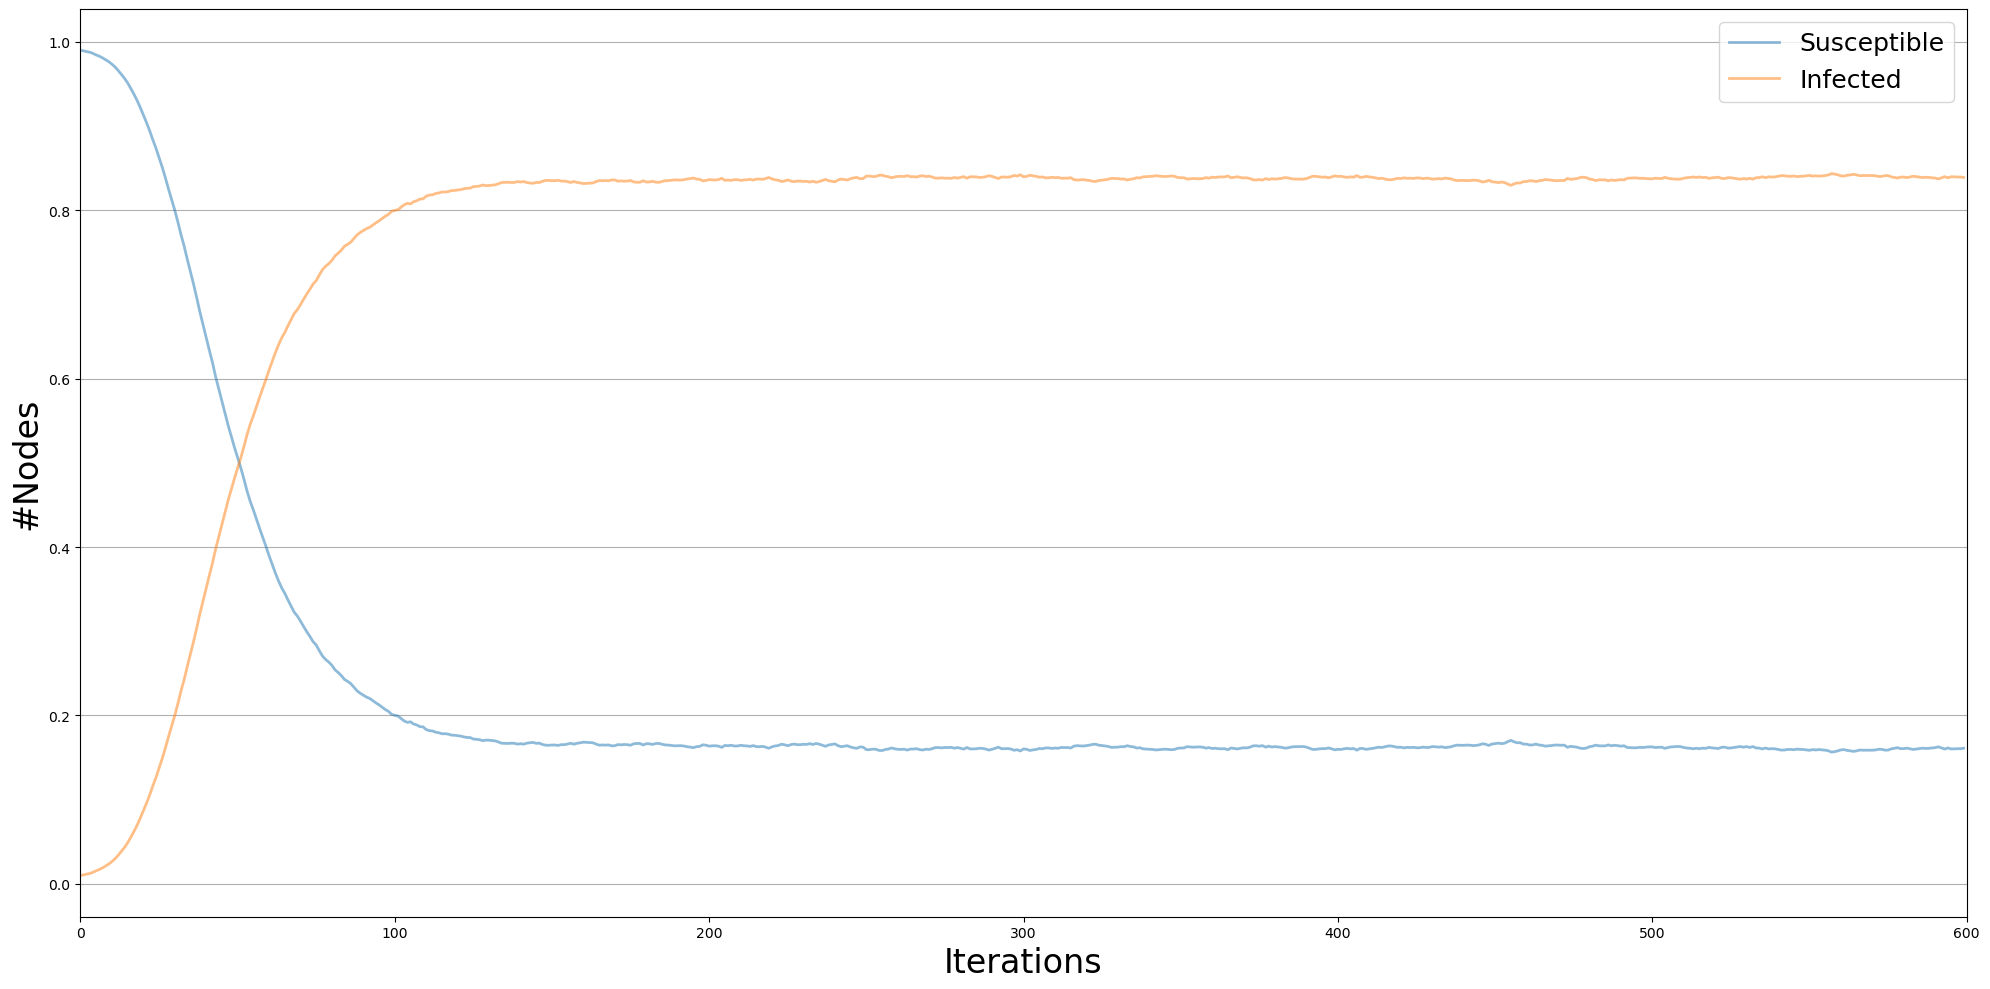

In [100]:
viz = DiffusionTrend(model_sis_e_ba, trends_sis_e_ba)
viz.plot()

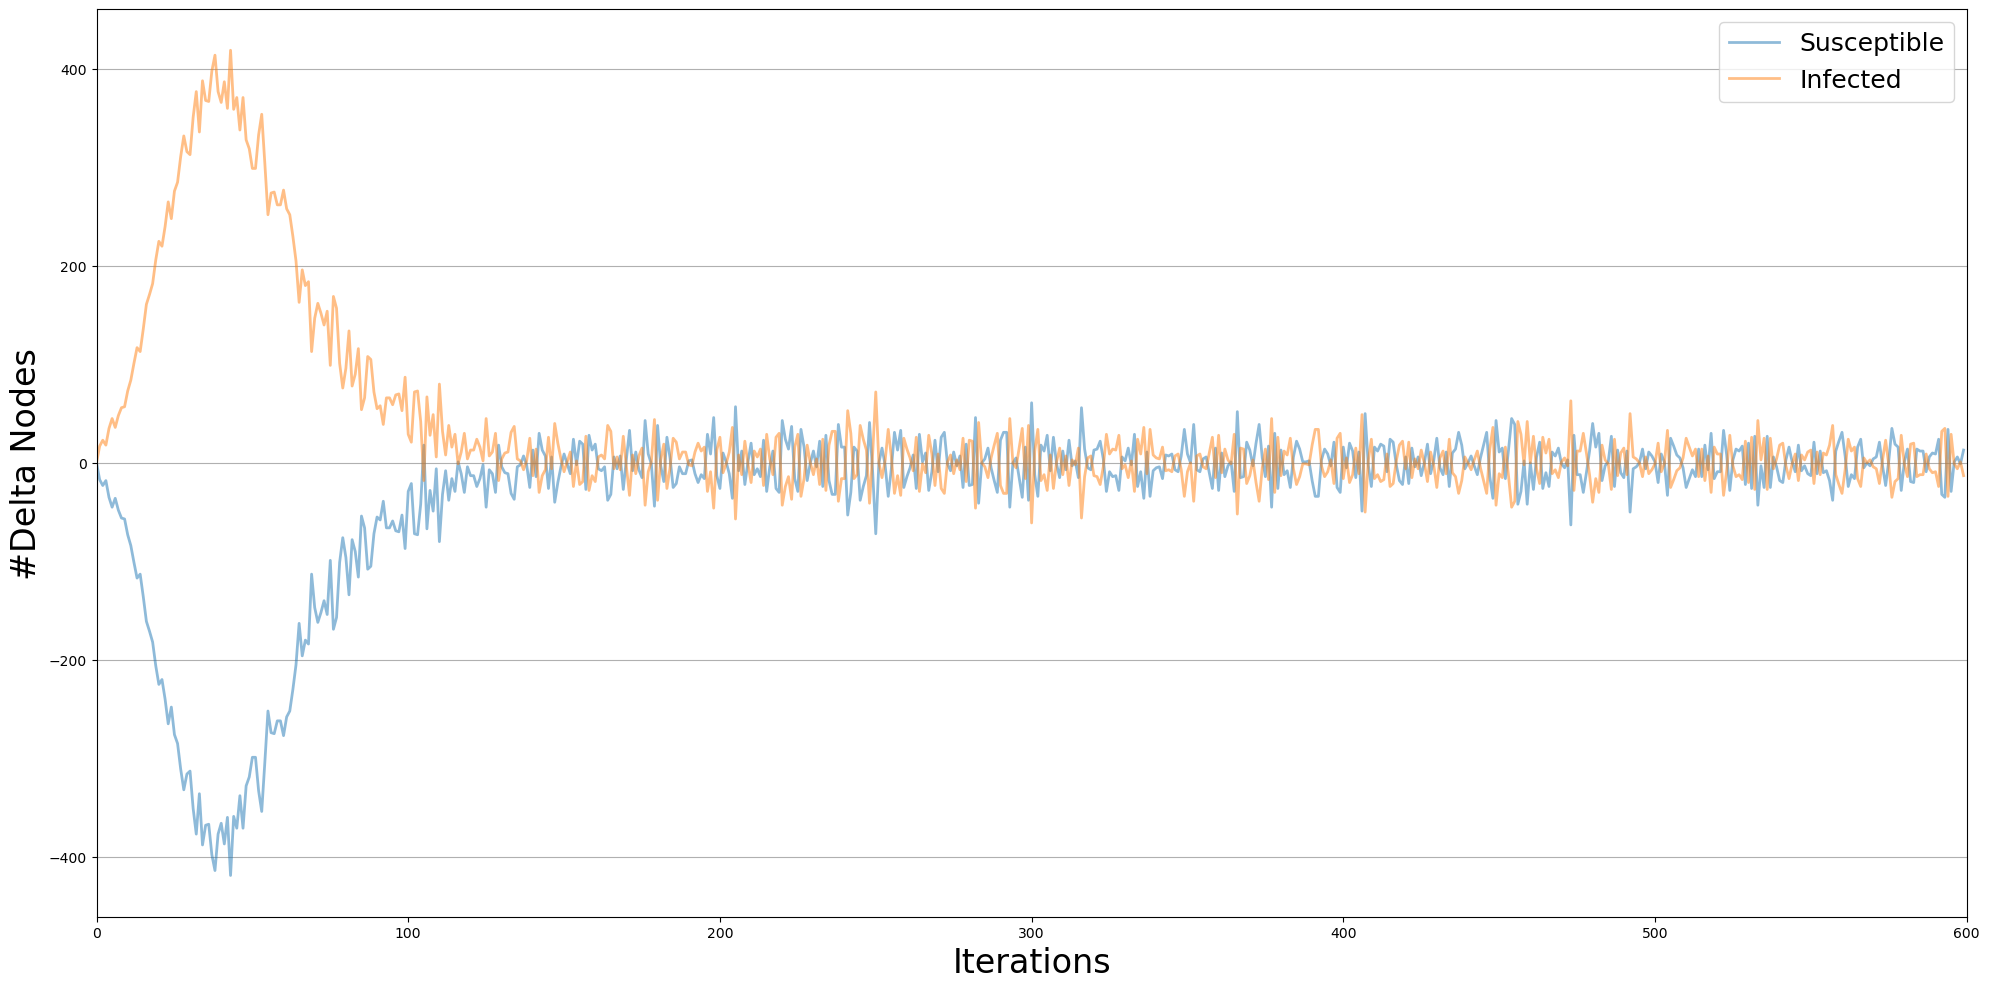

In [101]:
viz = DiffusionPrevalence(model_sis_e_ba, trends_sis_e_ba)
viz.plot()

### WS model

In [102]:
model_sis_e_ws = ep.SISModel(ws)
model_sis_e_ws.set_initial_status(cfg)
iterations = model_sis_e_ws.iteration_bunch(600, node_status=True)
trends_sis_e_ws = model_sis_e_ws.build_trends(iterations)

100%|████████████████████████████████████████████████████████████████████████████████| 600/600 [01:42<00:00,  5.83it/s]


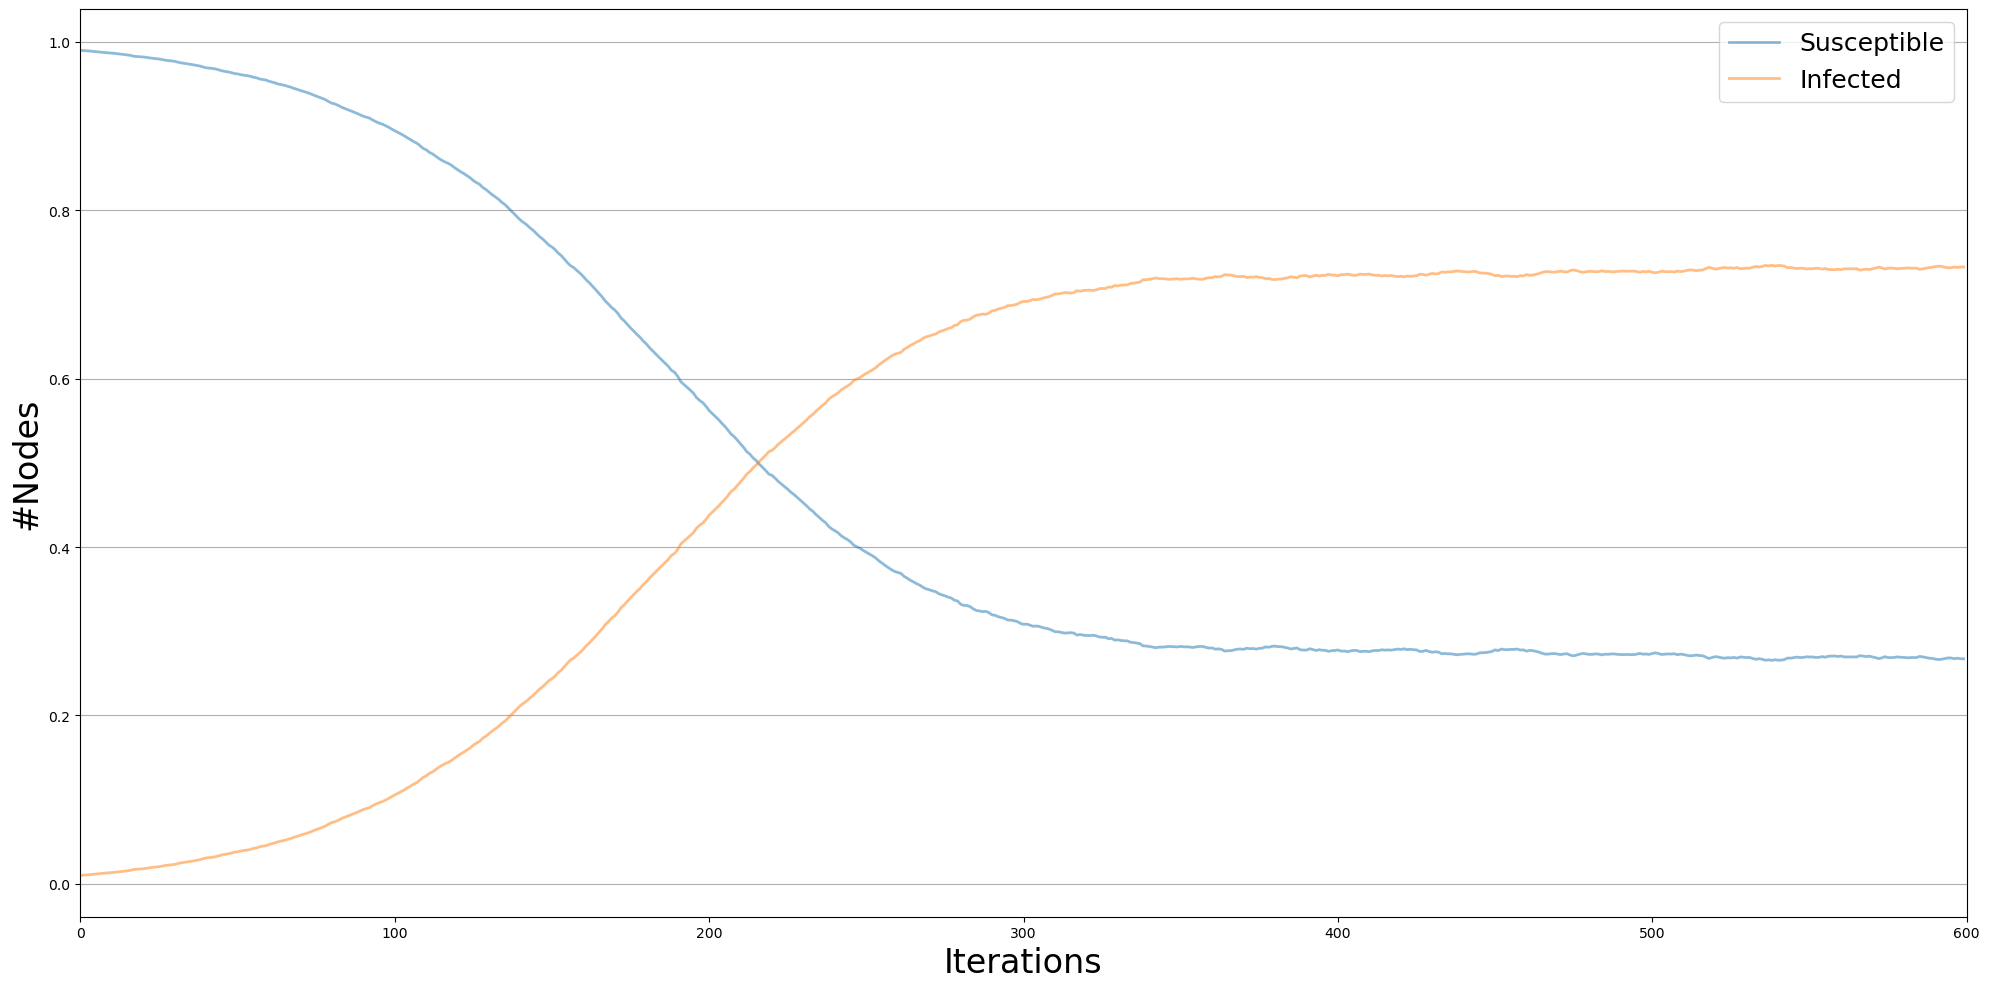

In [103]:
viz = DiffusionTrend(model_sis_e_ws, trends_sis_e_ws)
viz.plot()

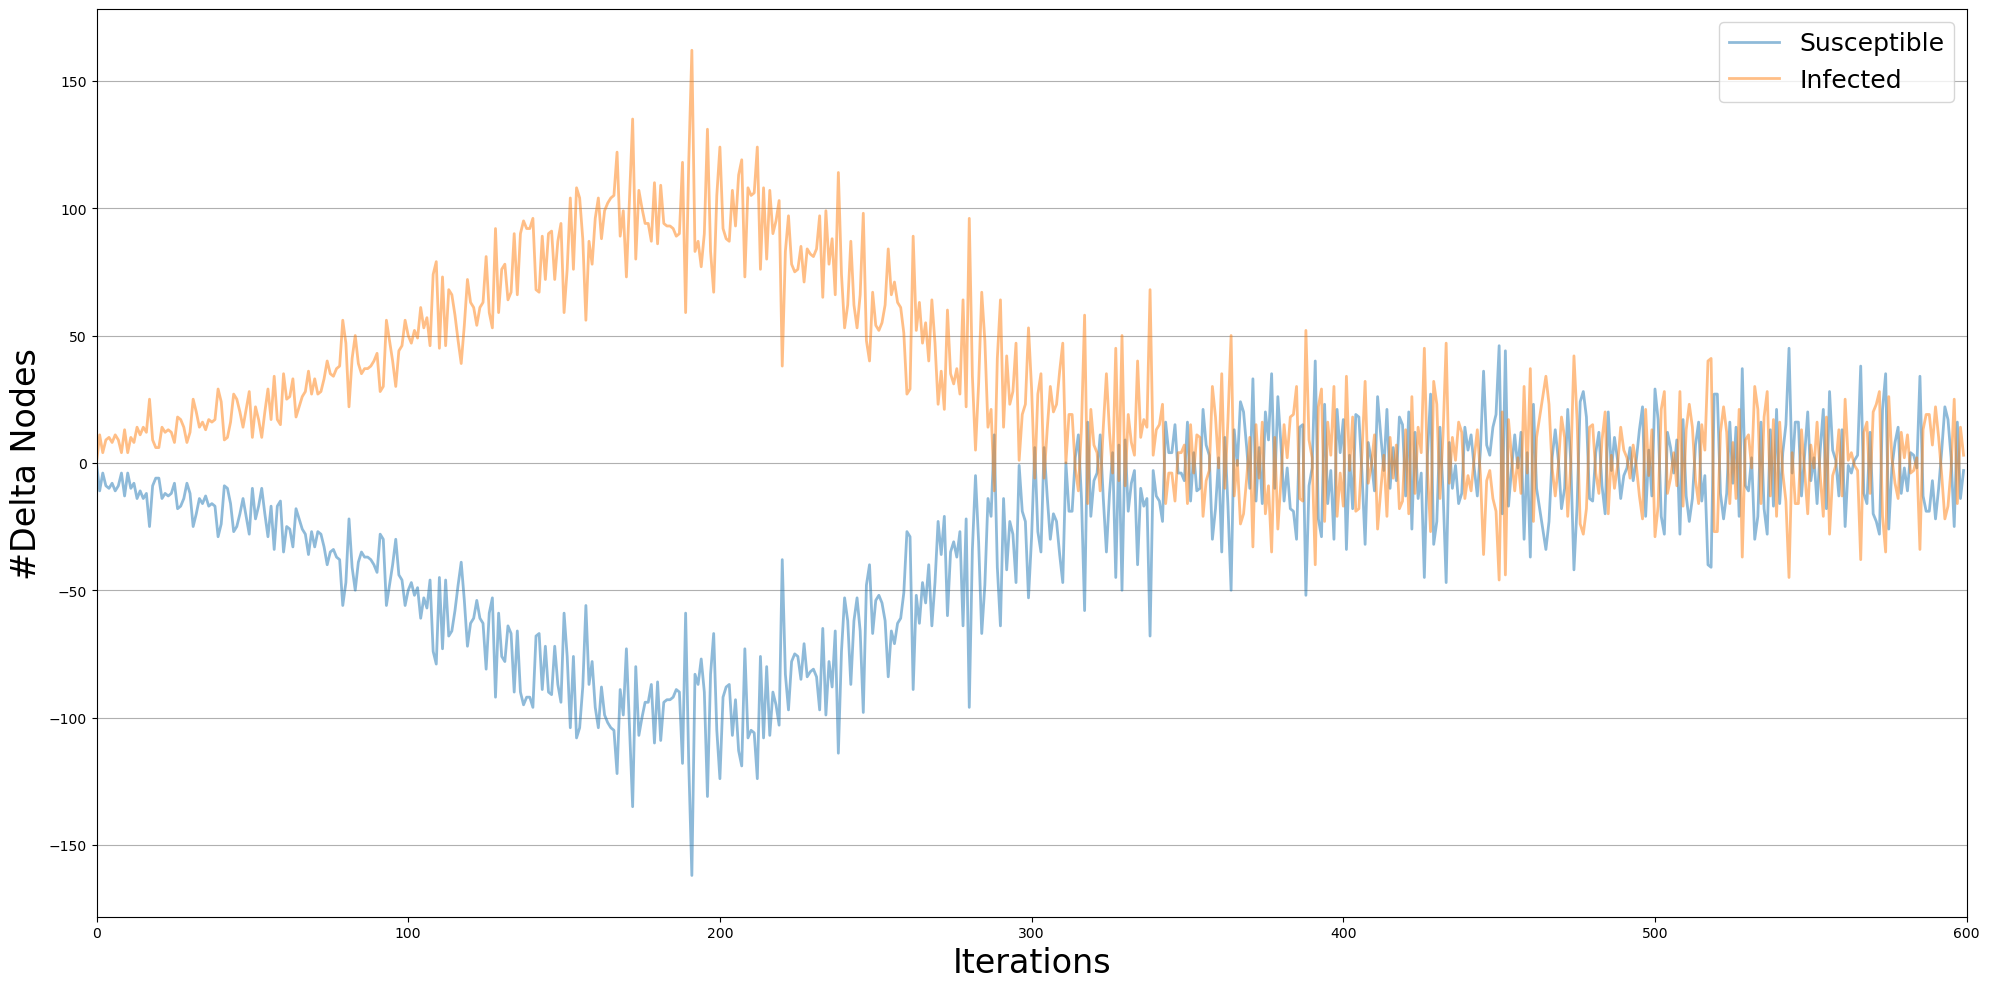

In [104]:
viz = DiffusionPrevalence(model_sis_e_ws, trends_sis_e_ws)
viz.plot()

Comparing all of them:

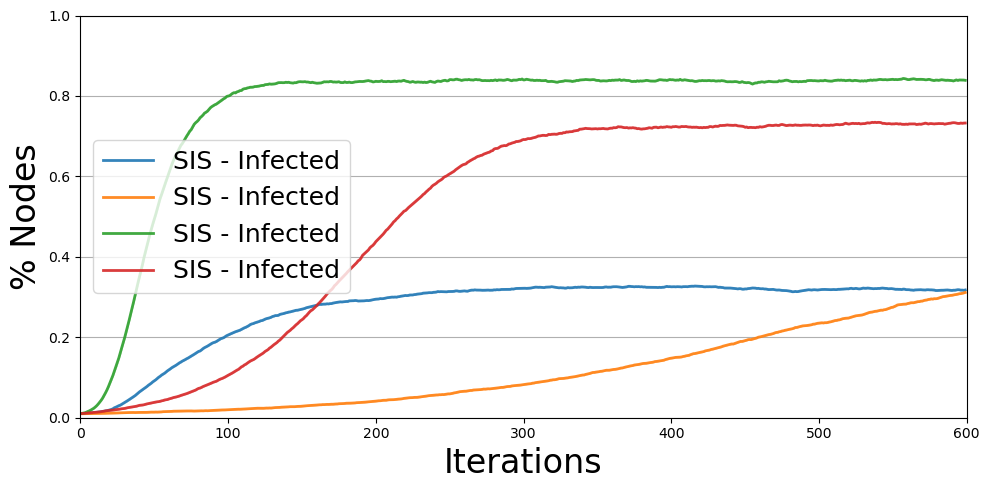

In [105]:
plt.rcParams.update({'figure.figsize':(10,5), 'figure.dpi':100})
viz = DiffusionTrendComparison([model_sis_e, model_sis_e_er, model_sis_e_ba, model_sis_e_ws], [trends_sis_e, trends_sis_e_er, trends_sis_e_ba, trends_sis_e_ws], statuses=['Infected'])
viz.plot()

Finally, a situation where a "disease-free" condition is reached. The condition to achieve this is having μ > β〈k〉.

The following parameters have been chosen:
+ % of infected: 70%
+ infection rate: 0.001
+ recovery rate: 0.05

In [111]:
cfg = mc.Configuration()
cfg.add_model_parameter('beta', 0.001) # infection rate
cfg.add_model_parameter('lambda', 0.05) # recovery rate
cfg.add_model_parameter("percentage_infected", 0.7)

In [112]:
model_sis_h = ep.SISModel(g)
model_sis_h.set_initial_status(cfg)
iterations = model_sis_h.iteration_bunch(100, node_status=True)
trends_sis_h = model_sis_h.build_trends(iterations)

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:25<00:00,  3.90it/s]


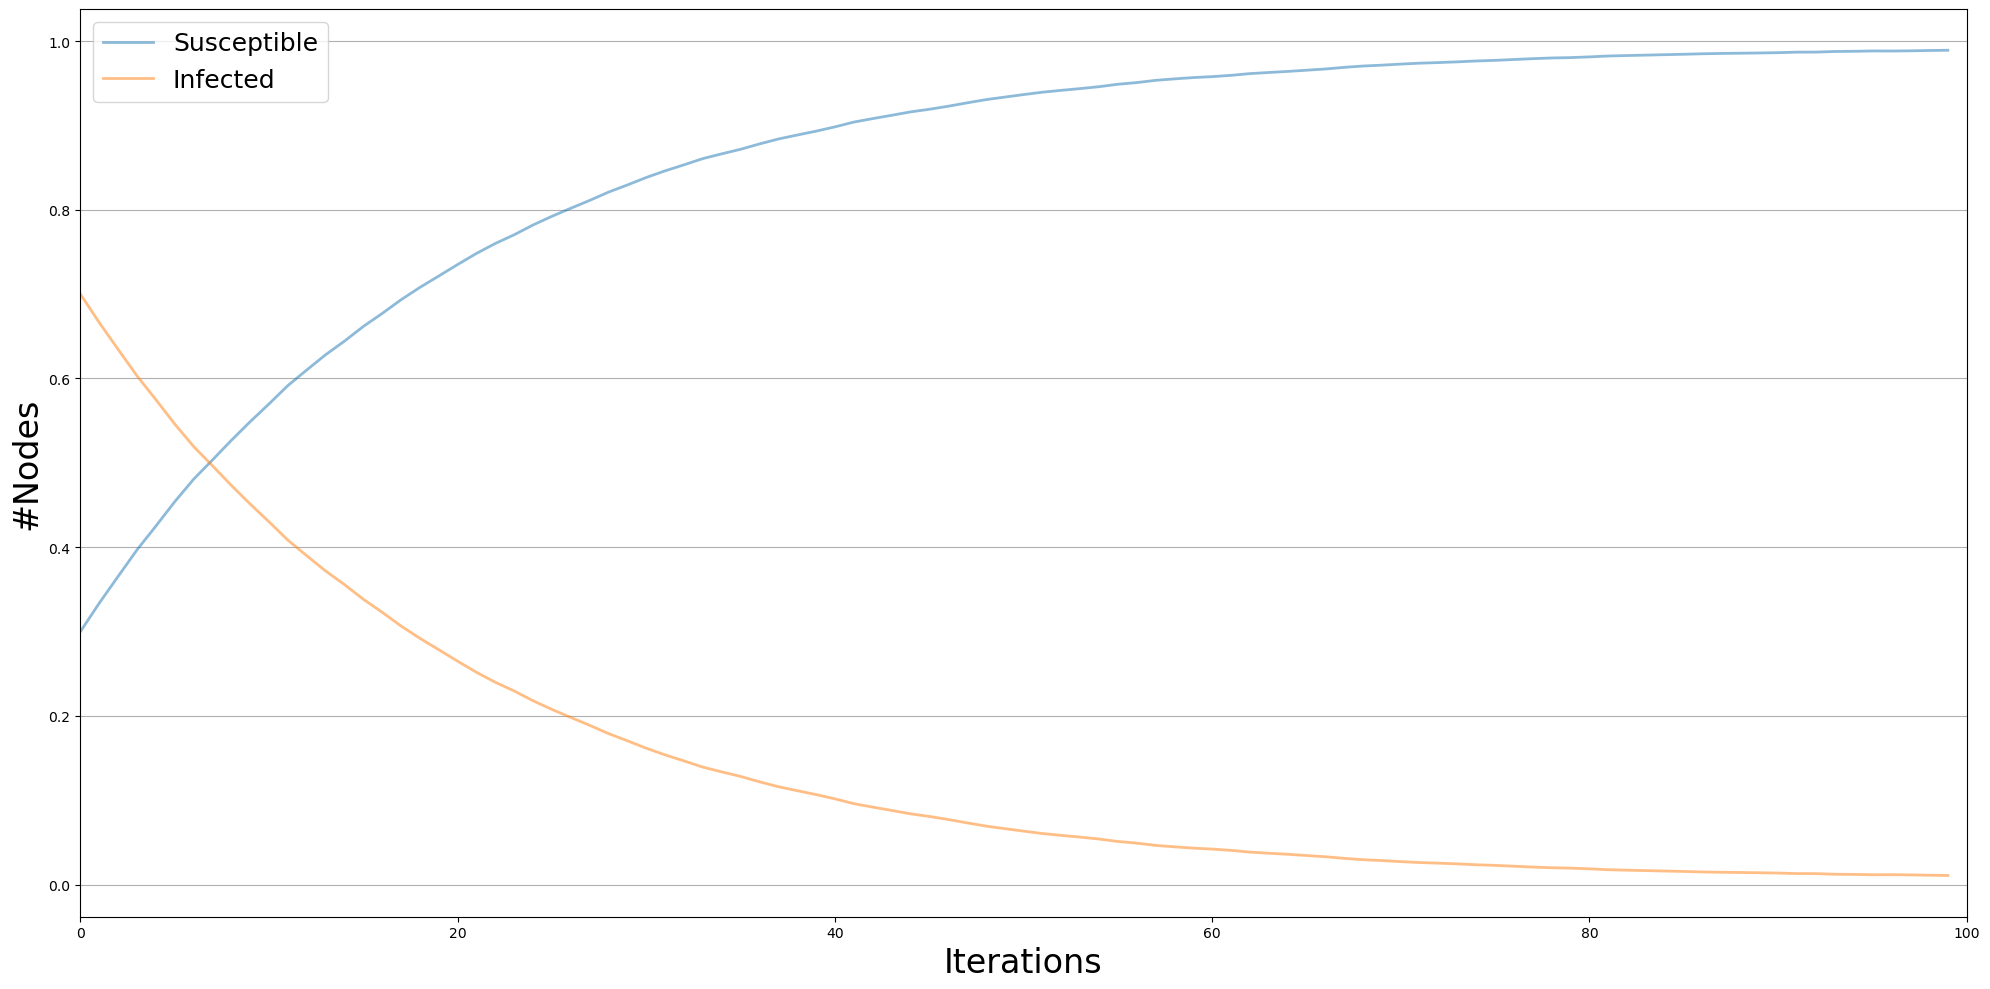

In [113]:
viz = DiffusionTrend(model_sis_h, trends_sis_h)
viz.plot()

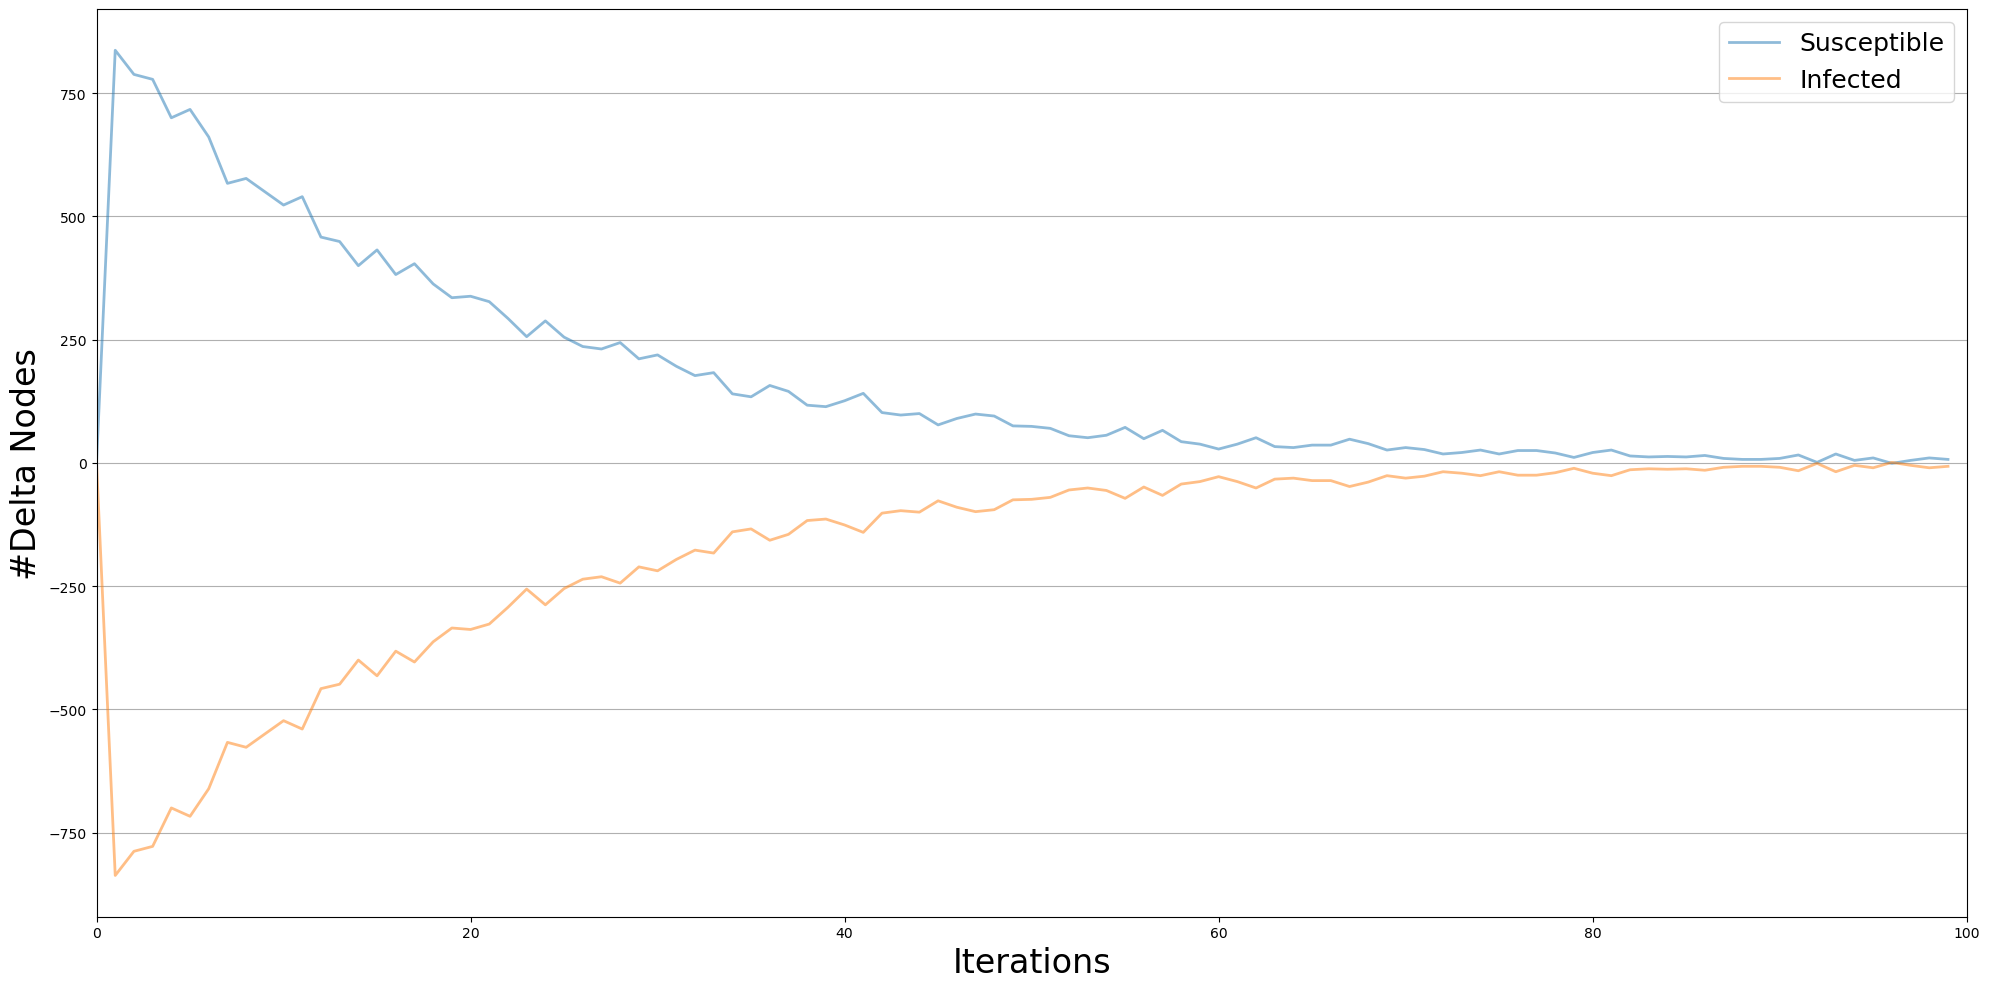

In [114]:
viz = DiffusionPrevalence(model_sis_h, trends_sis_h)
viz.plot()

### ER model

In [115]:
model_sis_h_er = ep.SISModel(er)
model_sis_h_er.set_initial_status(cfg)
iterations = model_sis_h_er.iteration_bunch(100, node_status=True)
trends_sis_h_er = model_sis_h_er.build_trends(iterations)

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:21<00:00,  4.62it/s]


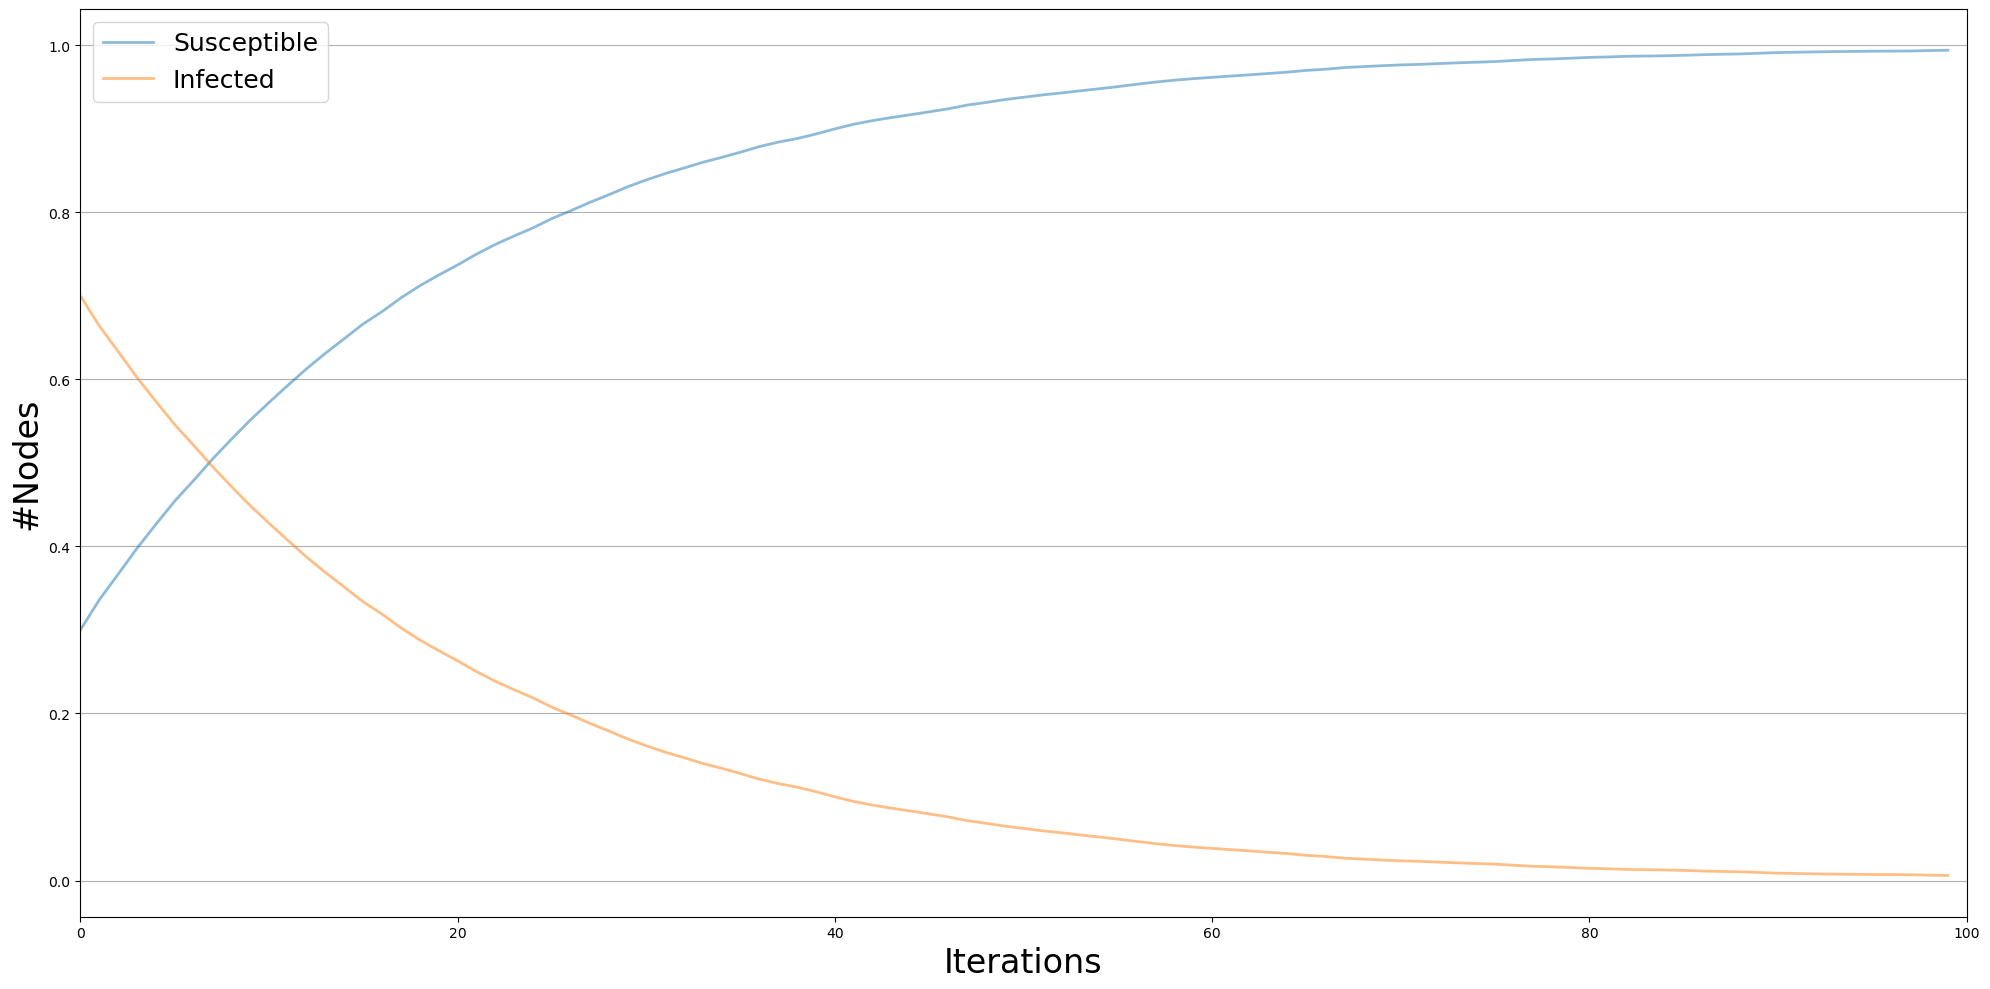

In [116]:
viz = DiffusionTrend(model_sis_h_er, trends_sis_h_er)
viz.plot()

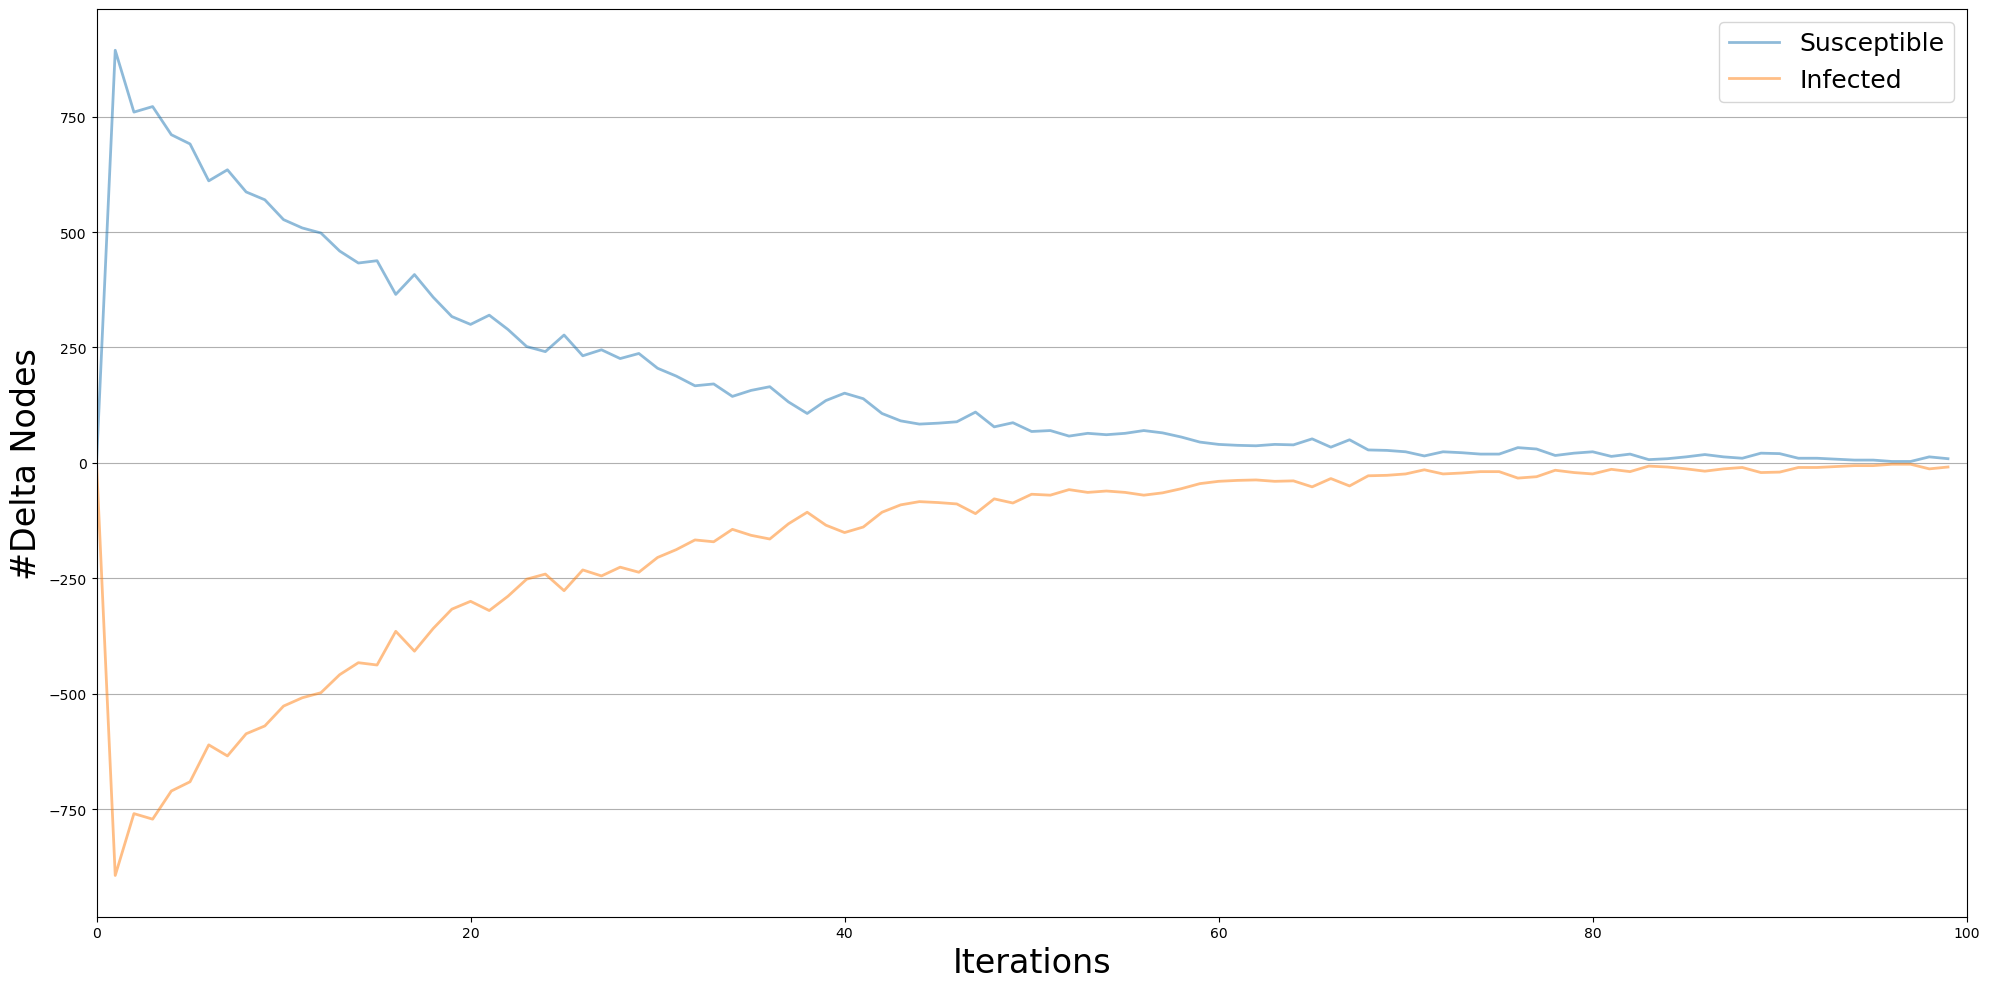

In [117]:
viz = DiffusionPrevalence(model_sis_h_er, trends_sis_h_er)
viz.plot()

### BA model

In [118]:
model_sis_h_ba = ep.SISModel(ba)
model_sis_h_ba.set_initial_status(cfg)
iterations = model_sis_h_ba.iteration_bunch(100, node_status=True)
trends_sis_h_ba = model_sis_h_ba.build_trends(iterations)

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:22<00:00,  4.47it/s]


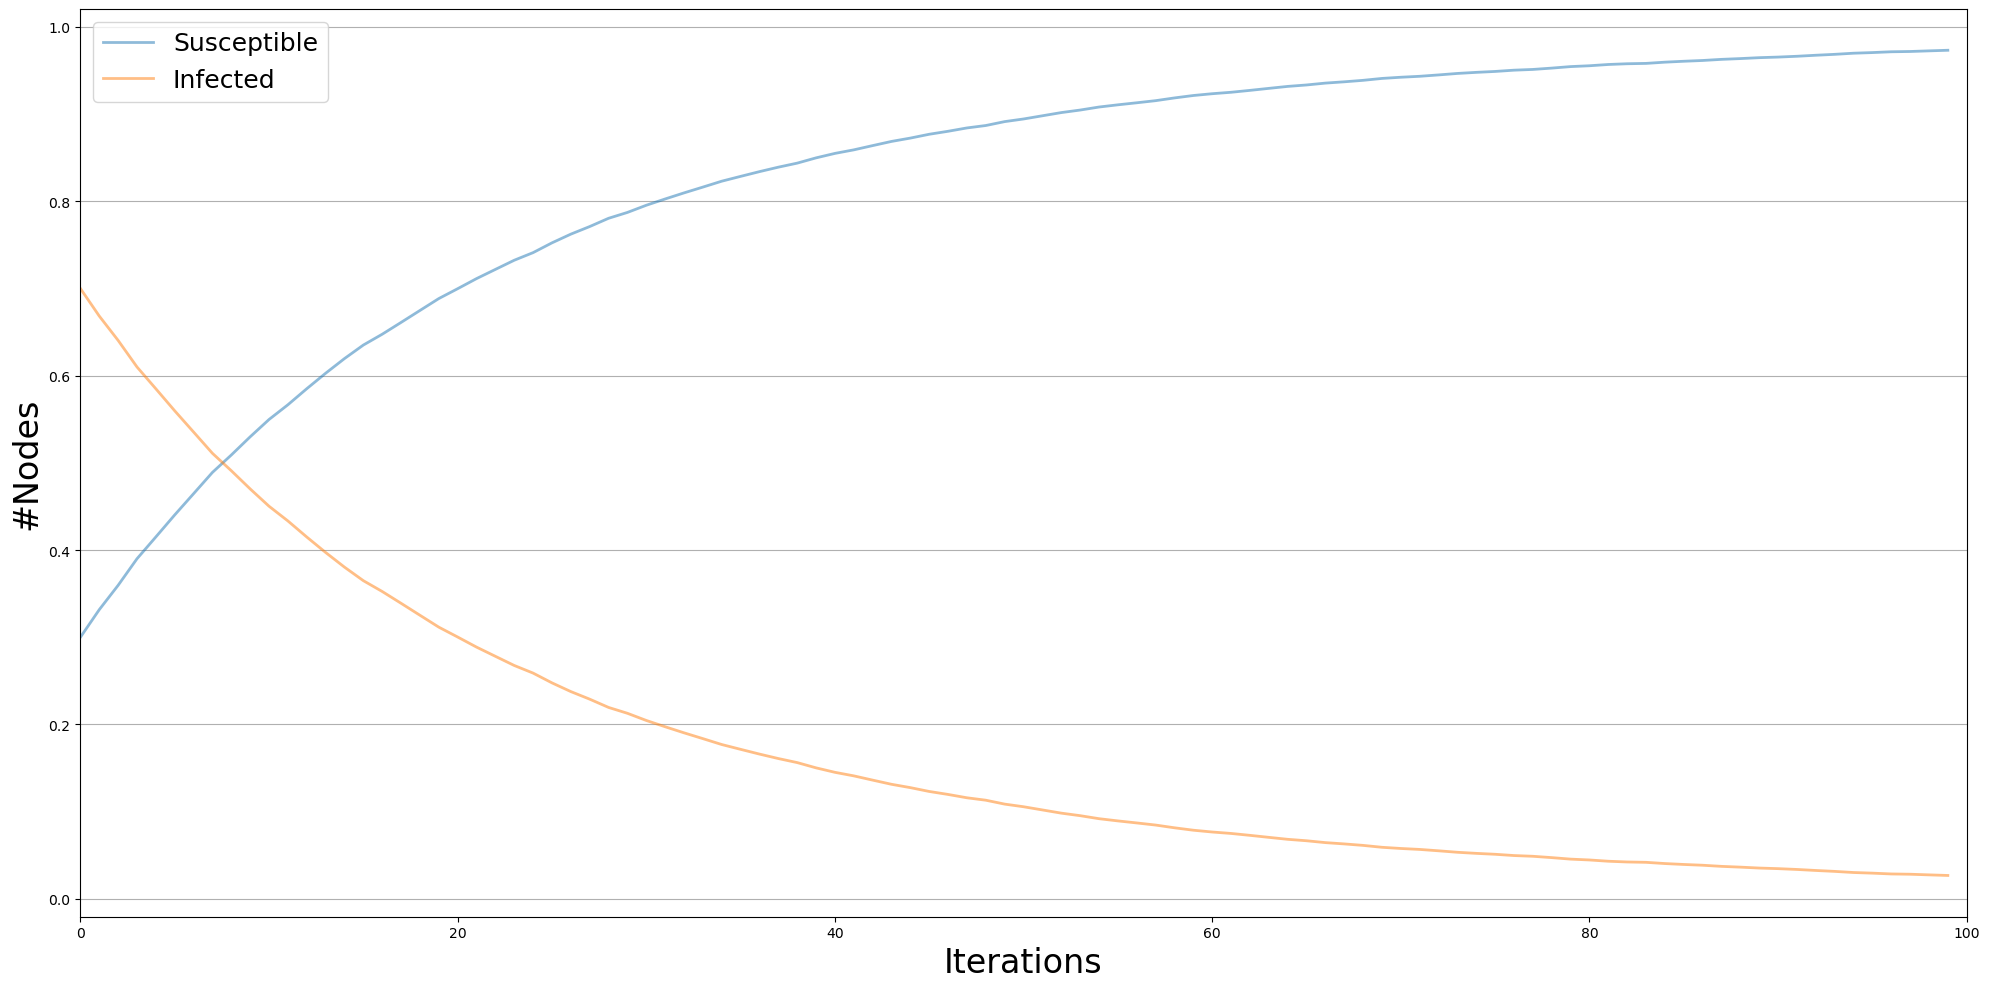

In [119]:
viz = DiffusionTrend(model_sis_h_ba, trends_sis_h_ba)
viz.plot()

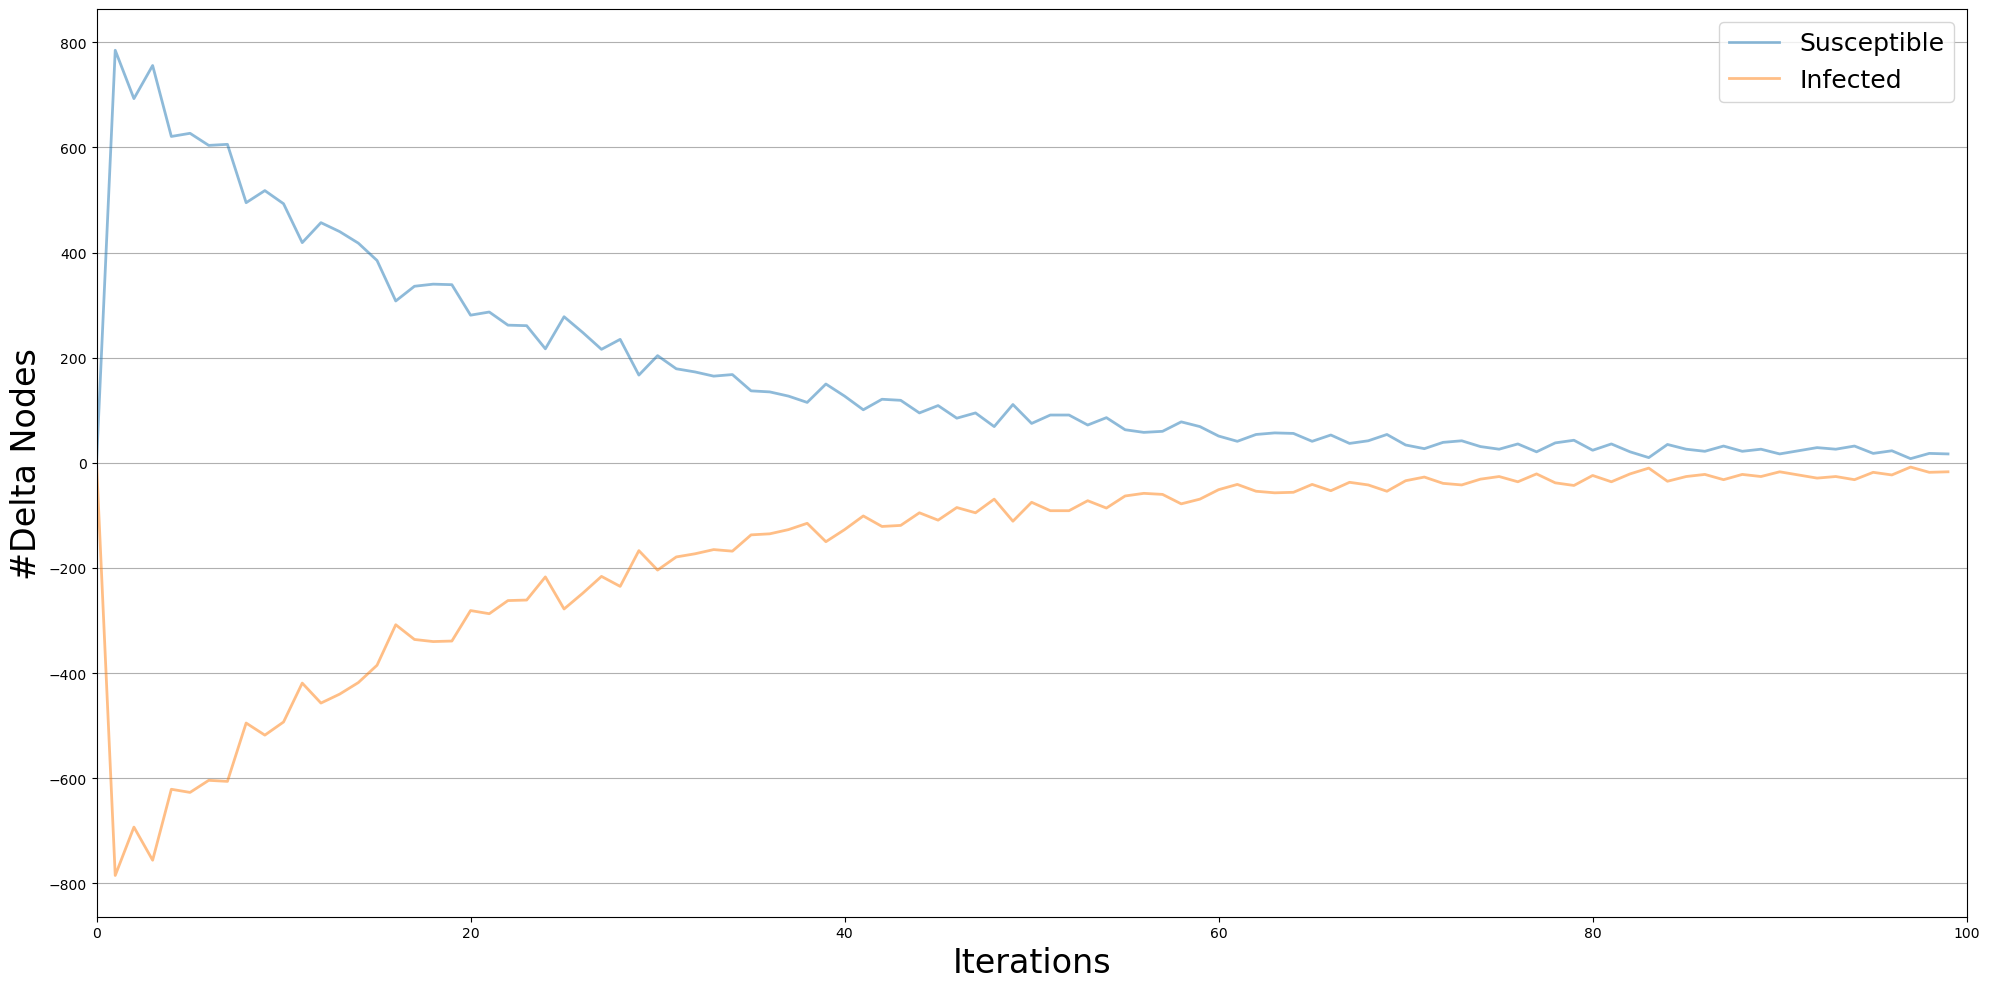

In [120]:
viz = DiffusionPrevalence(model_sis_h_ba, trends_sis_h_ba)
viz.plot()

### WS model

In [121]:
model_sis_h_ws = ep.SISModel(ws)
model_sis_h_ws.set_initial_status(cfg)
iterations = model_sis_h_ws.iteration_bunch(100, node_status=True)
trends_sis_h_ws = model_sis_h_ws.build_trends(iterations)

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:18<00:00,  5.55it/s]


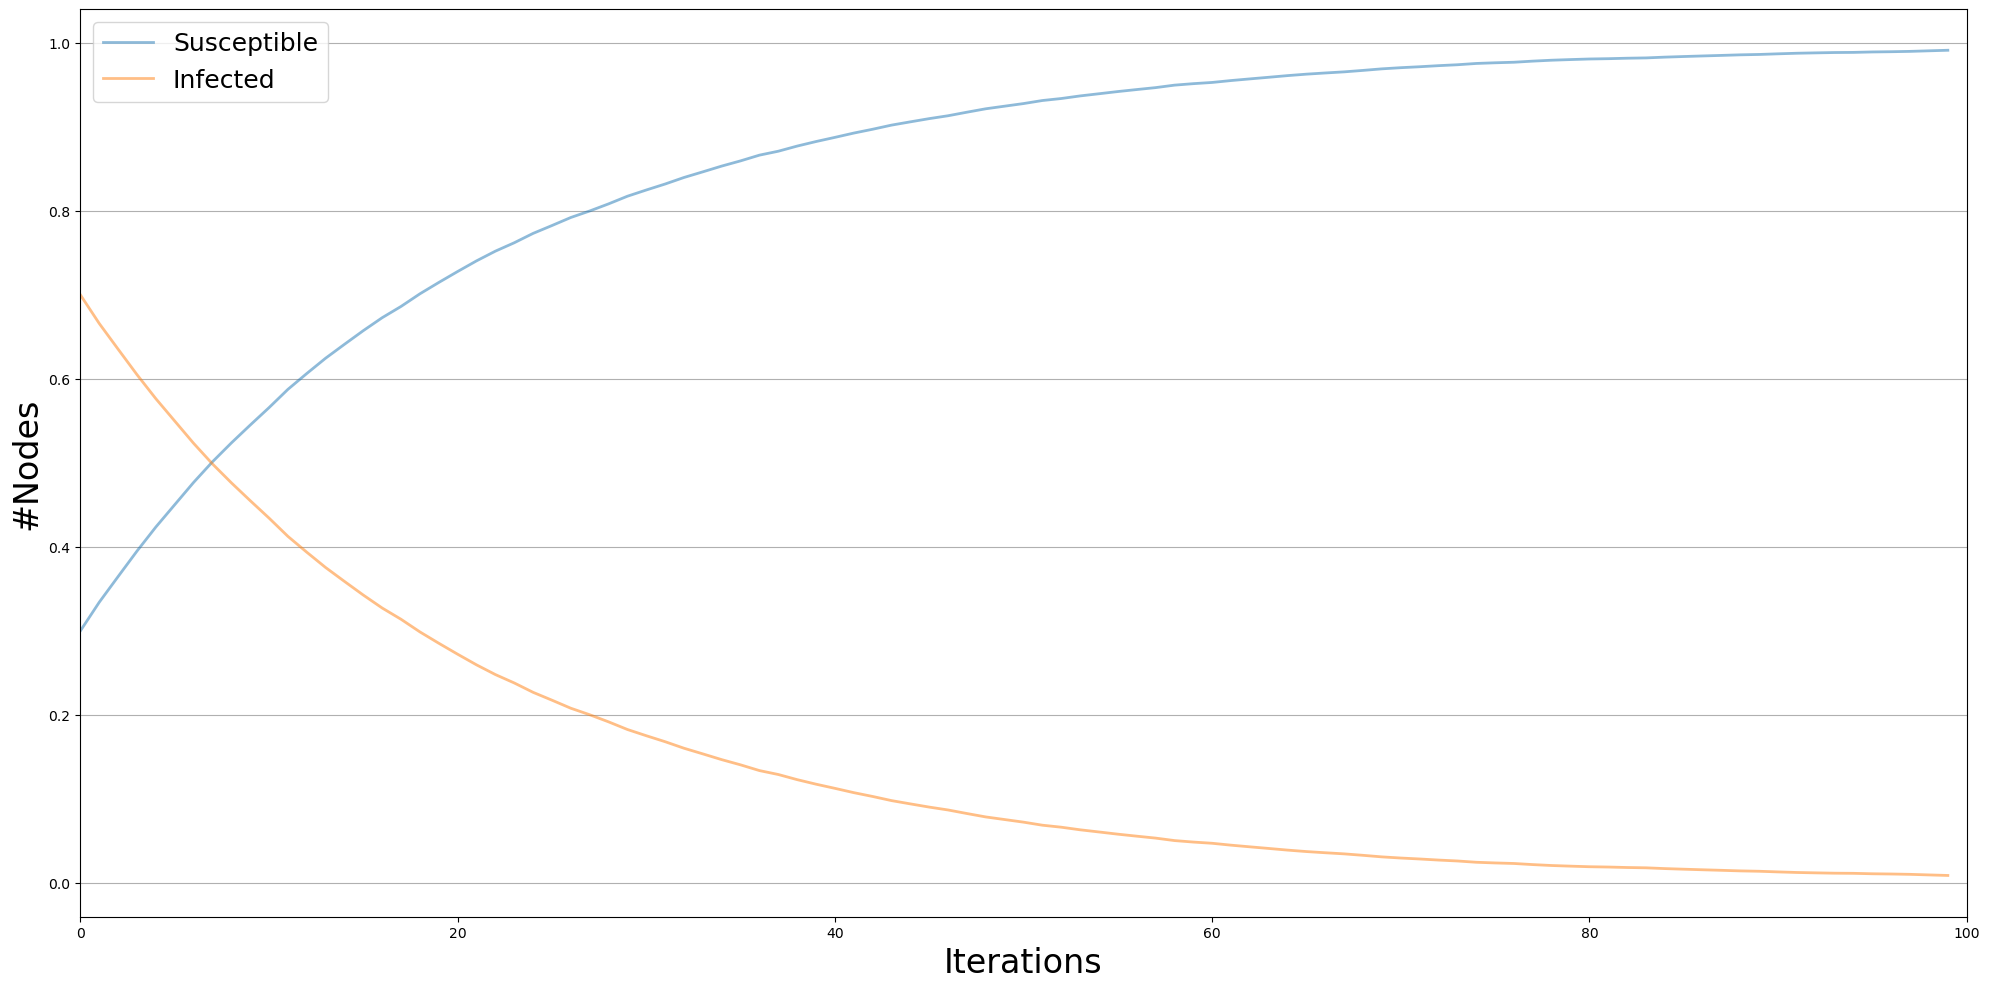

In [122]:
viz = DiffusionTrend(model_sis_h_ws, trends_sis_h_ws)
viz.plot()

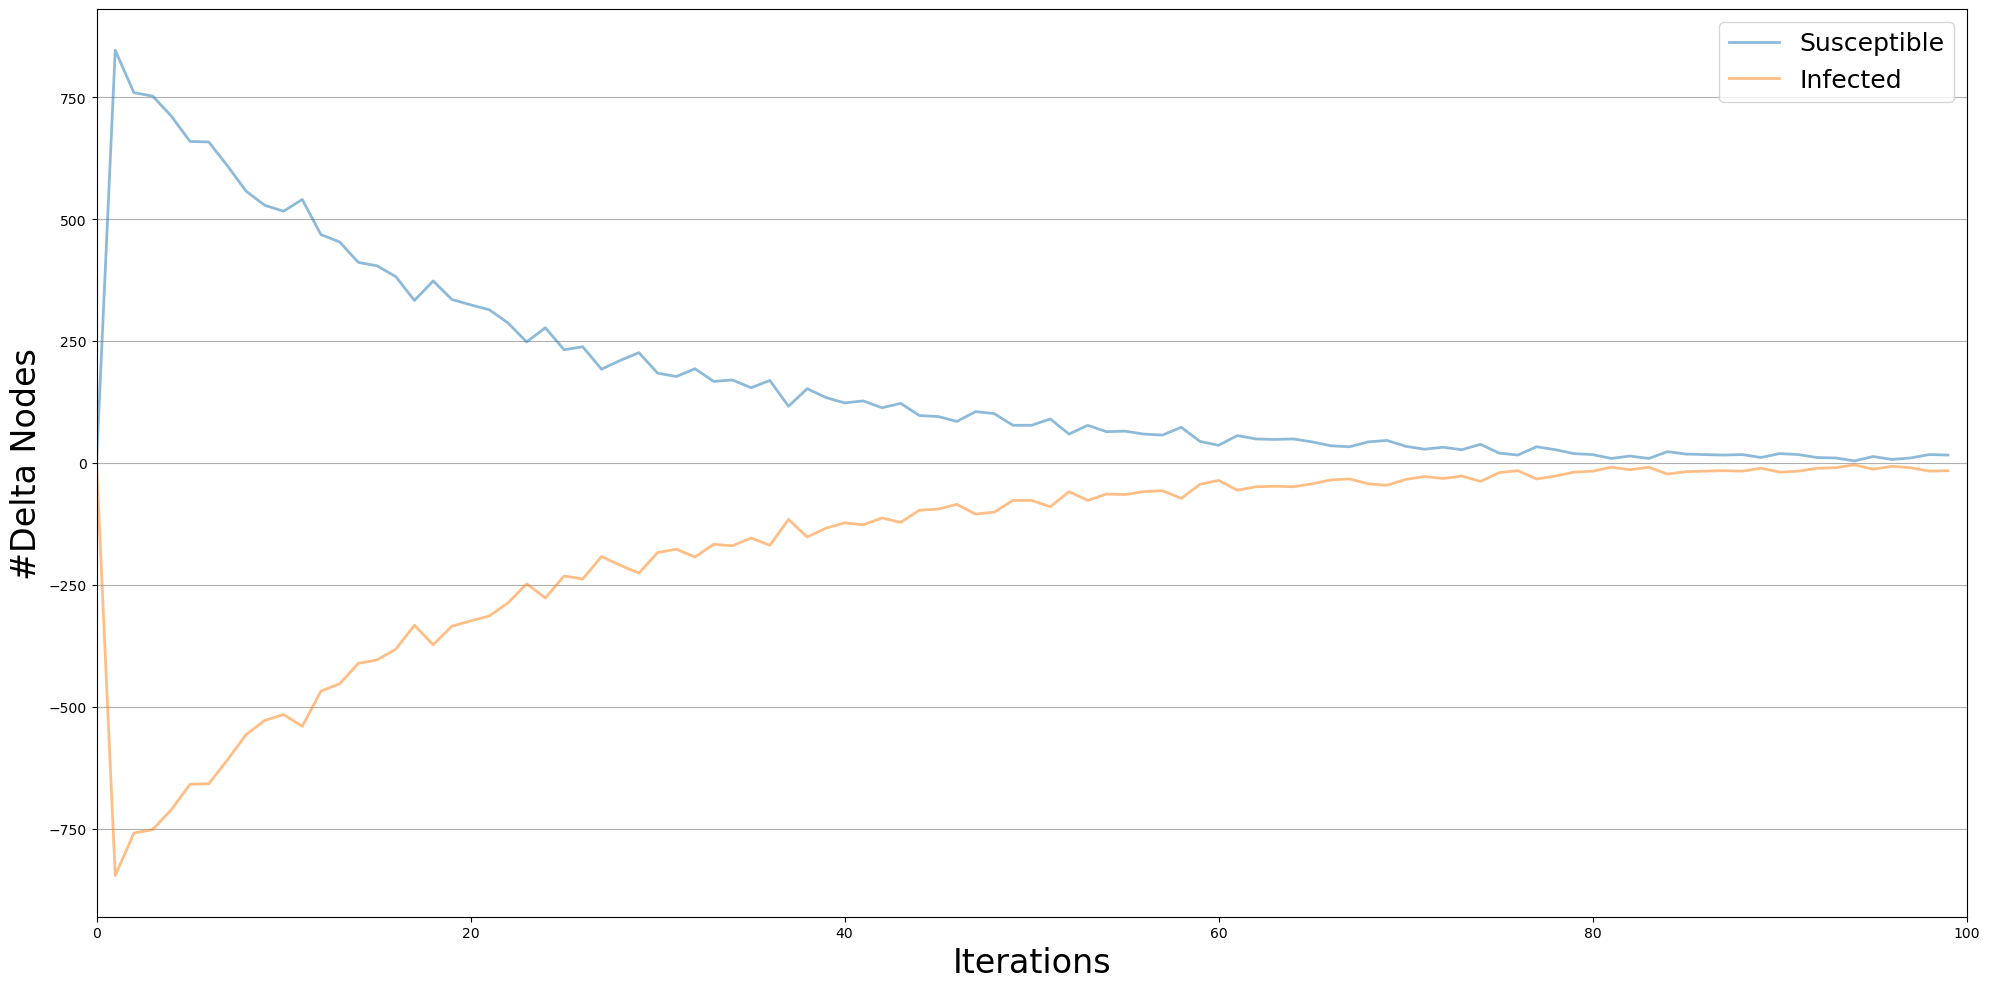

In [123]:
viz = DiffusionPrevalence(model_sis_h_ws, trends_sis_h_ws)
viz.plot()

Comparing them:

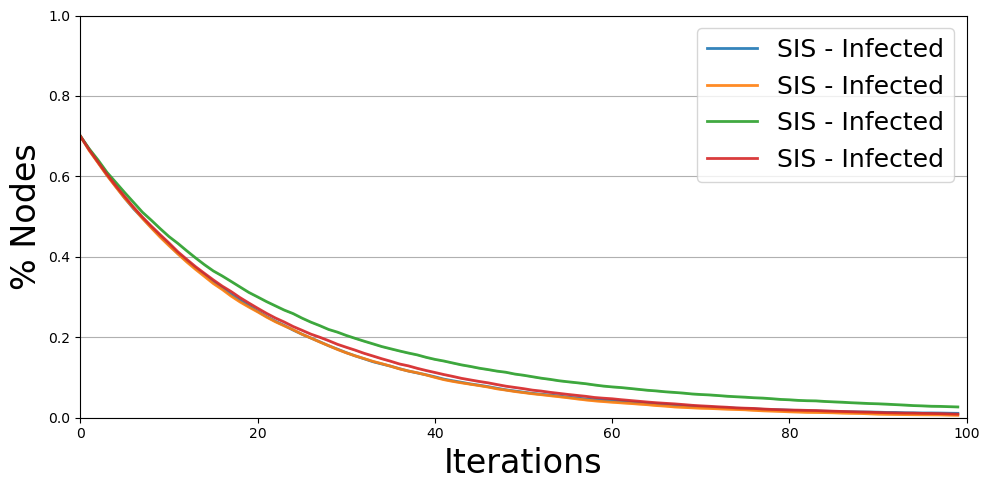

In [124]:
plt.rcParams.update({'figure.figsize':(10,5), 'figure.dpi':100})
viz = DiffusionTrendComparison([model_sis_h, model_sis_h_er, model_sis_h_ba, model_sis_h_ws], [trends_sis_h, trends_sis_h_er, trends_sis_h_ba, trends_sis_h_ws], statuses=['Infected'])
viz.plot()

(the blue line (our network) is below the yellow one (er), it can be seen in some spots)

## SIR: Susceptible-Infected-Recovered

First, a simulation where ƛ > 1 (i.e. over the epidemic threshold):
+ % of infected: 0.01
+ infection rate: 0.01
+ recovery rate: 0.005

### Our graph

In [125]:
model_sir_e = ep.SIRModel(g)

In [126]:
model_sir_e.available_statuses

{'Susceptible': 0, 'Infected': 1, 'Removed': 2}

In [127]:
cfg = mc.Configuration()
cfg.add_model_parameter('beta', 0.01) # infection rate
cfg.add_model_parameter('gamma', 0.005) # recovery rate
cfg.add_model_parameter("percentage_infected", 0.01)
model_sir_e.set_initial_status(cfg)

In [128]:
iterations = model_sir_e.iteration_bunch(1000, node_status=True)
trends_sir_e = model_sir_e.build_trends(iterations)

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:24<00:00, 11.78it/s]


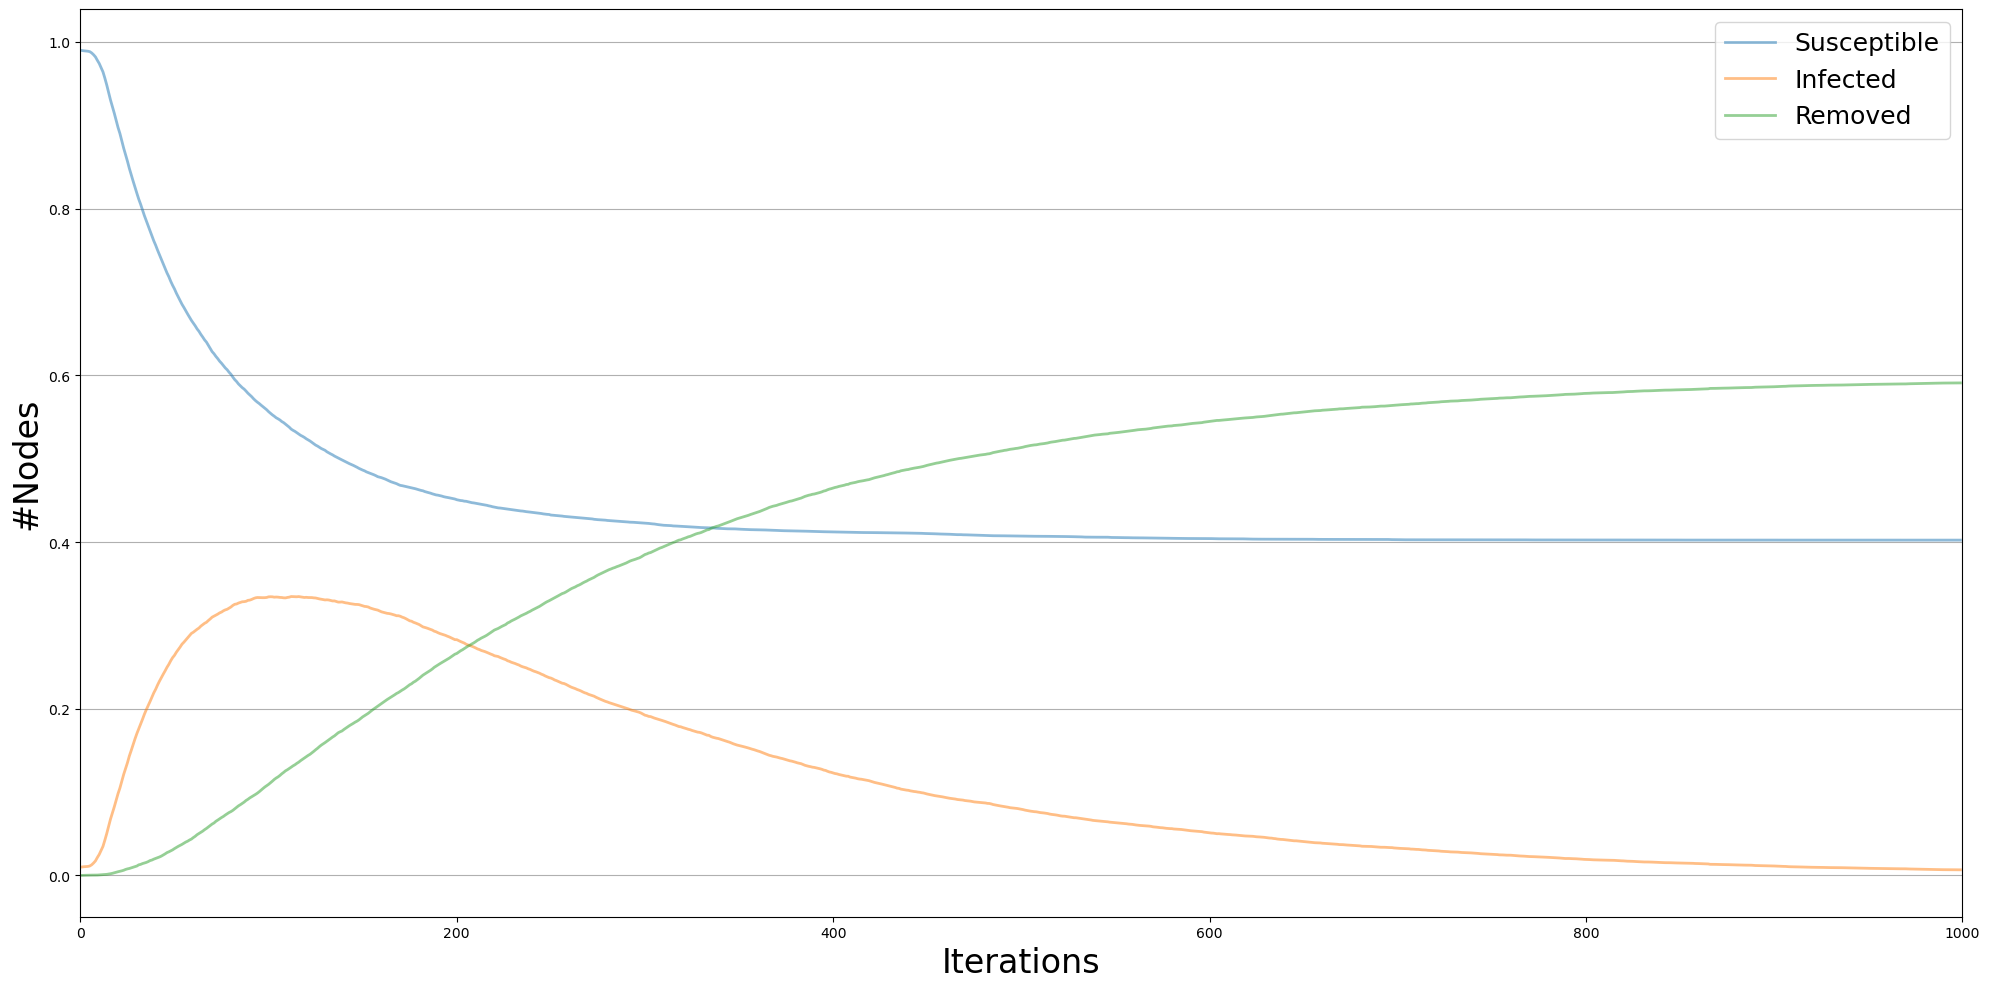

In [129]:
viz = DiffusionTrend(model_sir_e, trends_sir_e)
viz.plot()

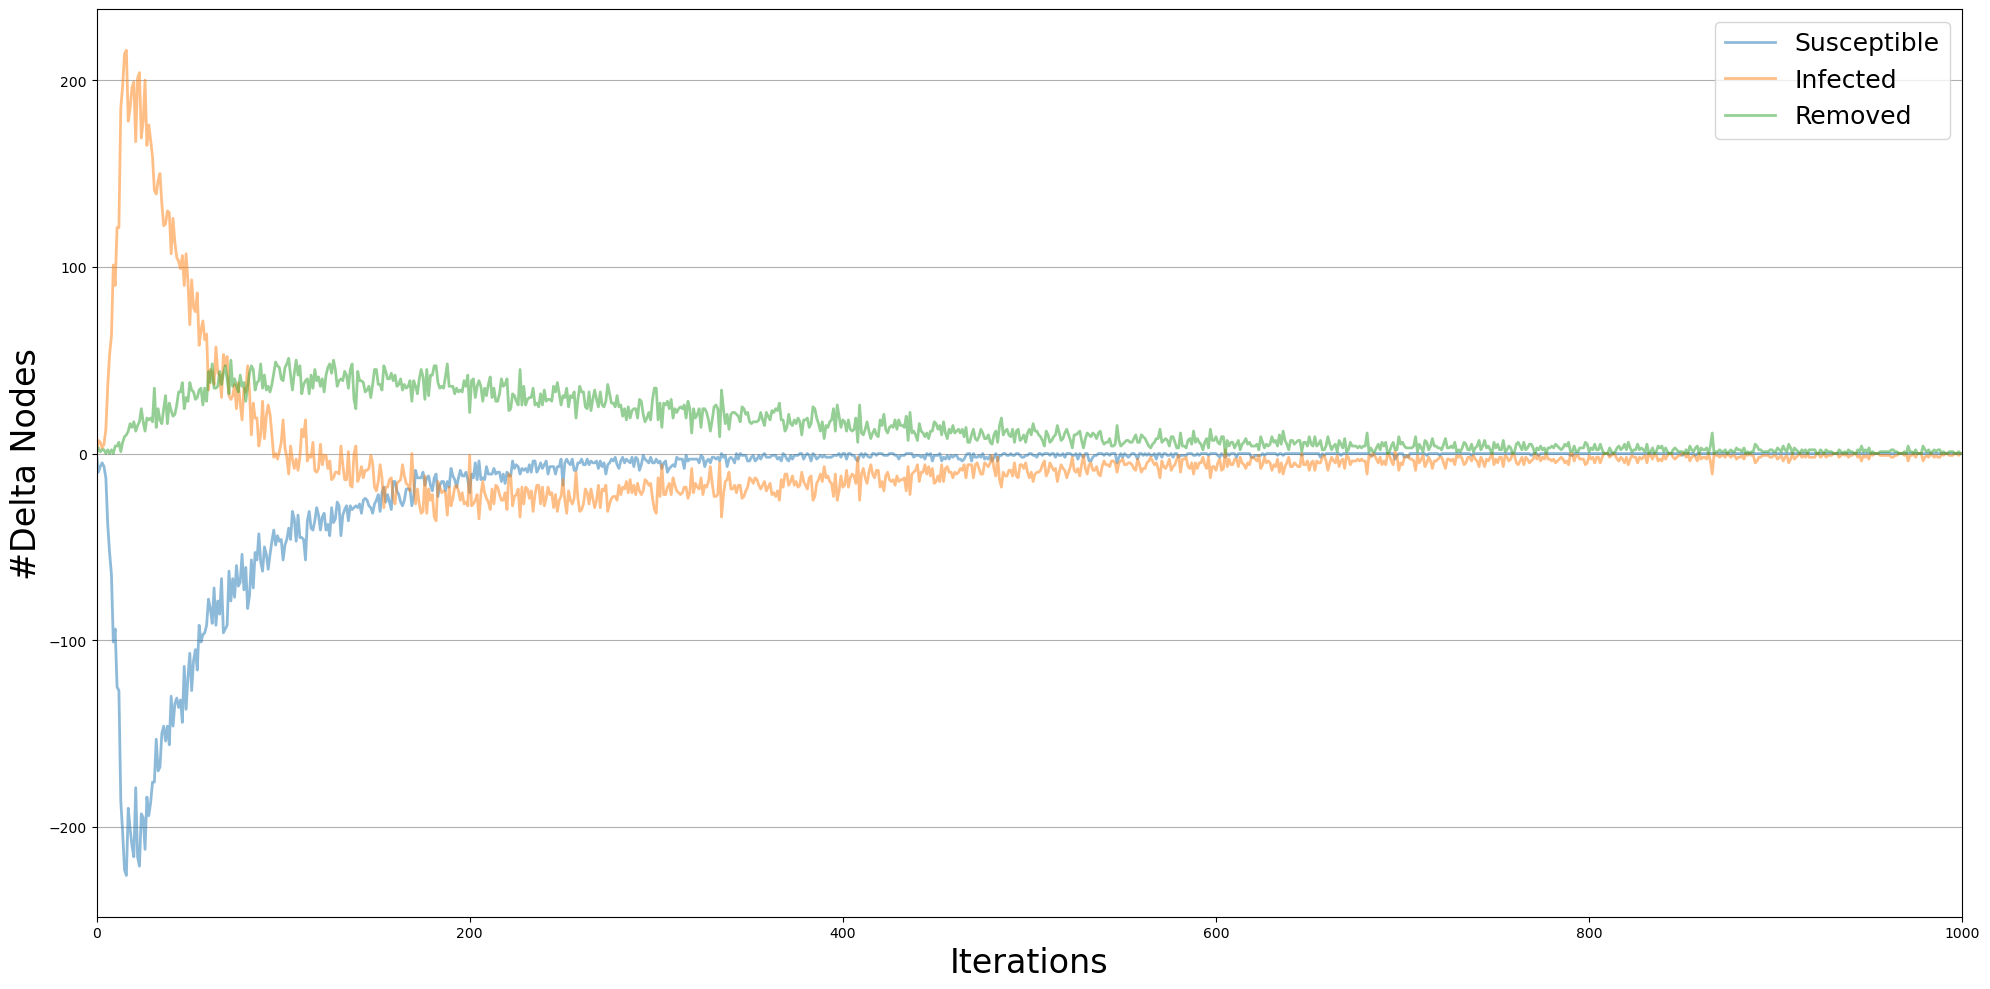

In [130]:
viz = DiffusionPrevalence(model_sir_e, trends_sir_e)
viz.plot()

### ER model

In [131]:
model_sir_e_er = ep.SIRModel(er)
model_sir_e_er.set_initial_status(cfg)

In [132]:
iterations = model_sir_e_er.iteration_bunch(1000, node_status=True)
trends_sir_e_er = model_sir_e_er.build_trends(iterations)

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:18<00:00, 12.78it/s]


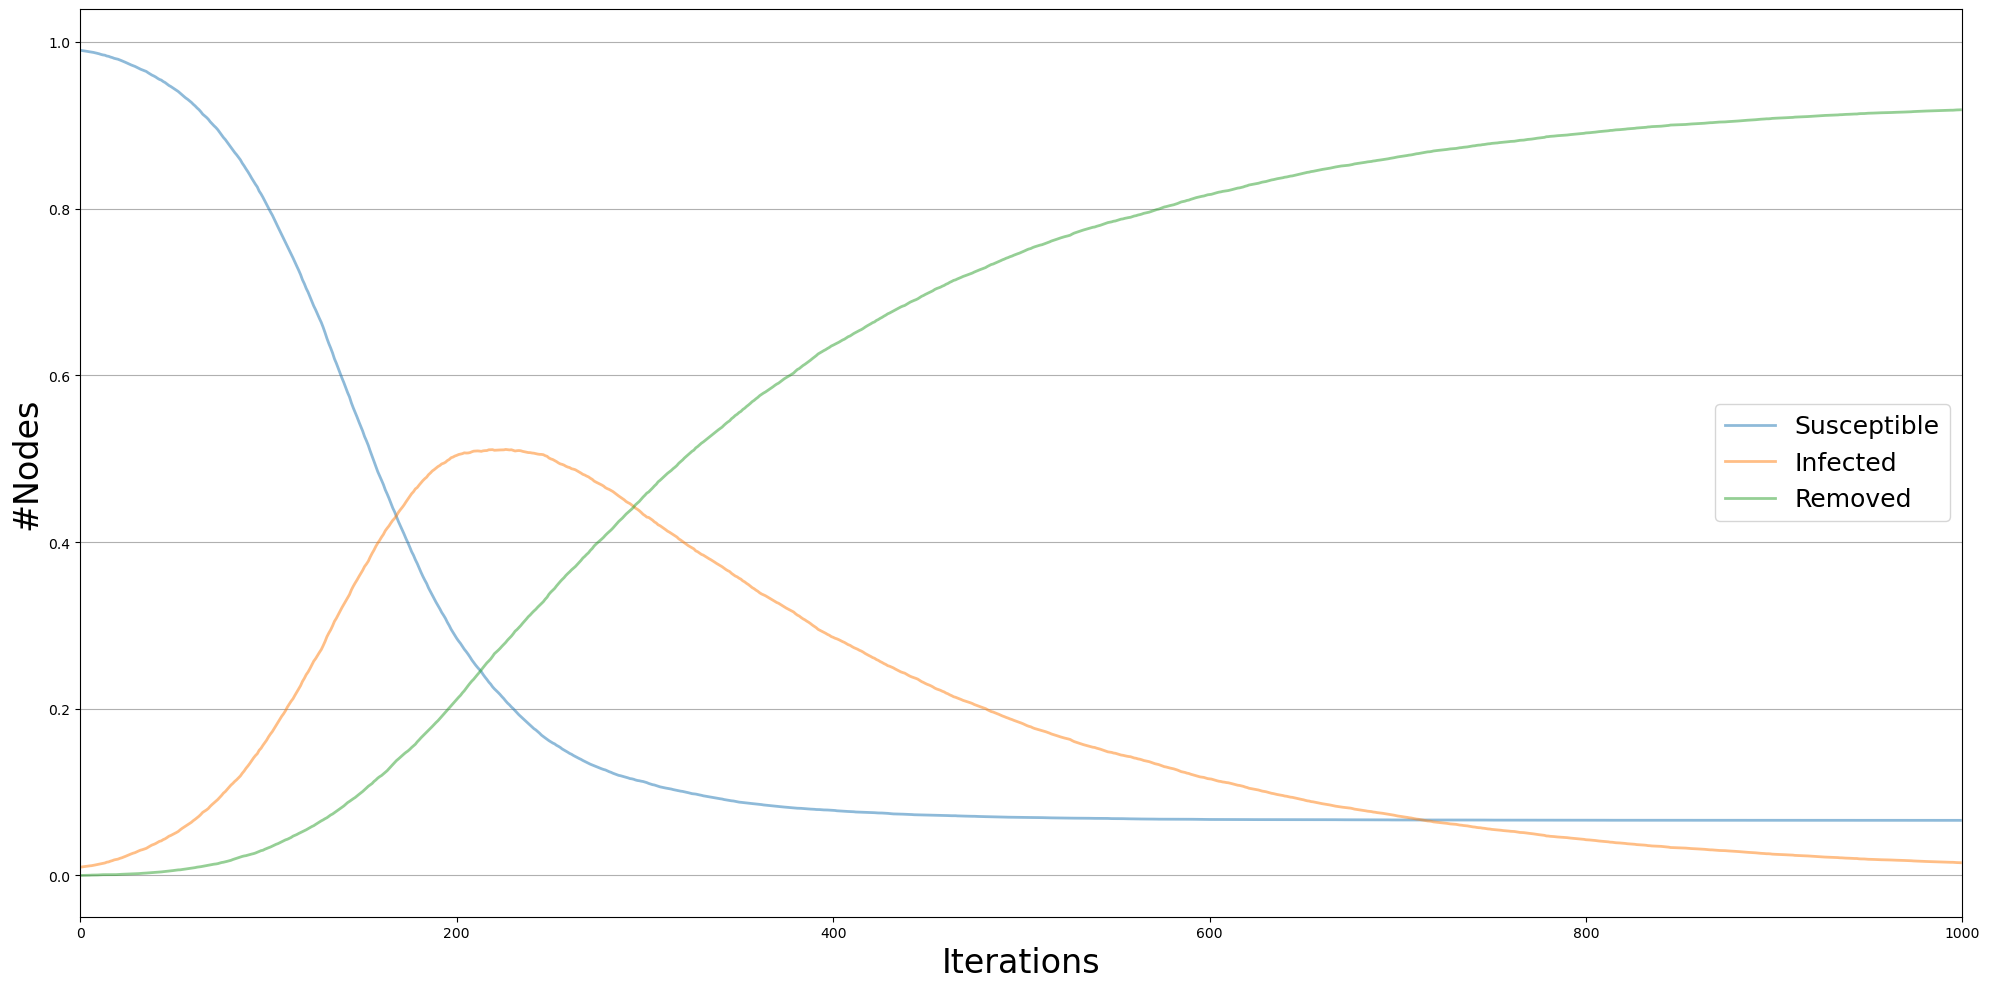

In [133]:
viz = DiffusionTrend(model_sir_e_er, trends_sir_e_er)
viz.plot()

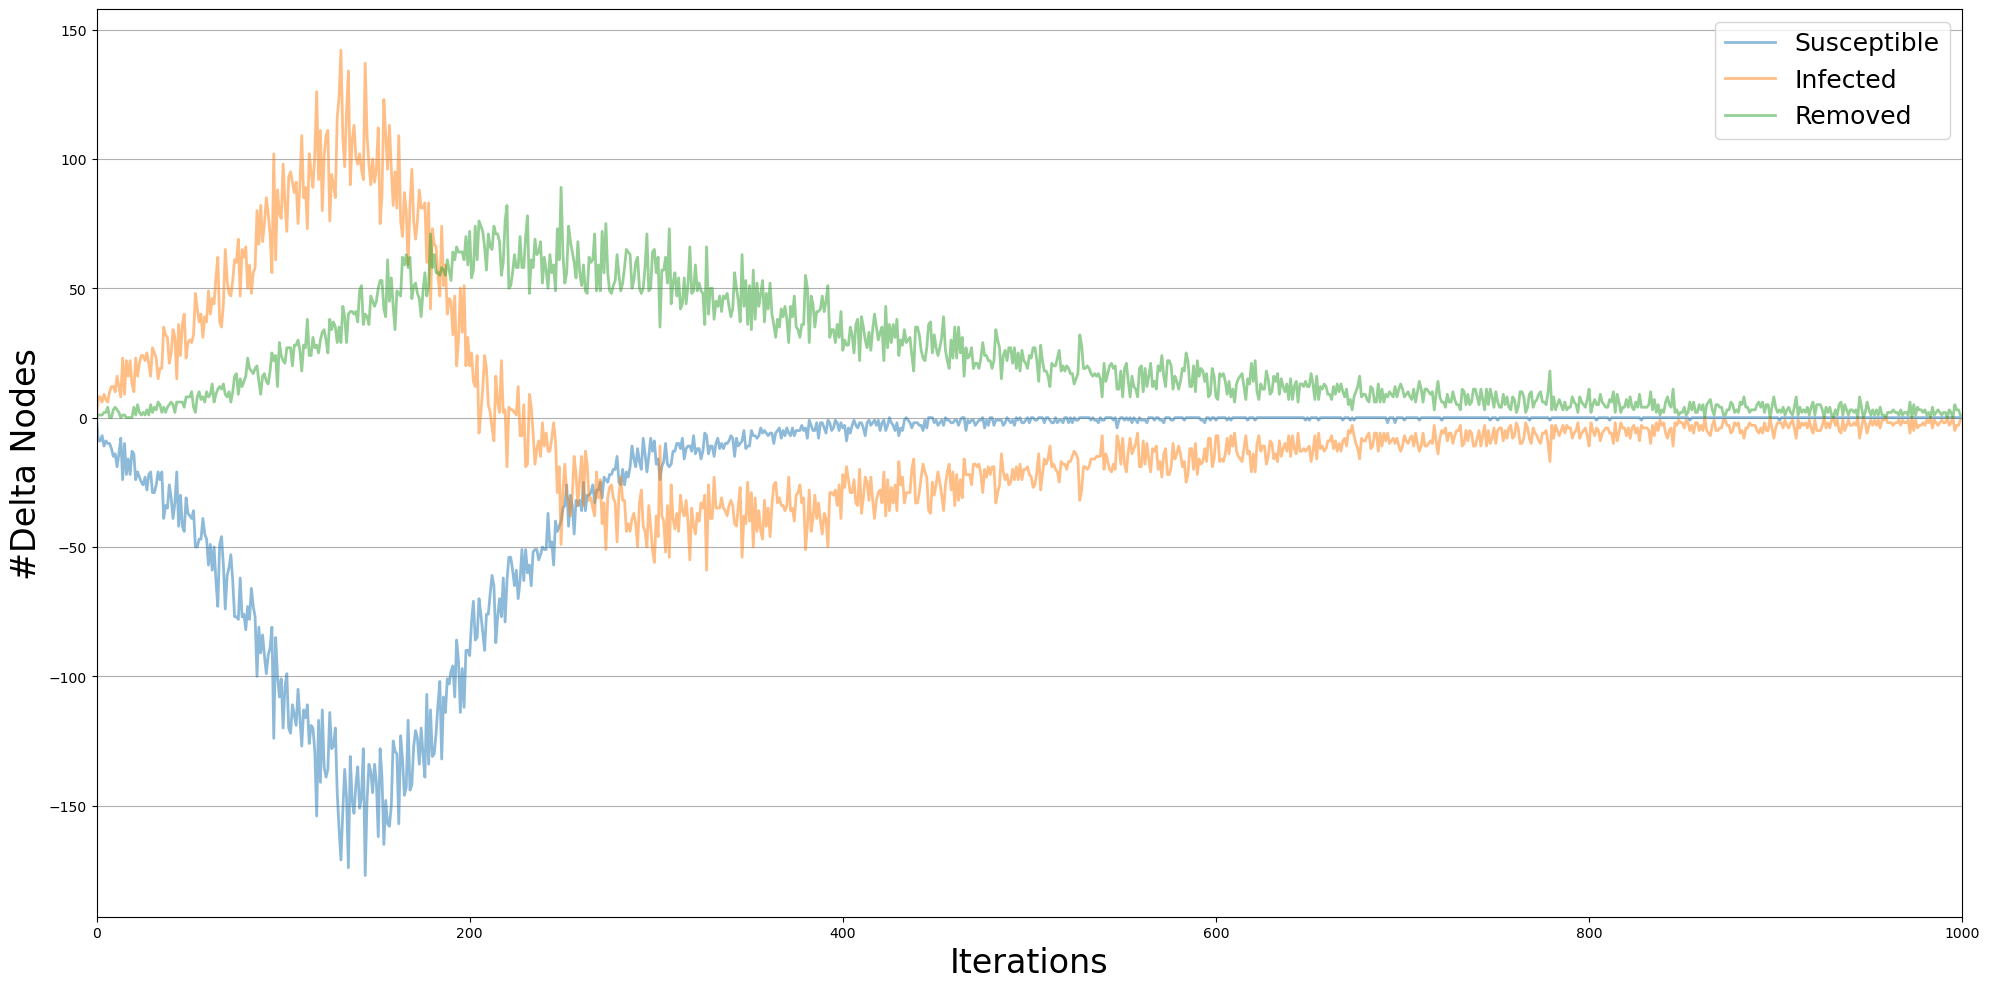

In [134]:
viz = DiffusionPrevalence(model_sir_e_er, trends_sir_e_er)
viz.plot()

### BA model

In [135]:
model_sir_e_ba = ep.SIRModel(ba)
model_sir_e_ba.set_initial_status(cfg)

In [136]:
iterations = model_sir_e_ba.iteration_bunch(1000, node_status=True)
trends_sir_e_ba = model_sir_e_ba.build_trends(iterations)

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:28<00:00, 11.29it/s]


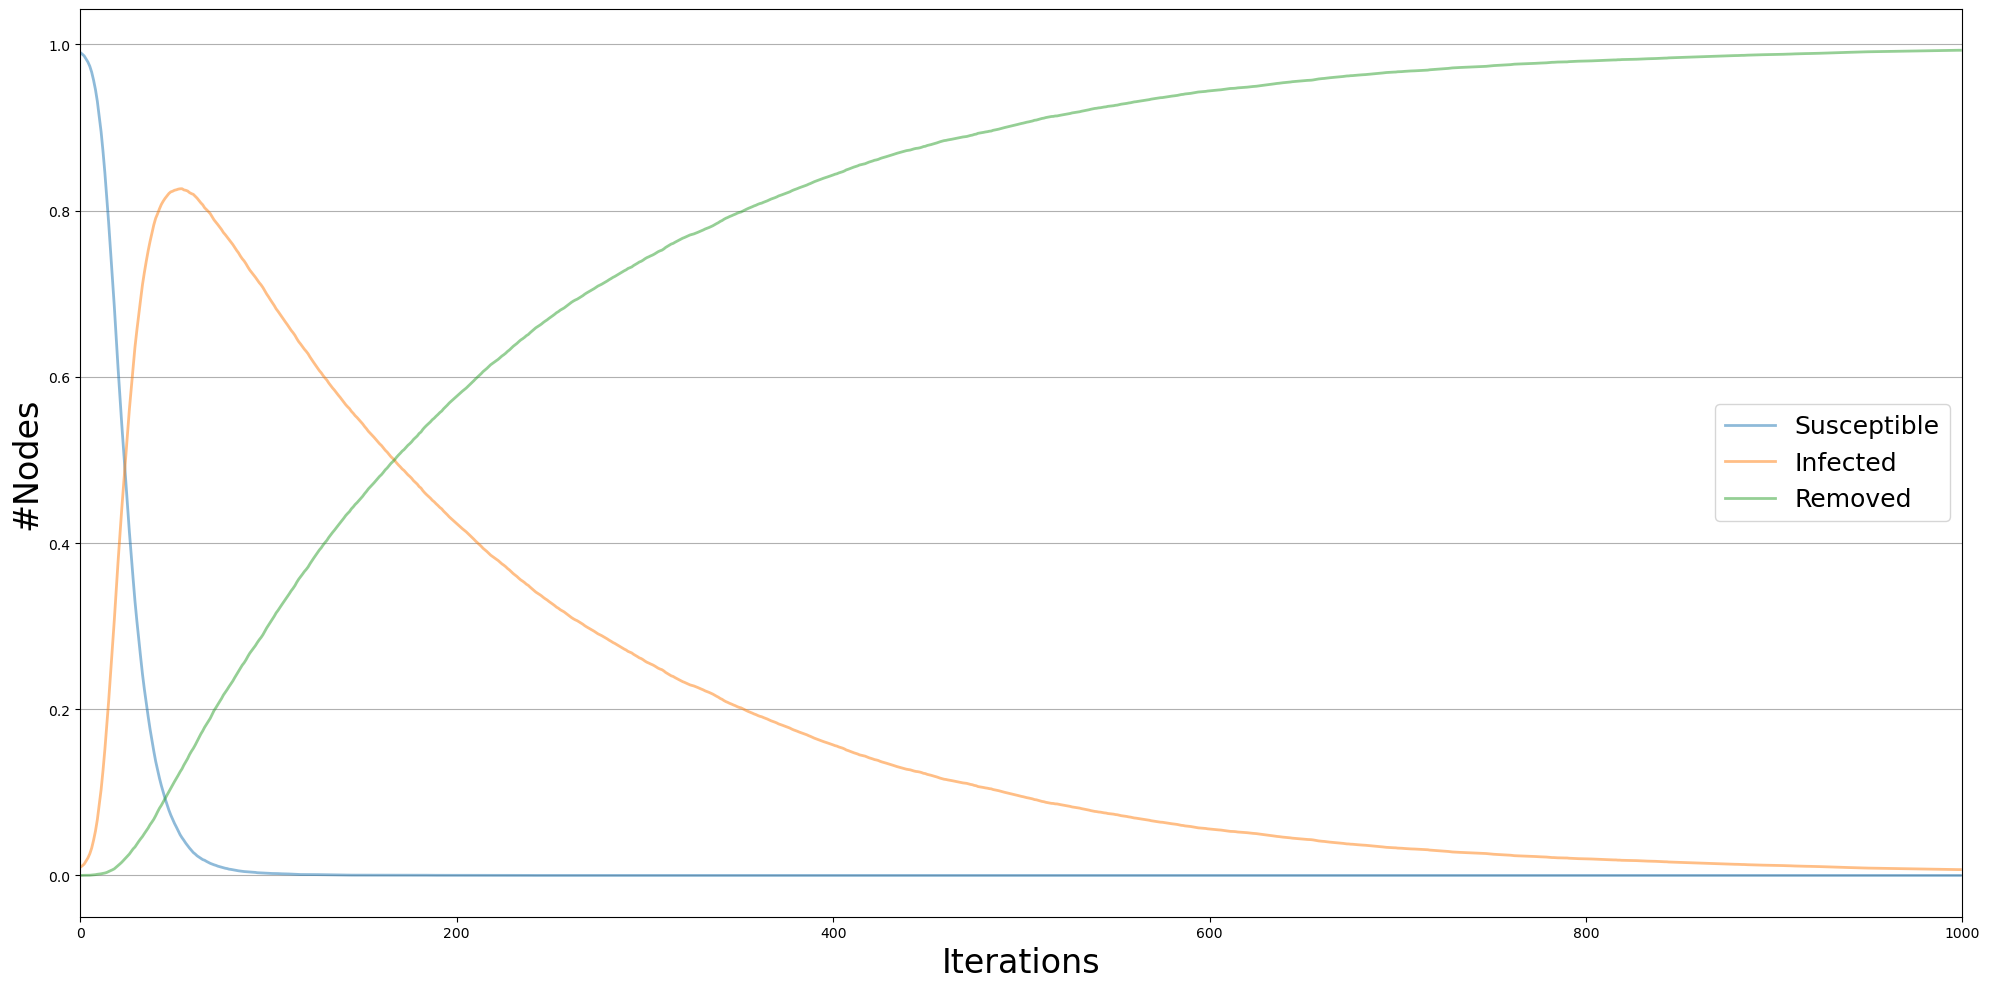

In [137]:
viz = DiffusionTrend(model_sir_e_ba, trends_sir_e_ba)
viz.plot()

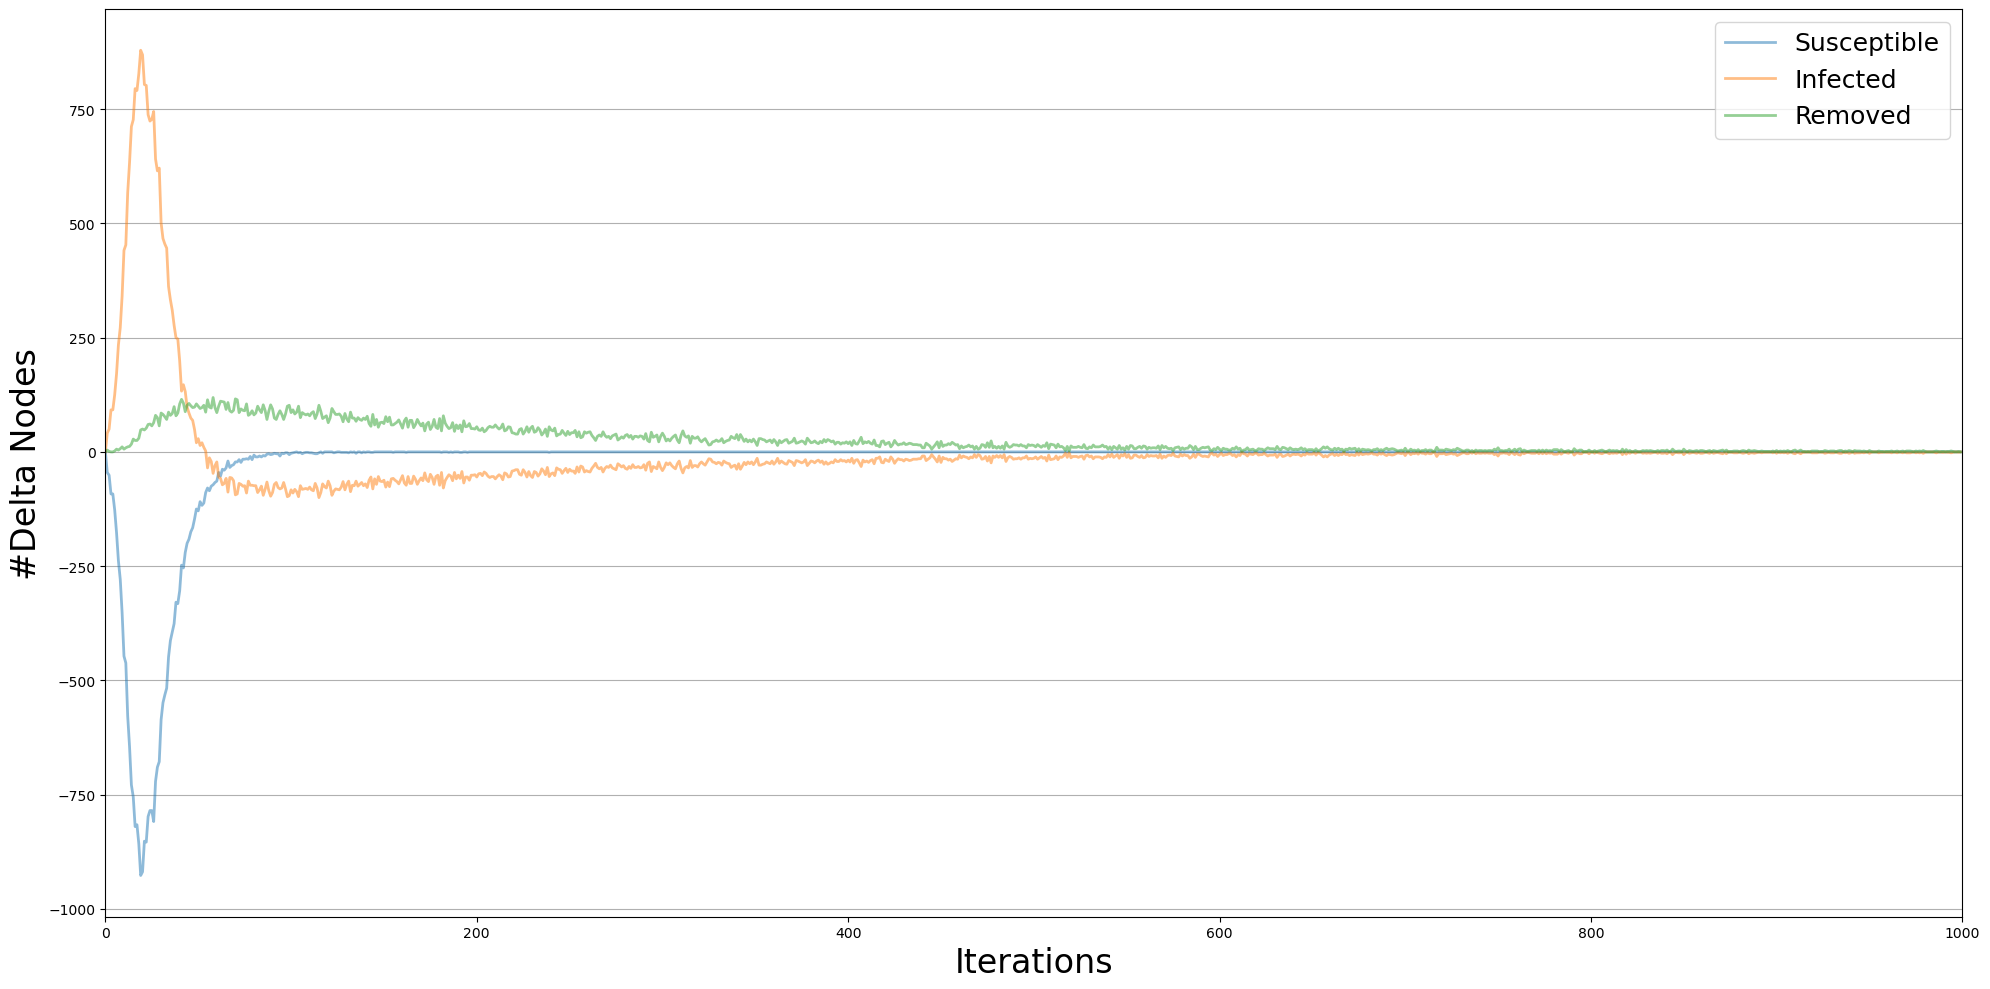

In [138]:
viz = DiffusionPrevalence(model_sir_e_ba, trends_sir_e_ba)
viz.plot()

### WS model

In [139]:
model_sir_e_ws = ep.SIRModel(ws)
model_sir_e_ws.set_initial_status(cfg)

In [140]:
iterations = model_sir_e_ws.iteration_bunch(1000, node_status=True)
trends_sir_e_ws = model_sir_e_ws.build_trends(iterations)

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:26<00:00, 11.50it/s]


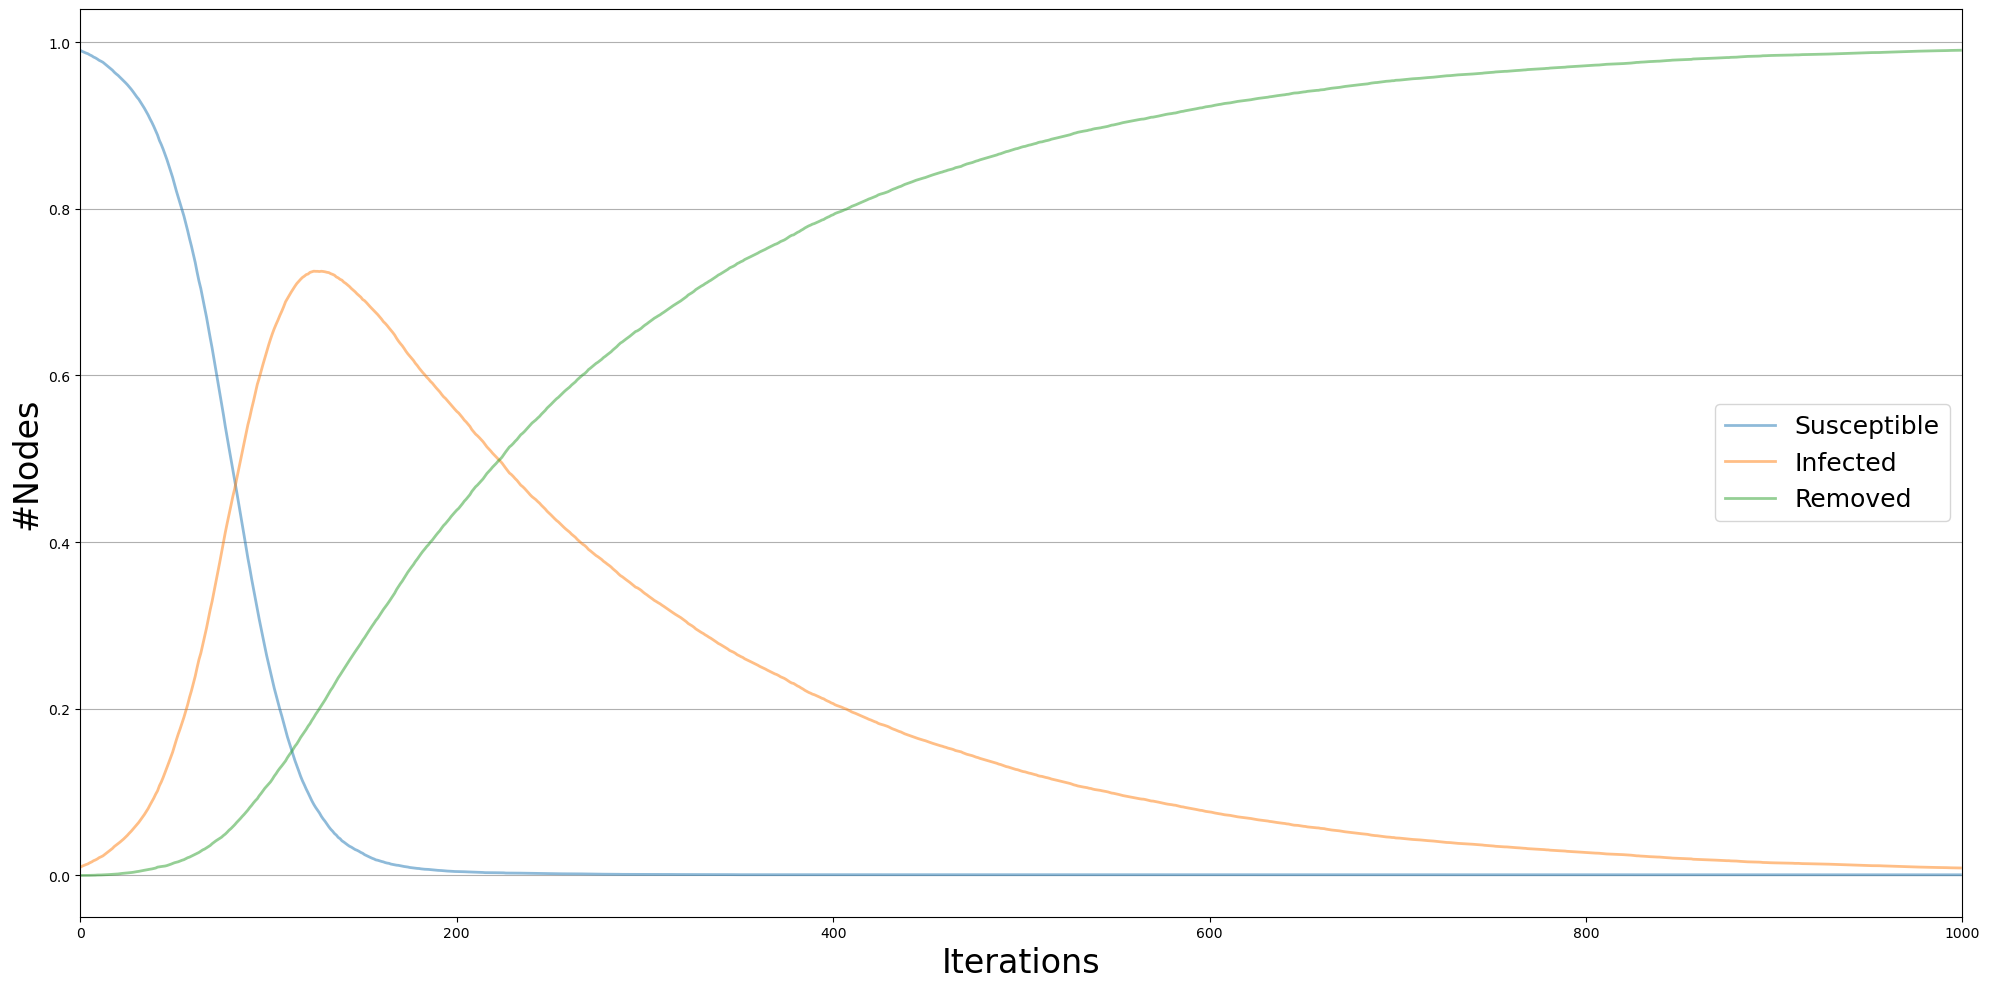

In [141]:
viz = DiffusionTrend(model_sir_e_ws, trends_sir_e_ws)
viz.plot()

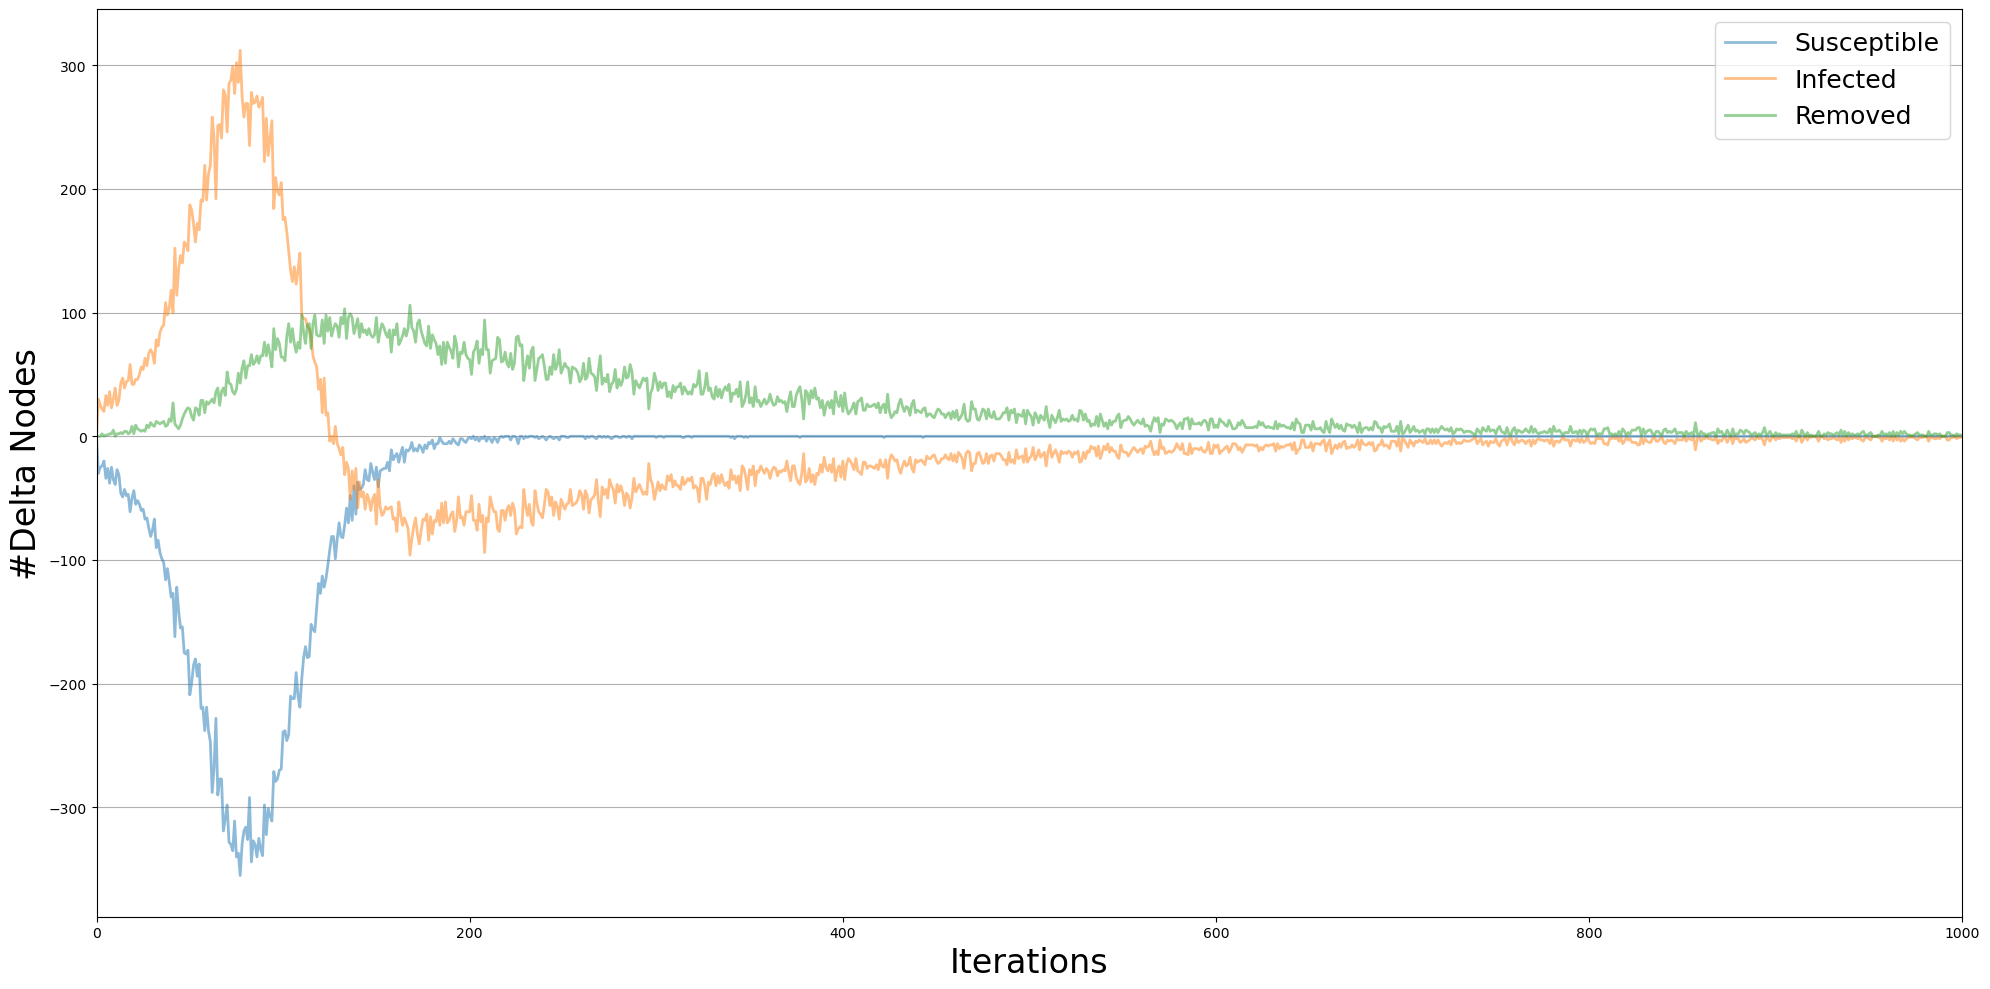

In [142]:
viz = DiffusionPrevalence(model_sir_e_ws, trends_sir_e_ws)
viz.plot()

To compare:

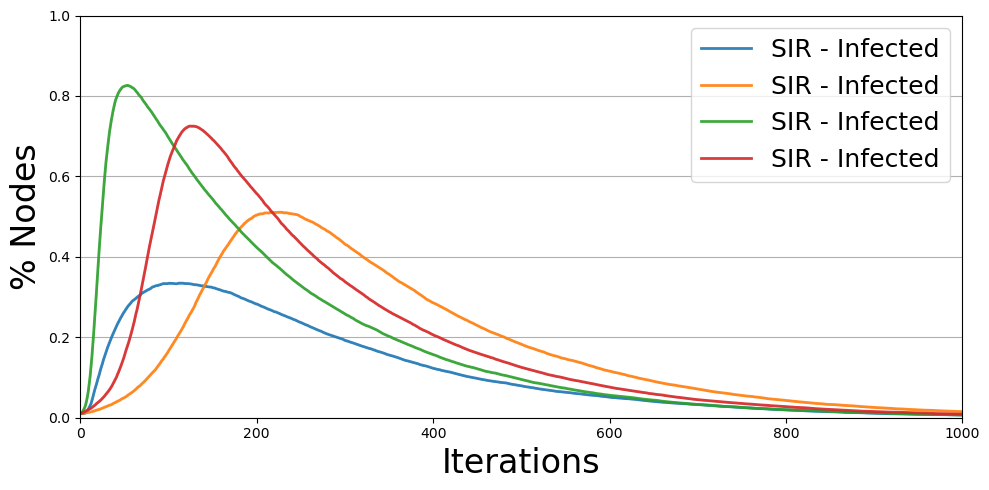

In [150]:
plt.rcParams.update({'figure.figsize':(10,5), 'figure.dpi':100})
viz = DiffusionTrendComparison([model_sir_e, model_sir_e_er, model_sir_e_ba, model_sir_e_ws], [trends_sir_e, trends_sir_e_er, trends_sir_e_ba, trends_sir_e_ws], statuses=['Infected'])
viz.plot()

Finally, a simulation where ƛ < 1 (i.e. below the epidemic threshold):
+ % of infected: 0.01
+ infection rate: 0.005
+ recovery rate: 0.01

In [151]:
model_sir_h = ep.SIRModel(g)

In [152]:
cfg = mc.Configuration()
cfg.add_model_parameter('beta', 0.005) # infection rate
cfg.add_model_parameter('gamma', 0.01) # recovery rate
cfg.add_model_parameter("percentage_infected", 0.01)
model_sir_h.set_initial_status(cfg)

In [153]:
iterations = model_sir_h.iteration_bunch(1000, node_status=True)
trends_sir_h = model_sir_h.build_trends(iterations)

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:14<00:00, 13.37it/s]


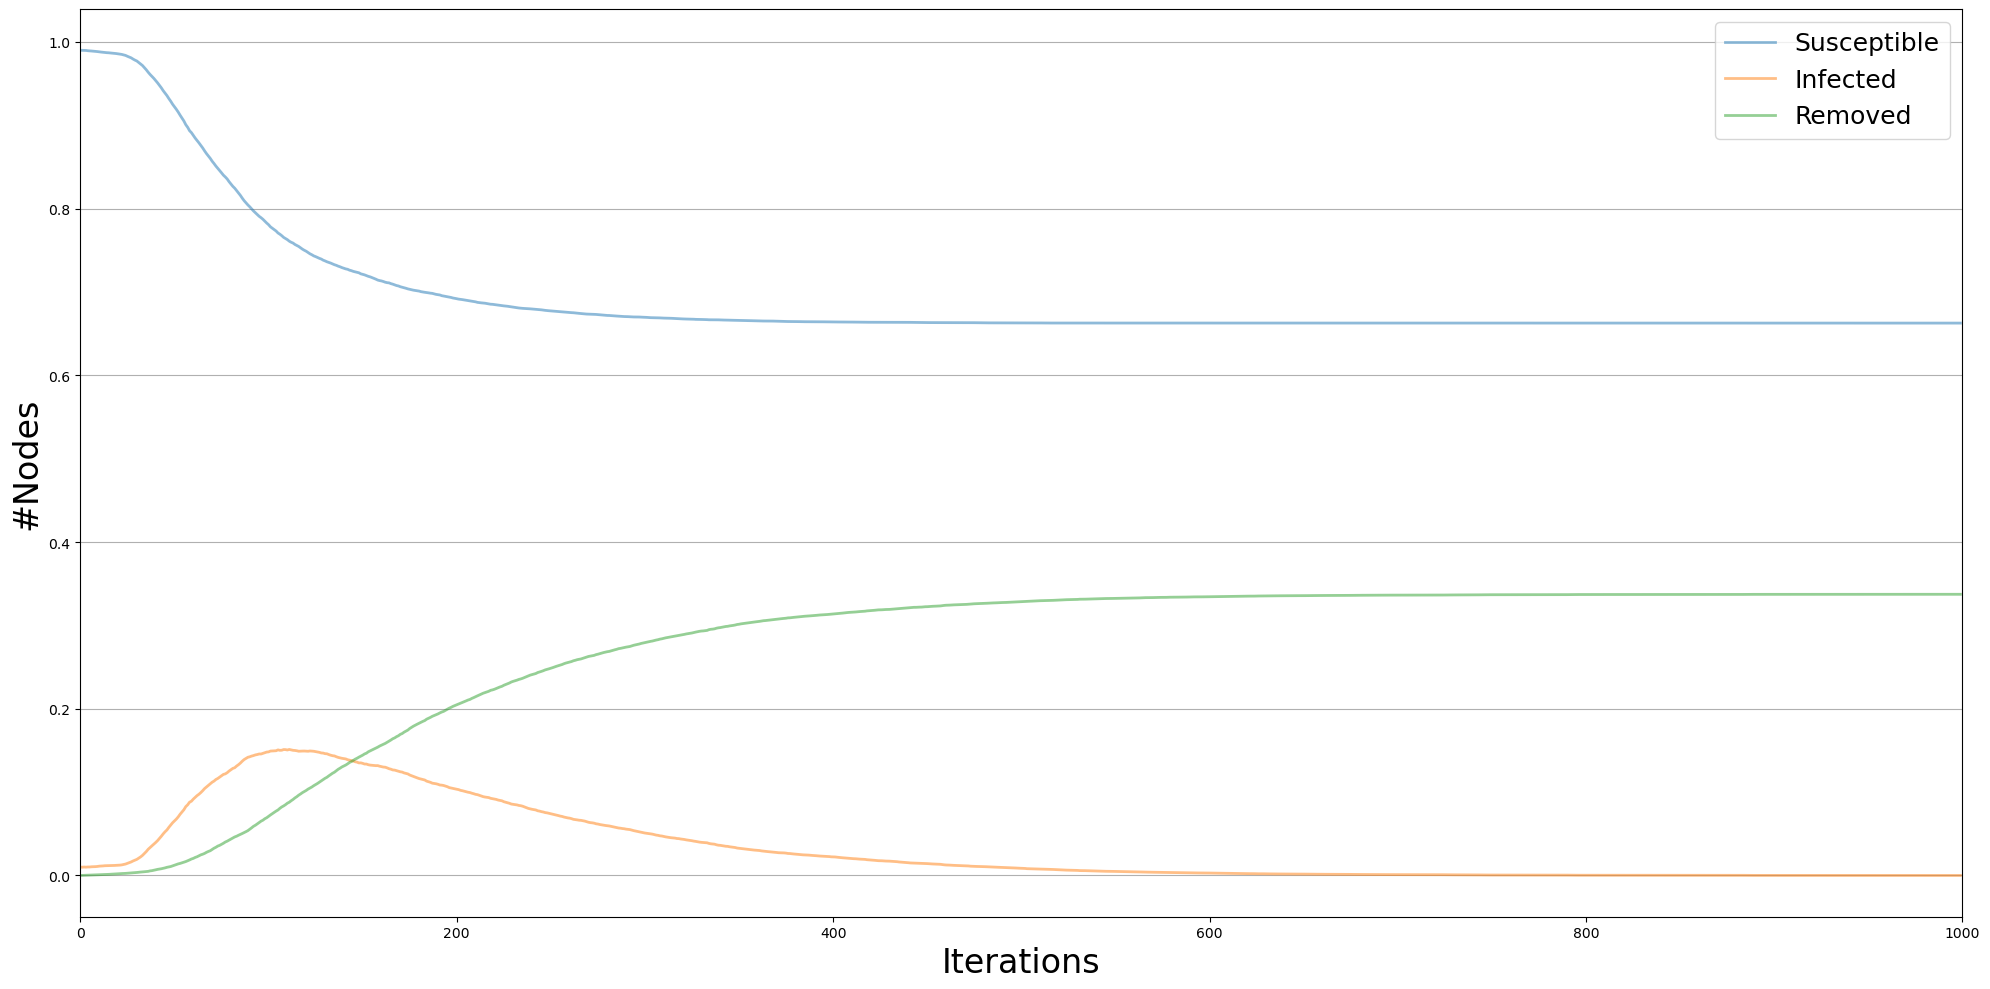

In [154]:
viz = DiffusionTrend(model_sir_h, trends_sir_h)
viz.plot()

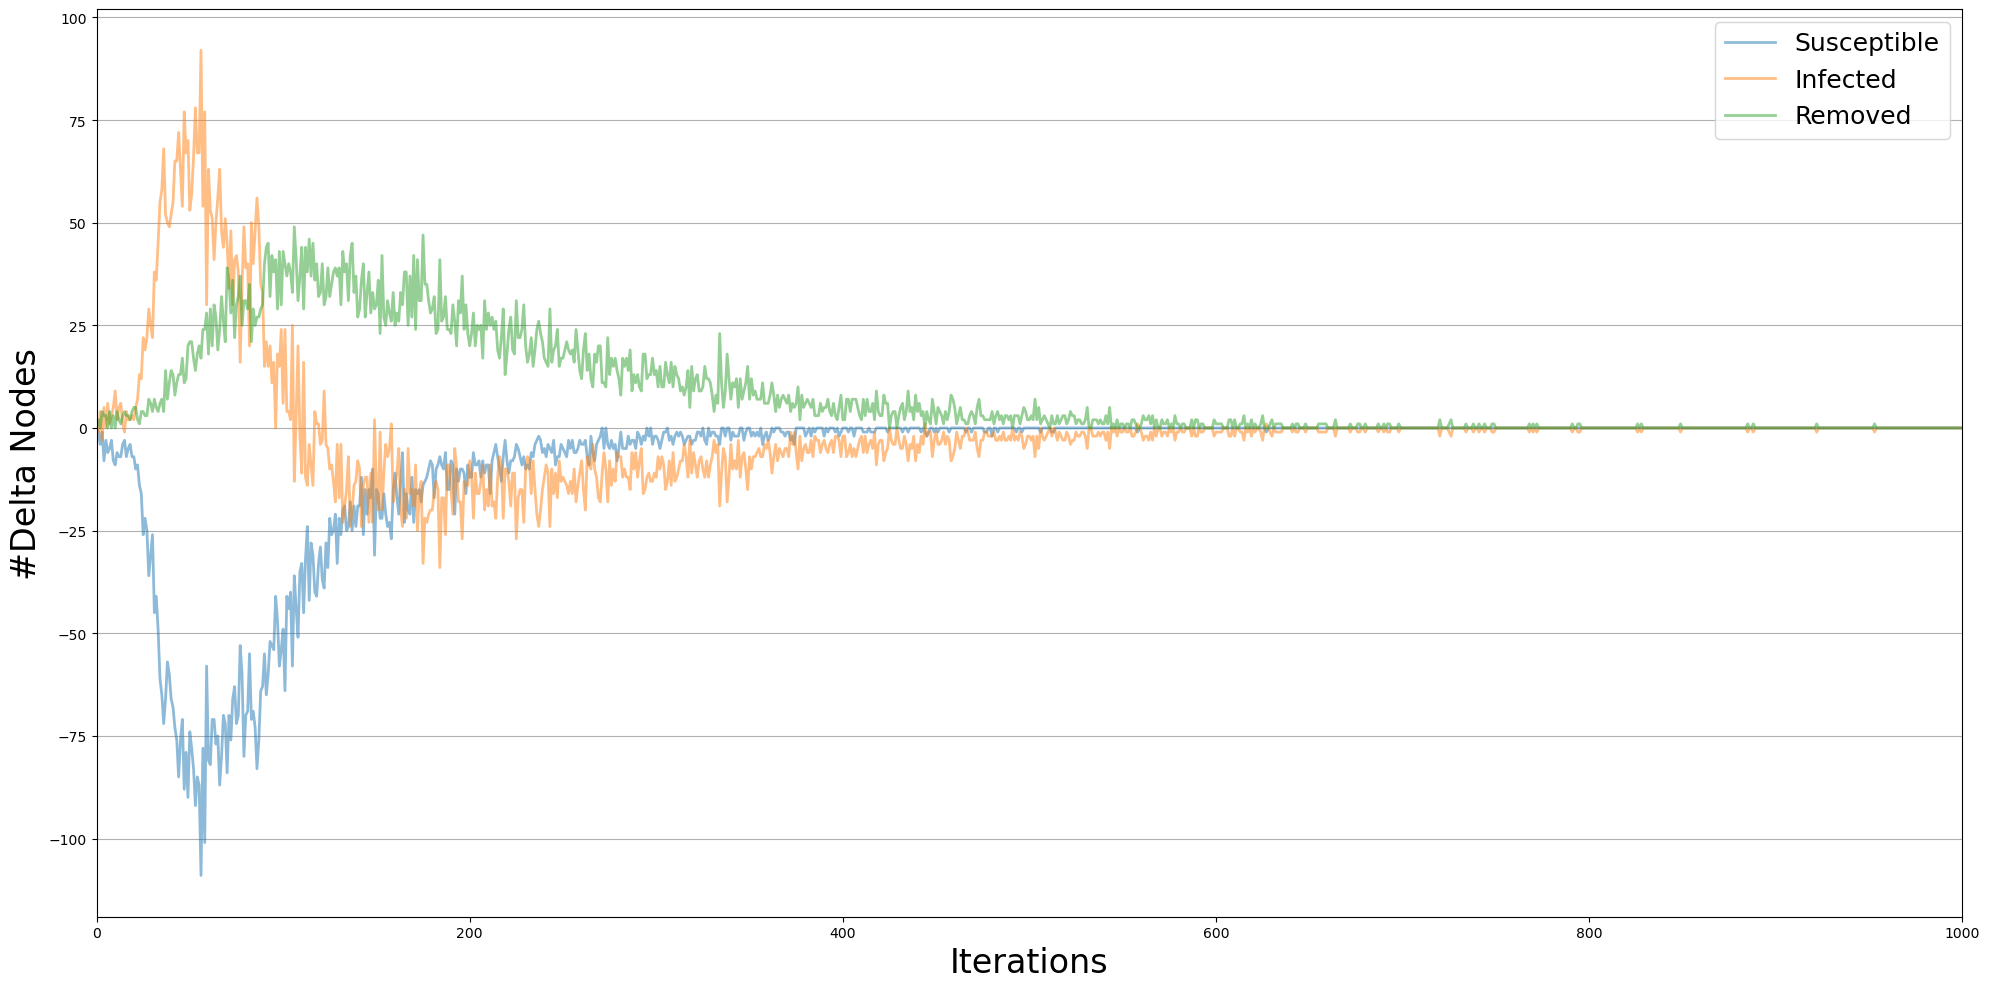

In [156]:
viz = DiffusionPrevalence(model_sir_h, trends_sir_h)
viz.plot()

### ER model

In [170]:
model_sir_h_er = ep.SIRModel(er)
model_sir_h_er.set_initial_status(cfg)

In [171]:
iterations = model_sir_h_er.iteration_bunch(1000, node_status=True)
trends_sir_h_er = model_sir_h_er.build_trends(iterations)

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:53<00:00, 18.62it/s]


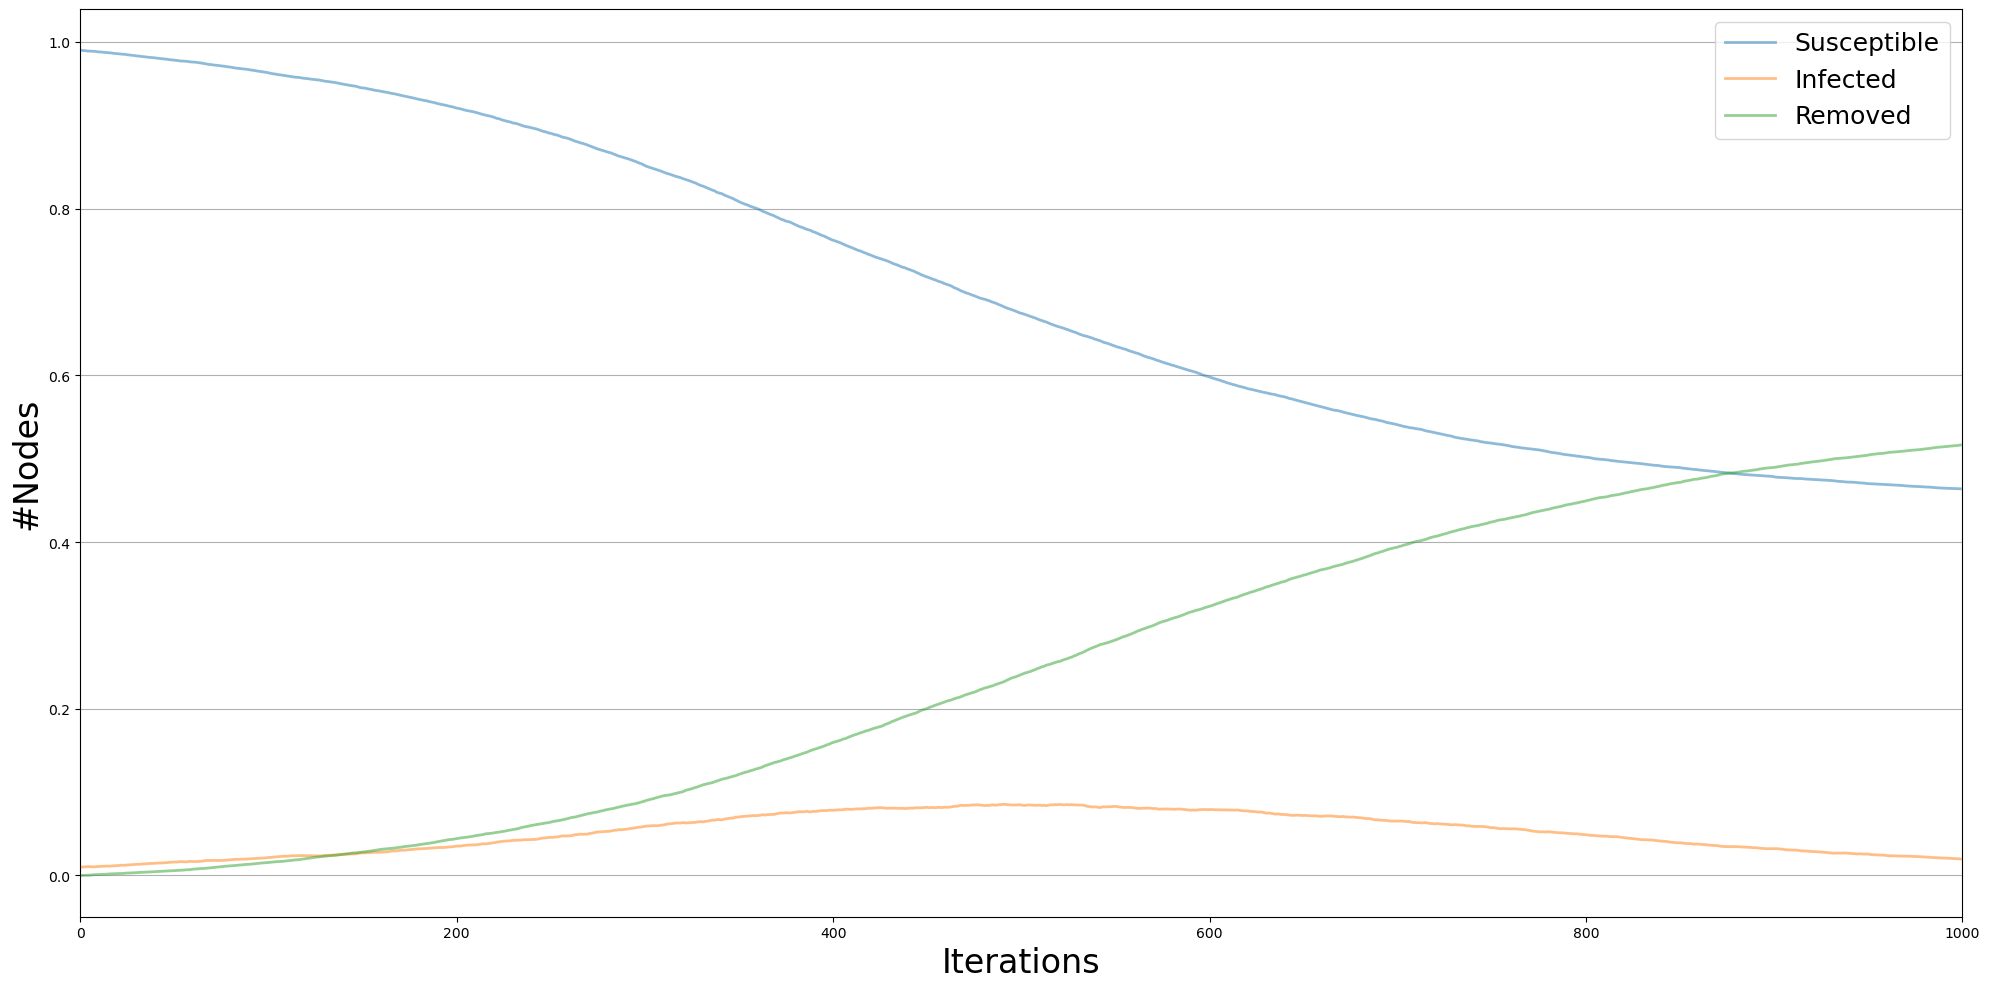

In [172]:
viz = DiffusionTrend(model_sir_h_er, trends_sir_h_er)
viz.plot()

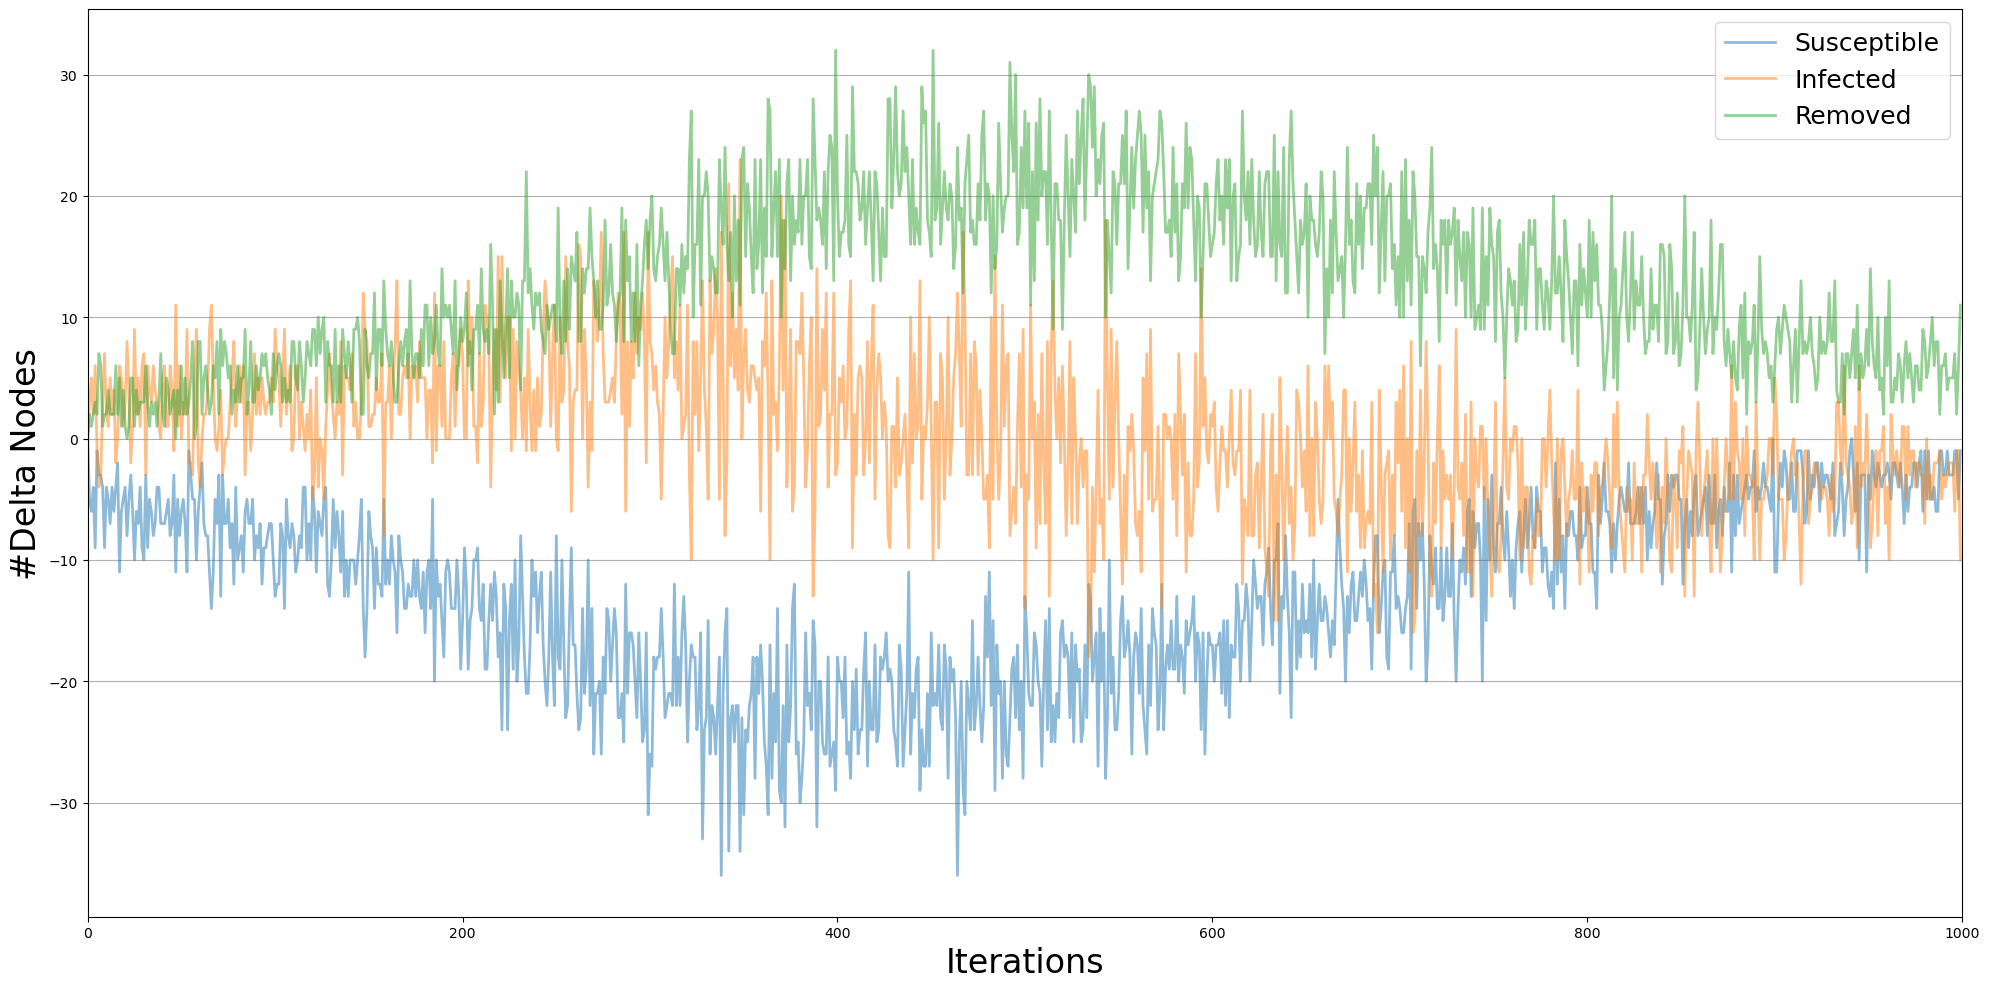

In [173]:
viz = DiffusionPrevalence(model_sir_h_er, trends_sir_h_er)
viz.plot()

### BA model

In [161]:
model_sir_h_ba = ep.SIRModel(ba)
model_sir_h_ba.set_initial_status(cfg)

In [162]:
iterations = model_sir_h_ba.iteration_bunch(1000, node_status=True)
trends_sir_h_ba = model_sir_h_ba.build_trends(iterations)

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:09<00:00, 14.41it/s]


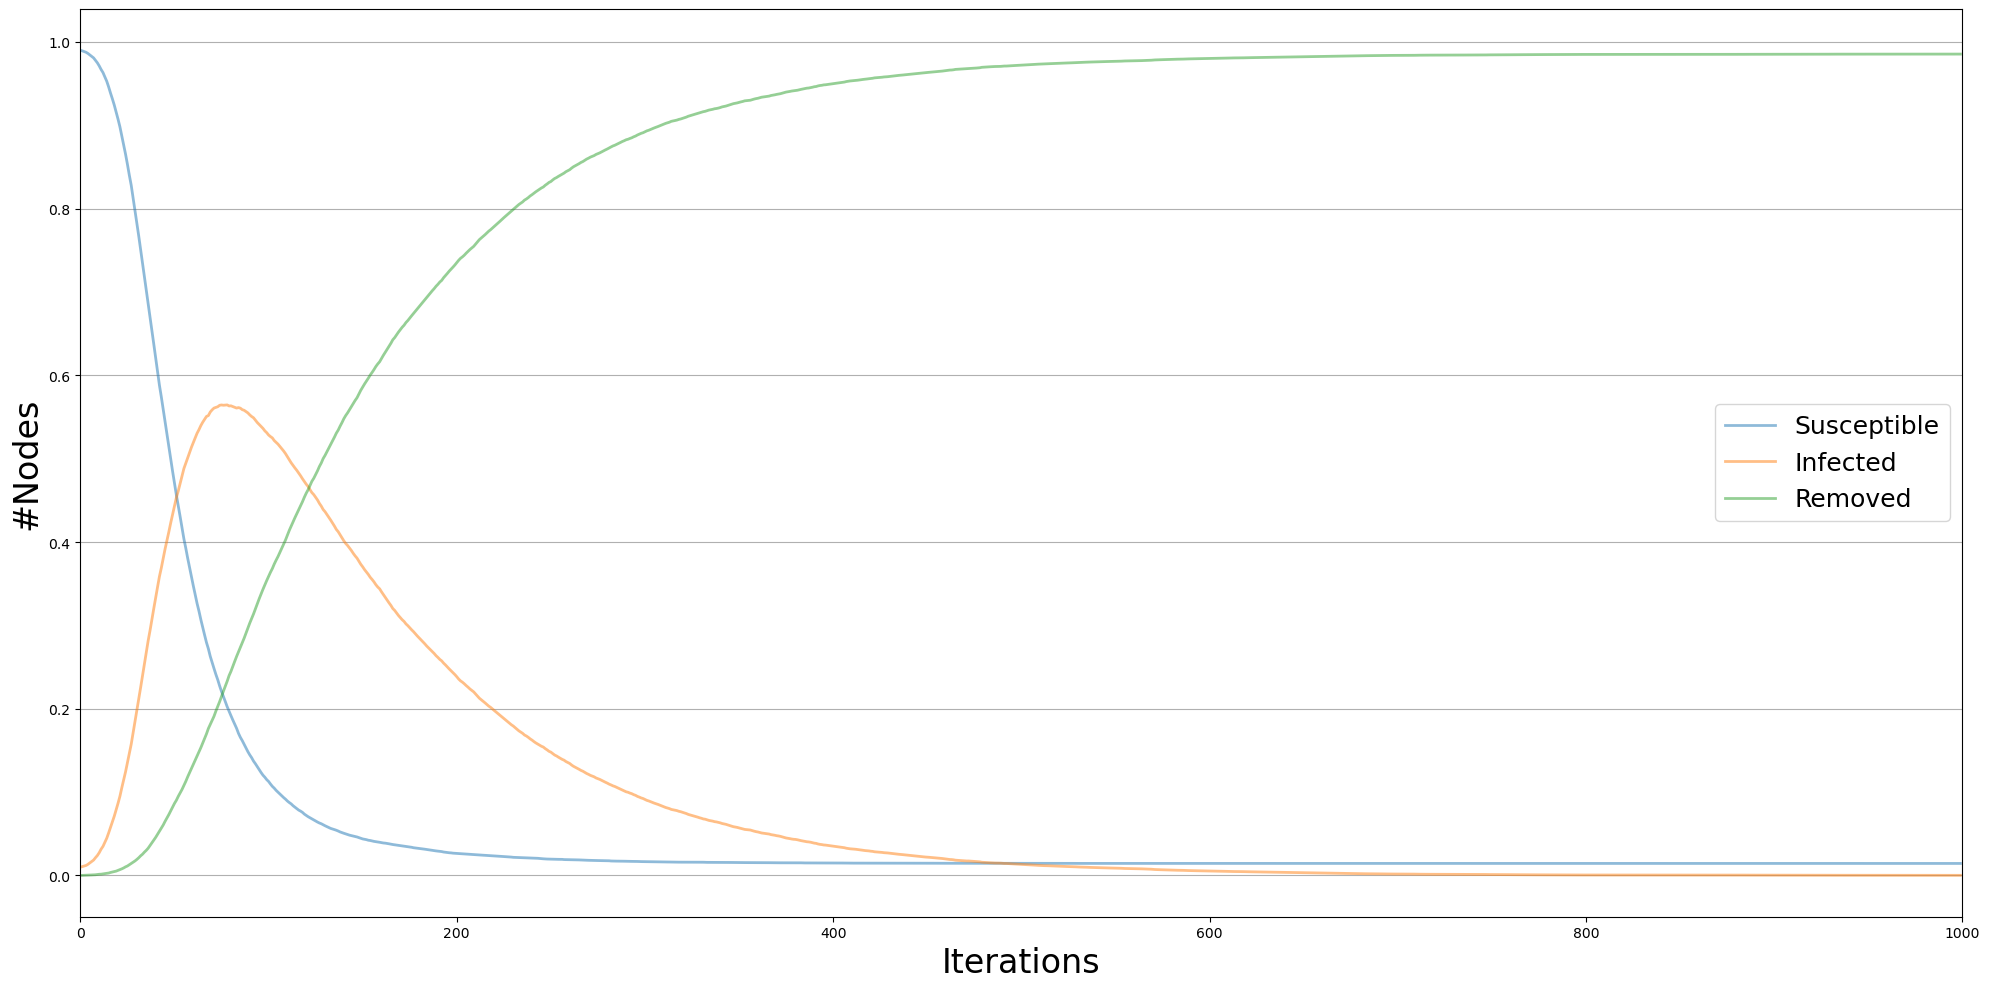

In [163]:
viz = DiffusionTrend(model_sir_h_ba, trends_sir_h_ba)
viz.plot()

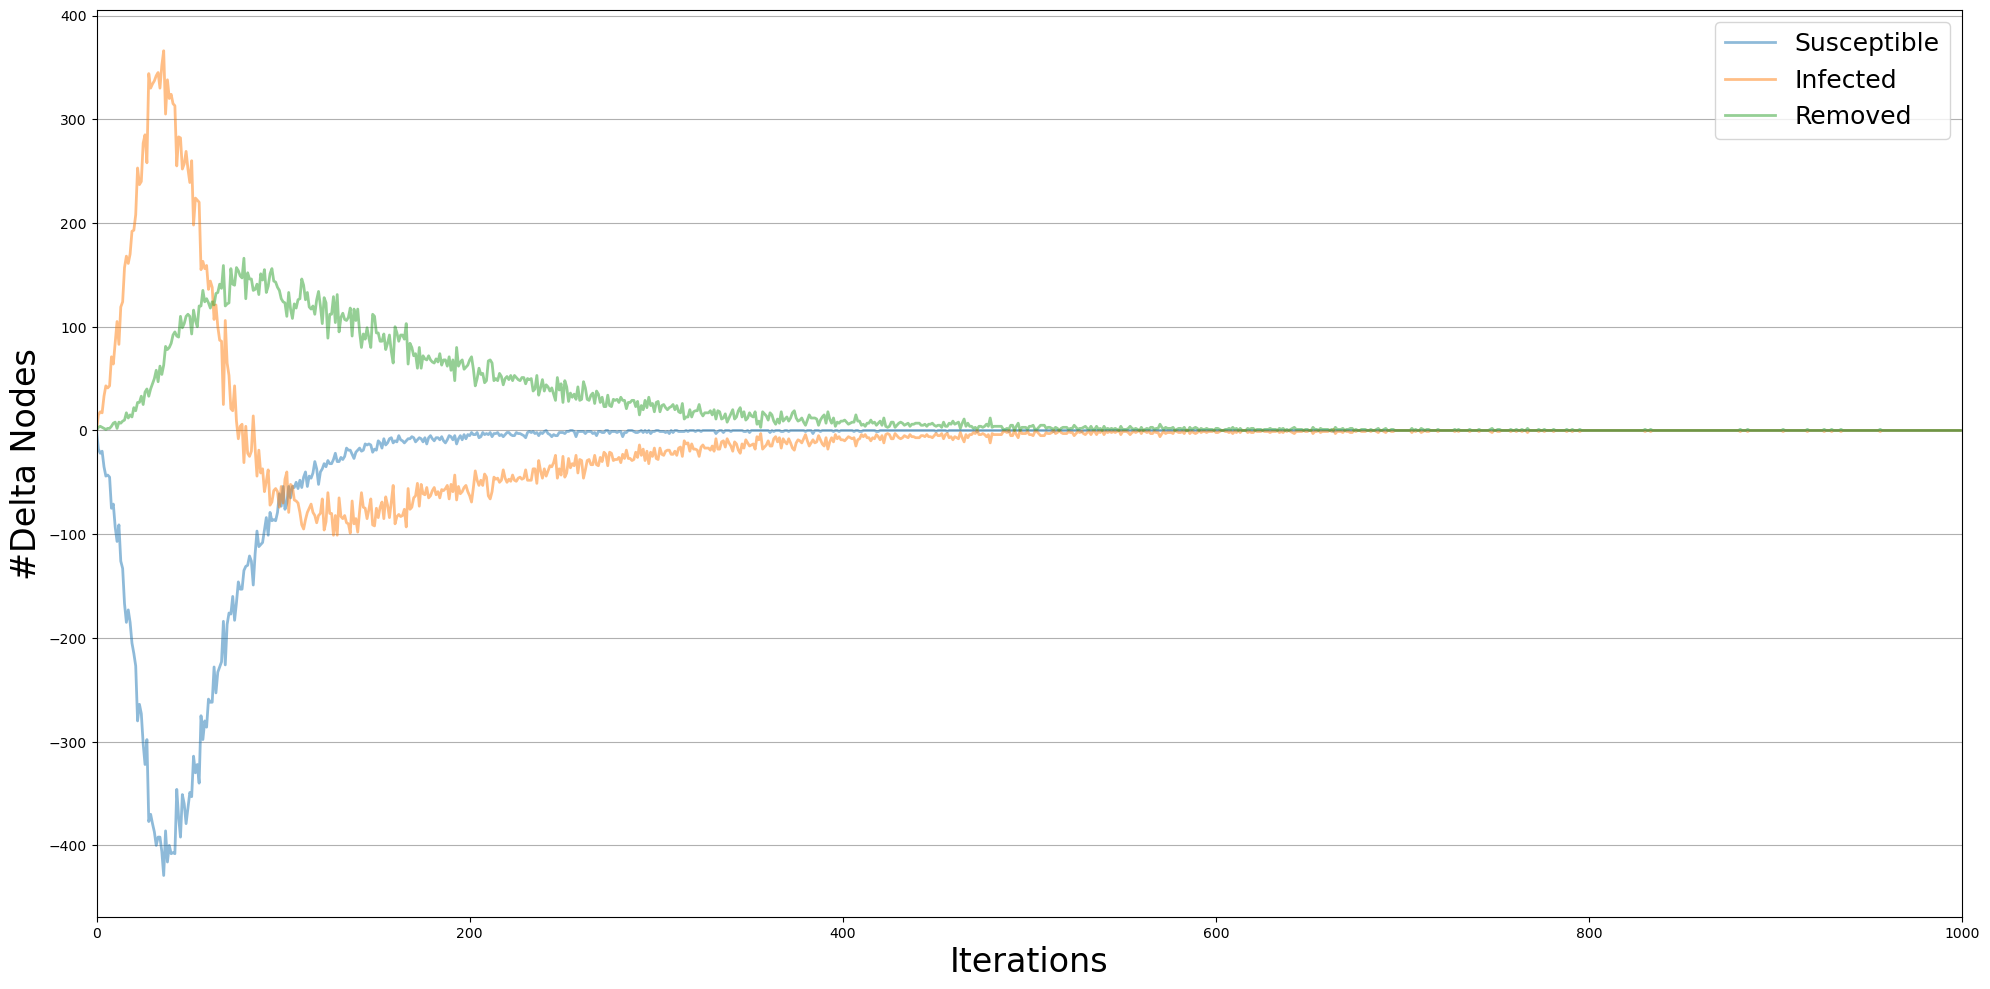

In [164]:
viz = DiffusionPrevalence(model_sir_h_ba, trends_sir_h_ba)
viz.plot()

### WS model

In [165]:
model_sir_h_ws = ep.SIRModel(ws)
model_sir_h_ws.set_initial_status(cfg)

In [166]:
iterations = model_sir_h_ws.iteration_bunch(1000, node_status=True)
trends_sir_h_ws = model_sir_h_ws.build_trends(iterations)

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:00<00:00, 16.61it/s]


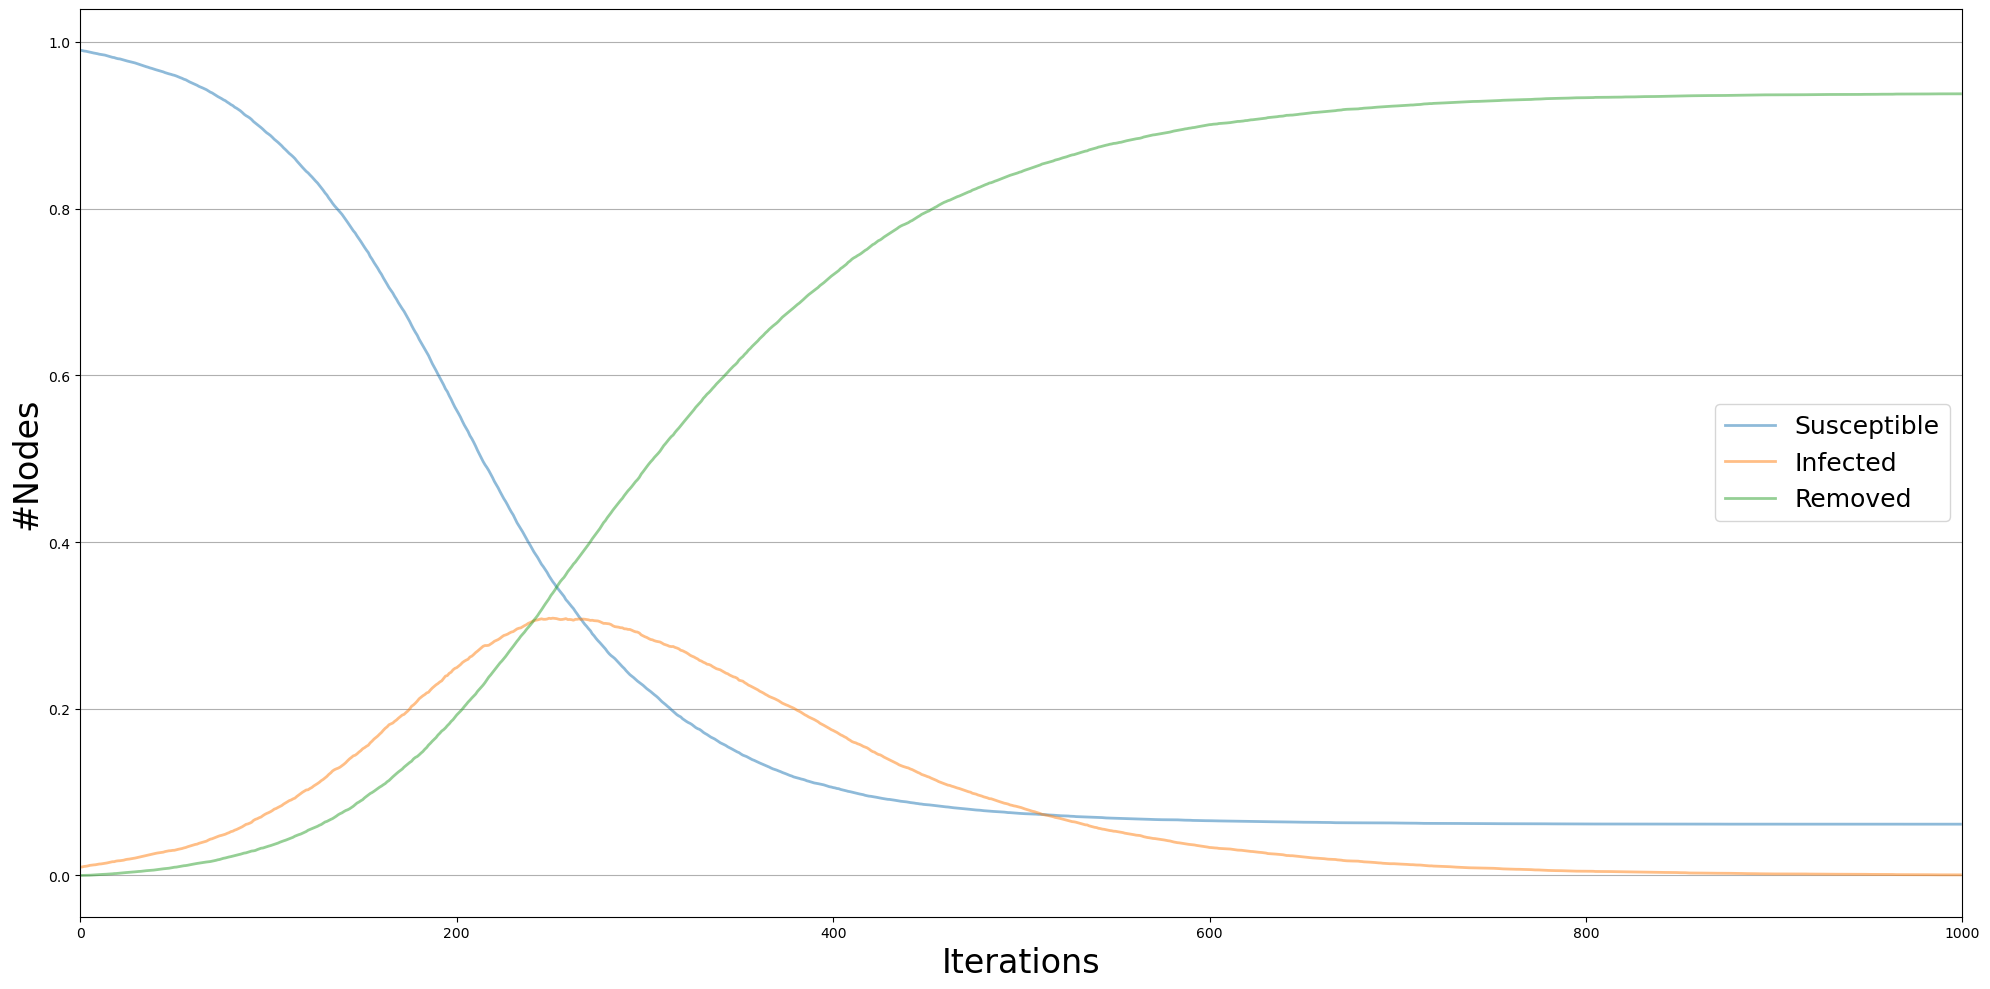

In [167]:
viz = DiffusionTrend(model_sir_h_ws, trends_sir_h_ws)
viz.plot()

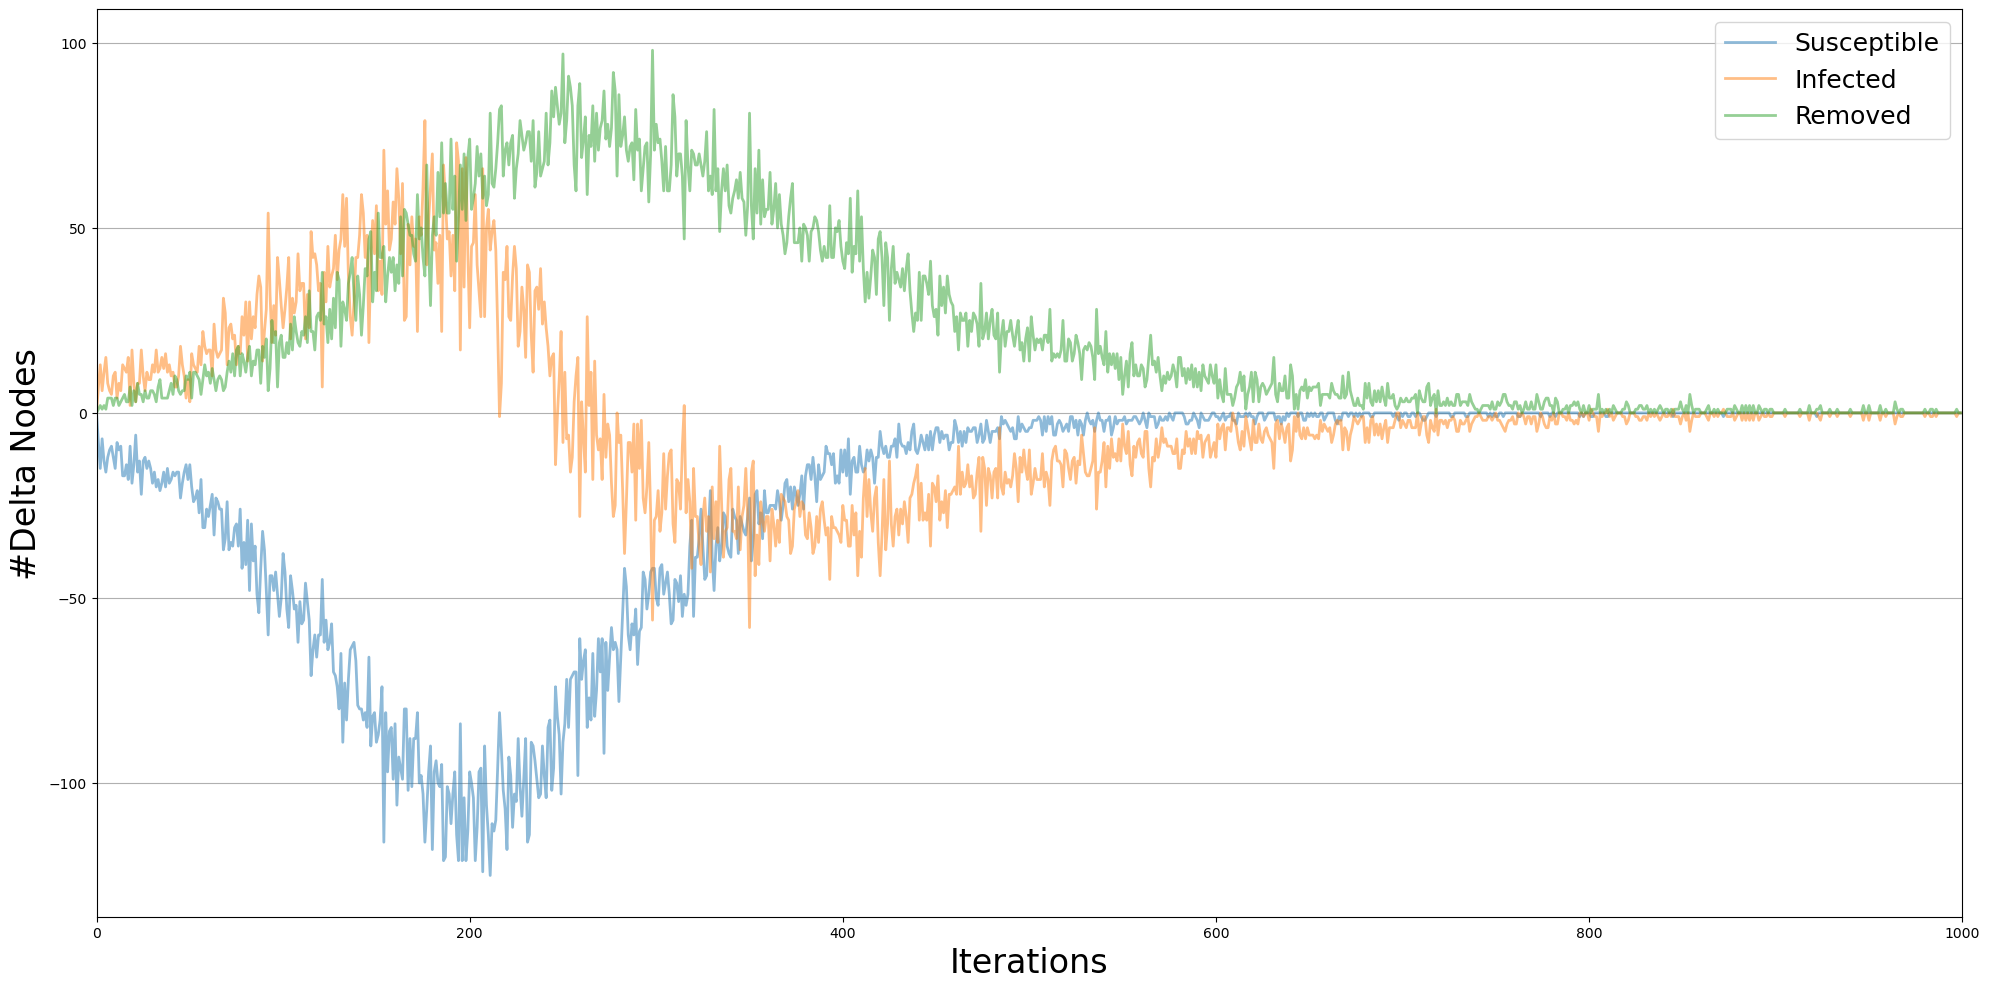

In [168]:
viz = DiffusionPrevalence(model_sir_h_ws, trends_sir_h_ws)
viz.plot()

To compare:

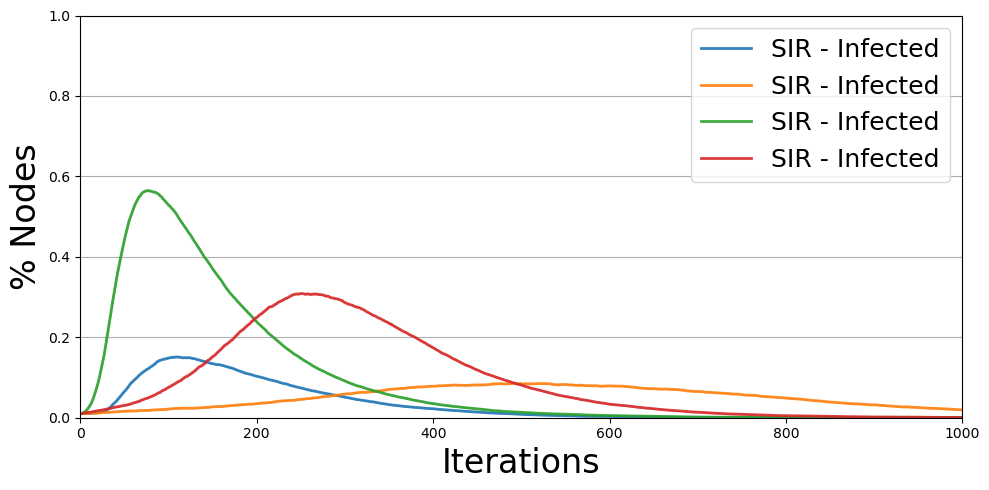

In [174]:
plt.rcParams.update({'figure.figsize':(10,5), 'figure.dpi':100})
viz = DiffusionTrendComparison([model_sir_h, model_sir_h_er, model_sir_h_ba, model_sir_h_ws], [trends_sir_h, trends_sir_h_er, trends_sir_h_ba, trends_sir_h_ws], statuses=['Infected'])
viz.plot()

From the comparison with the models, it appears that the spread of the "contagion" in the real network is limited in terms of infected nodes compared to all the other models in most cases (the ER model limits the contagion in some cases better than our model, according to the simulations), although it's not always the one with the slowest contagion.